# 📜 Problem Statement of Telecom churn case study

In the **telecom industry**, customers have the flexibility to choose between multiple service providers and can actively switch from one operator to another. Due to intense competition, the telecom sector faces an average annual churn rate of **15-25%**. 

Considering that acquiring a new customer costs **5-10 times more** than retaining an existing one, customer retention has become a top priority for telecom companies.

For many leading operators, retaining **highly profitable customers** is crucial to maintaining their market position. 

---

## 🎯 Objectives
The goal of this project is to build **machine learning models** to predict customer churn. The predictive model aims to:

1. **Predict Churn Risk:** Identify whether a **high-value customer** is likely to churn in the near future. This enables the company to take proactive steps such as offering special plans, discounts, or incentives.

2. **Identify Key Indicators:** Pinpoint significant variables that act as strong predictors of churn. These insights can highlight potential reasons behind customer dissatisfaction.

3. **Recommend Strategies:** Propose effective strategies to reduce churn based on data insights and trends.

---

## 📈 Customer Behaviour During Churn

Customers generally don’t decide to switch operators instantly; their behaviour evolves across three distinct phases:

### 🔹 **1. The 'Good' Phase**
- The customer is content with the service and shows normal usage behaviour.

### 🔹 **2. The 'Action' Phase**
- The customer begins to experience dissatisfaction. This could be triggered by:
  - A **compelling competitor offer**
  - **Unjust charges**
  - **Poor service quality**

> 🔎 Identifying customers in this phase is crucial, as timely intervention (e.g., matching a competitor’s offer or improving service quality) can prevent churn.

### 🔹 **3. The 'Churn' Phase**
- 


# 🛠️ Streamlined Data Preprocessing with Column Transformer and Pipeline

***This notebook demonstrates a robust and production-ready approach to data preprocessing using the `ColumnTransformer` and `Pipeline` classes from scikit-learn.***

Unlike traditional methods that modify the test data directly, this approach emphasizes defining a structured sequence of **preprocessing** and **feature engineering** steps within a pipeline. 

### 🚀 Why Use This Approach?
This modular and encapsulated strategy offers several key benefits:

✅ Ensures a **consistent transformation process** for both training and test data.  
✅ Enhances **code readability** and **maintainability**.  
✅ Minimizes the risk of **data leakage** by standardizing transformation logic.  
✅ Facilitates easy integration into **production environments**.  

By leveraging the power of `ColumnTransformer` and `Pipeline`, data preprocessing becomes more **efficient**, **organized**, and **reliable** — essential traits for robust machine learning models.  

---


## 🚀 Advantages of the Pipeline Approach

### ✅ Key Benefits
1. **Data Integrity and Reproducibility:** Ensures consistent transformations are applied to both training and test data.
2. **Modularity and Flexibility:** Simplifies code maintenance by separating different transformation steps.
3. **Production Readiness:** Enhances scalability, making the model deployment-ready.

---

## 🔧 Application in This Notebook

In this notebook, the preprocessing and feature engineering steps are implemented using distinct functions or custom transformer classes. These steps are then organized into a `Pipeline` using the `ColumnTransformer`.

### 🔹 Key Pipeline Features
- **Custom Feature Engineering for Date Columns:** New features are created by calculating date differences, followed by imputation when required.
- **Imputation Handling:** `SimpleImputer` efficiently manages missing values for both custom and standard features.
- **Column Removal:** Unnecessary columns are dropped for improved model performance.
- **Passthrough Mechanism:** Columns that don't require changes are forwarded directly without modification.

The resulting pipeline ensures that all data undergoes uniform transformations before model training, enhancing reliability and consistency.

---

## 🔍 Why This Approach?
Unlike modifying test data directly, this method separates preprocessing from model training. Capturing these steps in a reusable pipeline ensures:
- Cleaner, more maintainable code.
- Minimized risk of errors.
- Consistent transformation application across different datasets.

This modular, flexible approach is ideal for building scalable machine learning models. It ensures smooth deployment to cloud environments like **Azure** or **AWS**, allowing seamless transitions from experimentation to production for stable and predictable model performance.


# Importing required libraries

In [12]:
# 📚 Data Structures
import pandas as pd
import numpy as np
import re
import os

# 🔍 Scikit-learn Libraries
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV  # HalvingGridSearchCV (if needed)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer, make_column_selector

# 🚀 XGBoost Library
from xgboost import XGBClassifier

# ⚖️ Imbalanced Data Handling
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE

# 📊 Plotting Libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# ⚠️ Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


# Load Data

In [15]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")
data_dict = data_dict.to_dict(orient='index')

print(data.shape)
print(unseen.shape)
print(sample.shape)

(69999, 172)
(30000, 171)
(30000, 2)


In [17]:
data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [19]:
data.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 163 columns]

## 🔀 Train-Test Split

Splitting the data into training and testing sets is crucial to ensure the model generalizes well on unseen data. 

In [22]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X.shape, y.shape

((69999, 171), (69999,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((55999, 171), (55999,), (14000, 171), (14000,))

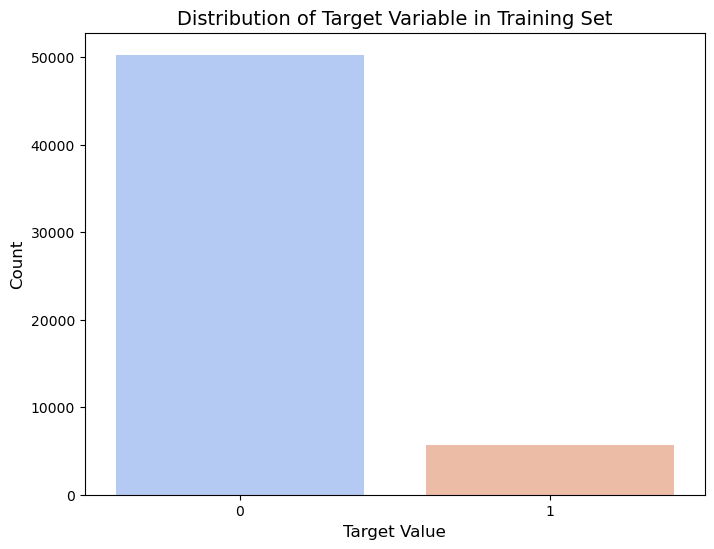

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each target value
target_counts = y_train.value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, 
            y=target_counts.values, 
            palette='coolwarm')

# Adding labels and title
plt.xlabel("Target Value", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Target Variable in Training Set", fontsize=14)

# Display the plot
plt.show()


***The dataset exhibits a significant class imbalance, which we will address in the later stages.***

# Data Understanding, Preparation, and Pre-Processing

### 🔎 Key Data Processing Steps  
- **Data Understanding & Analysis:**  
  Identifying meaningful attributes, assessing variable importance, and estimating their impact.  
- **Data Preparation:**  
  Performing essential steps like data cleaning, handling missing values, removing outliers, and standardizing column formats (e.g., date columns) for consistency.  


### 🛠️ Data Preparation Approach  
This section outlines the process of preparing data for modeling without altering the original dataset. Instead, a structured pipeline is designed to ensure consistent data processing.

**Steps Involved:**  
- **Data Understanding & Column Categorization:**  
  - The `analyze_dataframe` function is created to examine the dataset, revealing column characteristics such as data types, missing values, and unique entries.  
  - Based on this analysis, columns are grouped into distinct categories:  
    - **`col_drop`** - Columns to be removed.  
    - **`col_dates`** - Date-related columns.  
    - **`col_custom_impute`** - Columns requiring customized imputation strategies.  
    - **`col_gen_impute`** - Columns suitable for general imputation techniques.  
    - **`col_unchanged`** - Columns that remain untouched.  

This structured categorization allows targeted transformations to be applied efficiently, ensuring a cleaner and more organized data pipeline.  


## Defining  analyze_dataframe function

In [39]:
def analyze_dataframe(df):
    """Analyzes a Pandas DataFrame and returns a summary DataFrame.

    This function iterates through each column of the input DataFrame and
    calculates the following statistics:

    - Number of unique values
    - First 10 unique values
    - Percentage of NaN values
    - Expanded column name (using a data dictionary)

    The function then prints the number of columns with NaN values and
    returns a summary DataFrame containing the calculated statistics.

    Args:
        df (pd.DataFrame): The input Pandas DataFrame.

    Returns:
        pd.DataFrame: A summary DataFrame with columns:
            - 'Column Name': The original column name.
            - 'Number of Unique Values': The number of unique values in the column.
            - 'First 10 Unique Values': A string containing the first 10 unique values.
            - '% of NaN': The percentage of NaN values in the column.
            - 'Expanded Column Name': The expanded column name using the data dictionary.
    """

    def expand_variable_name(col_name):
        """Expands a column name using a data dictionary."""
        result_dict = {}
        for key, value in data_dict.items():
            result_dict[value['Acronyms'].strip().lower()] = value['Description']

        parts = col_name.split("_")
        expanded_name = ""
        for i, part in enumerate(parts[:-1]):
            if part in result_dict:
                expanded_name += result_dict[part]
                if i < len(parts) - 2:  # Add underscore if not the last part
                    expanded_name += "_"
            else:
                expanded_name += part + "_"
        expanded_name += parts[-1] # Append month
        return expanded_name

    summary = []
    for col in df.columns:
        unique_vals = df[col].unique()
        num_unique = len(unique_vals)
        first_10_unique = ", ".join(map(str, unique_vals[:10]))  # Handle non-string types
        nan_percentage = df[col].isna().sum() / len(df) * 100
        summary.append([col, num_unique, first_10_unique, nan_percentage])

    summary_df = pd.DataFrame(summary, columns=["Column Name", "Number of Unique Values", "First 10 Unique Values", "% of NaN"])

    summary_df['Expanded Column Name'] = summary_df['Column Name'].apply(expand_variable_name)

    print("Number of columns with NaN values: ", len(summary_df[summary_df["% of NaN"]>0]))

    return summary_df

## Analysing Dataframe

In [42]:
summary_data = analyze_dataframe(X_train)
summary_data

Number of columns with NaN values:  125


Column Name  Number of Unique Values  \
0                id                    55999   
1         circle_id                        1   
2    loc_og_t2o_mou                        2   
3    std_og_t2o_mou                        2   
4    loc_ic_t2o_mou                        2   
..              ...                      ...   
166       fb_user_8                        3   
167             aon                     3420   
168      aug_vbc_3g                     8662   
169      jul_vbc_3g                     8335   
170      jun_vbc_3g                     7845   

                                First 10 Unique Values   % of NaN  \
0    47338, 67455, 12308, 52334, 664, 21003, 29637,...   0.000000   
1                                                  109   0.000000   
2                                             0.0, nan   1.030376   
3                                             0.0, nan   1.030376   
4                                             0.0, nan   1.030376   
..                                                 ...        ...   
166                                      nan, 1.0, 0.0  73.712031   
167  395, 515, 595, 656, 499, 408, 2489, 1330, 1578...   0.000000   
168  0.0, 957.21, 174.0, 23.63, 9.93, 283.06, 48.07...   0.000000   
169  0.0, 30.97, 88.32, 62.81, 90.22, 1275.96, 127....   0.000000   
170  0.0, 254.96, 42.34, 1440.04, 1714.74, 27.02, 4...   0.000000   

                                  Expanded Column Name  
0                                                   id  
1                                            circle_id  
2    Local calls  within same telecom circle_Outgoi...  
3    STD calls  outside the calling circle_Outgoing...  
4    Local calls  within same telecom circle_Incomi...  
..                                                 ...  
166                                          fb_user_8  
167                                                aon  
168  aug_Volume based cost  when no specific scheme...  
169  jul_Volume based cost  when no specific scheme...  
170  jun_Volume based cost  when no specific scheme...  

[171 rows x 5 columns]

## Prepare columns for processing

In [44]:
# prepare vars

col_all = summary_data["Column Name"].tolist()
col_drop = []
col_dates = []
col_custom_impute = []
col_gen_impute = []
col_unchanged = []
col_dates = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
              'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
             'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8' ]

### Drop Columns

In [46]:
# Drop id column
col_drop += ['id']
print(len(col_drop))
print(col_drop)

1
['id']


In [48]:
# Drop columns with more than 50% missing values
col_drop += summary_data[(summary_data["% of NaN"]>50) &
                         (summary_data["Column Name"].isin(col_drop +
                                                           col_dates)==False)
                         ]["Column Name"].tolist()
print(len(col_drop))
print(col_drop)

28
['id', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [50]:
# Drop columns that have only one unique value
col_drop += summary_data[(summary_data["Number of Unique Values"]==1) &
                         (summary_data["Column Name"].isin(col_drop +
                                                           col_dates)==False)
                        ]["Column Name"].tolist()
print(len(col_drop))
print(col_drop)

29
['id', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'circle_id']


In [54]:
# Drop columns that have only 2 unique values and the values are 0.0 and nan
col_drop += summary_data[(summary_data["Number of Unique Values"]==2) &
                         (summary_data["First 10 Unique Values"]=='0.0, nan') &
                         (summary_data["Column Name"].isin(col_drop +
                                                           col_dates)==False)
                         ]["Column Name"].tolist()
print(len(col_drop))
print(col_drop)

38
['id', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


### Custom Impute Columns

In [56]:
# check if mou total fields are always zero when mou fields are NaN

# Iterate through different mou types (mou_6, mou_7, mou_8)
for type in ['mou_6', 'mou_7', 'mou_8']:

    # Filter columns related to the current mou type using regex
    X_train_mou = X_train.filter(regex=type+'$')

    # Identify rows with null values in any of the mou columns
    mou_cols_with_null = X_train_mou.isnull().any(axis=1)

    # Select rows with null values
    rows_with_nan = X_train_mou[mou_cols_with_null]

    print(type, (rows_with_nan['total_og_'+type] != 0).sum())
    print(type, (rows_with_nan['total_ic_'+type] != 0).sum())

# Select columns related to 'mou', exclude columns in col_drop and col_dates
col_custom_impute = summary_data[(summary_data["Column Name"].isin(X_train.filter(regex='mou').columns.tolist())) &
                                  (summary_data["Column Name"].isin(col_drop +
                                                                    col_dates)==False)
                                  ]["Column Name"].tolist()

print(len(col_custom_impute))
print(col_custom_impute)

mou_6 0
mou_6 0
mou_7 0
mou_7 0
mou_8 0
mou_8 0
81
['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic

### Generic Impute Columns

In [58]:
# Columns to be imputed generically
col_gen_impute = summary_data[(summary_data["% of NaN"]> 0) &
                         (summary_data["Column Name"].isin(col_drop +
                                                           col_dates +
                                                           col_custom_impute)==False)
                         ]["Column Name"].tolist()
print(len(col_gen_impute))
print(col_gen_impute)

6
['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6', 'ic_others_7', 'ic_others_8']


In [60]:
# Columns to be left unchanged
col_unchanged = summary_data[(summary_data["% of NaN"]== 0) &
                         (summary_data["Column Name"].isin(col_drop +
                                                           col_dates +
                                                           col_custom_impute +
                                                           col_gen_impute)==False)
                         ]["Column Name"].tolist()
print(len(col_unchanged))
print(col_unchanged)

37
['arpu_6', 'arpu_7', 'arpu_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']


### Verify Date Columns

In [62]:
# contents of col_dates that are in col_drop
[x for x in col_dates if x in col_drop]

[]

### Verify is duplicate Columns are selected

In [64]:
# Verify if there are any NaN columns now
analyze_dataframe(X_train[X_train.columns[X_train.columns.isin(col_drop +
                                                                col_dates +
                                                                col_custom_impute +
                                                                col_gen_impute)==False].tolist()])

Number of columns with NaN values:  0


Column Name  Number of Unique Values  \
0               arpu_6                    49977   
1               arpu_7                    49857   
2               arpu_8                    48837   
3     total_rech_num_6                       92   
4     total_rech_num_7                       94   
5     total_rech_num_8                       89   
6     total_rech_amt_6                     2004   
7     total_rech_amt_7                     2031   
8     total_rech_amt_8                     2034   
9       max_rech_amt_6                      186   
10      max_rech_amt_7                      175   
11      max_rech_amt_8                      197   
12  last_day_rch_amt_6                      174   
13  last_day_rch_amt_7                      160   
14  last_day_rch_amt_8                      186   
15         vol_2g_mb_6                     9584   
16         vol_2g_mb_7                     9574   
17         vol_2g_mb_8                     9497   
18         vol_3g_mb_6                     7927   
19         vol_3g_mb_7                     8303   
20         vol_3g_mb_8                     8604   
21        monthly_2g_6                        5   
22        monthly_2g_7                        6   
23        monthly_2g_8                        6   
24         sachet_2g_6                       30   
25         sachet_2g_7                       33   
26         sachet_2g_8                       32   
27        monthly_3g_6                        9   
28        monthly_3g_7                       12   
29        monthly_3g_8                       11   
30         sachet_3g_6                       23   
31         sachet_3g_7                       25   
32         sachet_3g_8                       27   
33                 aon                     3420   
34          aug_vbc_3g                     8662   
35          jul_vbc_3g                     8335   
36          jun_vbc_3g                     7845   

                               First 10 Unique Values  % of NaN  \
0   172.25, 155.61, 68.285, 139.165, 475.536, 298....       0.0   
1   149.72, 53.934, 71.308, 205.666, 137.251, 401....       0.0   
2   244.222, 47.532, 35.515, 172.807, 0.0, 385.958...       0.0   
3                      6, 12, 5, 7, 9, 13, 2, 3, 1, 4       0.0   
4                    4, 5, 10, 3, 17, 2, 6, 8, 27, 40       0.0   
5                   2, 3, 5, 1, 19, 6, 24, 49, 14, 18       0.0   
6       0, 174, 80, 226, 660, 336, 200, 110, 250, 417       0.0   
7        0, 57, 80, 236, 110, 466, 200, 366, 277, 130       0.0   
8        398, 70, 40, 136, 0, 478, 426, 384, 256, 250       0.0   
9           0, 30, 110, 50, 200, 250, 179, 36, 71, 65       0.0   
10        0, 30, 50, 110, 200, 150, 130, 250, 350, 36       0.0   
11        398, 30, 50, 0, 200, 128, 100, 250, 36, 130       0.0   
12            0, 10, 30, 110, 20, 154, 50, 25, 26, 31       0.0   
13          0, 7, 50, 110, 36, 150, 130, 250, 128, 20       0.0   
14         398, 30, 10, 36, 0, 50, 200, 110, 250, 100       0.0   
15  0.0, 13.8, 0.09, 1131.41, 113.88, 140.03, 79.9...       0.0   
16  0.0, 17.83, 359.56, 4.71, 21.27, 202.01, 76.73...       0.0   
17  0.0, 141.41, 90.7, 3.65, 0.6, 272.02, 130.45, ...       0.0   
18  0.0, 908.16, 1305.98, 1111.93, 1938.02, 1016.1...       0.0   
19  0.0, 1014.22, 85.41, 369.41, 1988.9, 135.94, 7...       0.0   
20  0.0, 803.38, 214.61, 232.22, 838.81, 1399.65, ...       0.0   
21                                      0, 1, 2, 3, 4       0.0   
22                                   0, 1, 2, 3, 4, 5       0.0   
23                                   0, 1, 2, 3, 4, 5       0.0   
24                     0, 5, 19, 4, 1, 2, 3, 7, 9, 11       0.0   
25                      0, 2, 35, 3, 1, 4, 7, 8, 6, 5       0.0   
26                     0, 1, 4, 3, 2, 7, 5, 18, 6, 16       0.0   
27                          0, 1, 2, 3, 4, 5, 9, 7, 6       0.0   
28                      0, 1, 2, 3, 16, 5, 6, 4, 7, 8       0.0   
29                       0, 2, 1, 3, 4, 6, 5, 7, 8, 9       0.

### Check column overlap

In [66]:
def check_column_overlap(col_all, col_dates, col_drop, col_custom_impute, col_gen_impute, col_unchanged):
    """
    Checks if any column name in col_all is present in more than one of the given lists.

    Returns:
        A list of column names that appear in more than one list, or an empty list if no overlaps are found.
    """

    overlapping_columns = []
    all_lists = [col_dates, col_drop, col_custom_impute, col_gen_impute, col_unchanged]
    list_names = ["col_dates", "col_drop", "col_custom_impute", "col_gen_impute", "col_unchanged"]

    for col in col_all:
        count = 0
        locations = []
        for i, col_list in enumerate(all_lists):
            if col in col_list:
                count += 1
                locations.append(list_names[i])
        if count > 1:
            overlapping_columns.append((col, locations))

    return overlapping_columns

overlapping_cols = check_column_overlap(col_all, col_dates, col_drop, col_custom_impute, col_gen_impute, col_unchanged)

if overlapping_cols:
    print("Overlapping columns found:")
    for col, locations in overlapping_cols:
        print(f"Column '{col}' is present in: {', '.join(locations)}")
else:
    print("No overlapping columns found.")

No overlapping columns found.


### Verify Columns variables prepared

In [70]:
print(f"Total number of columns: {len(col_all)}")

print(f"\nDate columns: {len(col_dates)} columns: {col_dates}")

print(f"\nDrop {len(col_drop)} columns: {col_drop}")

print(f"\nImpute columns (Custom): {len(col_custom_impute)} columns: {col_custom_impute}")

print(f"\nImpute columns (Generic): {len(col_gen_impute)} columns: {col_gen_impute}")

print(f"\nUnchanged columns: {len(col_unchanged)} columns: {col_unchanged}")

print(f"\n!!Sum and Balance: {len(col_dates + col_drop + col_custom_impute + col_gen_impute + col_unchanged)}")


Total number of columns: 171

Date columns: 9 columns: ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']

Drop 38 columns: ['id', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

Impute columns (Custom): 81 c

# Exploratory Data Analysis

- Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables
- Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data

In [72]:
final_df = pd.concat([X_train, y_train], join='inner', axis=1)

final_df.shape

(55999, 172)

## Univariate Analysis

### All selected columns

Let us analyse all the selected columns.

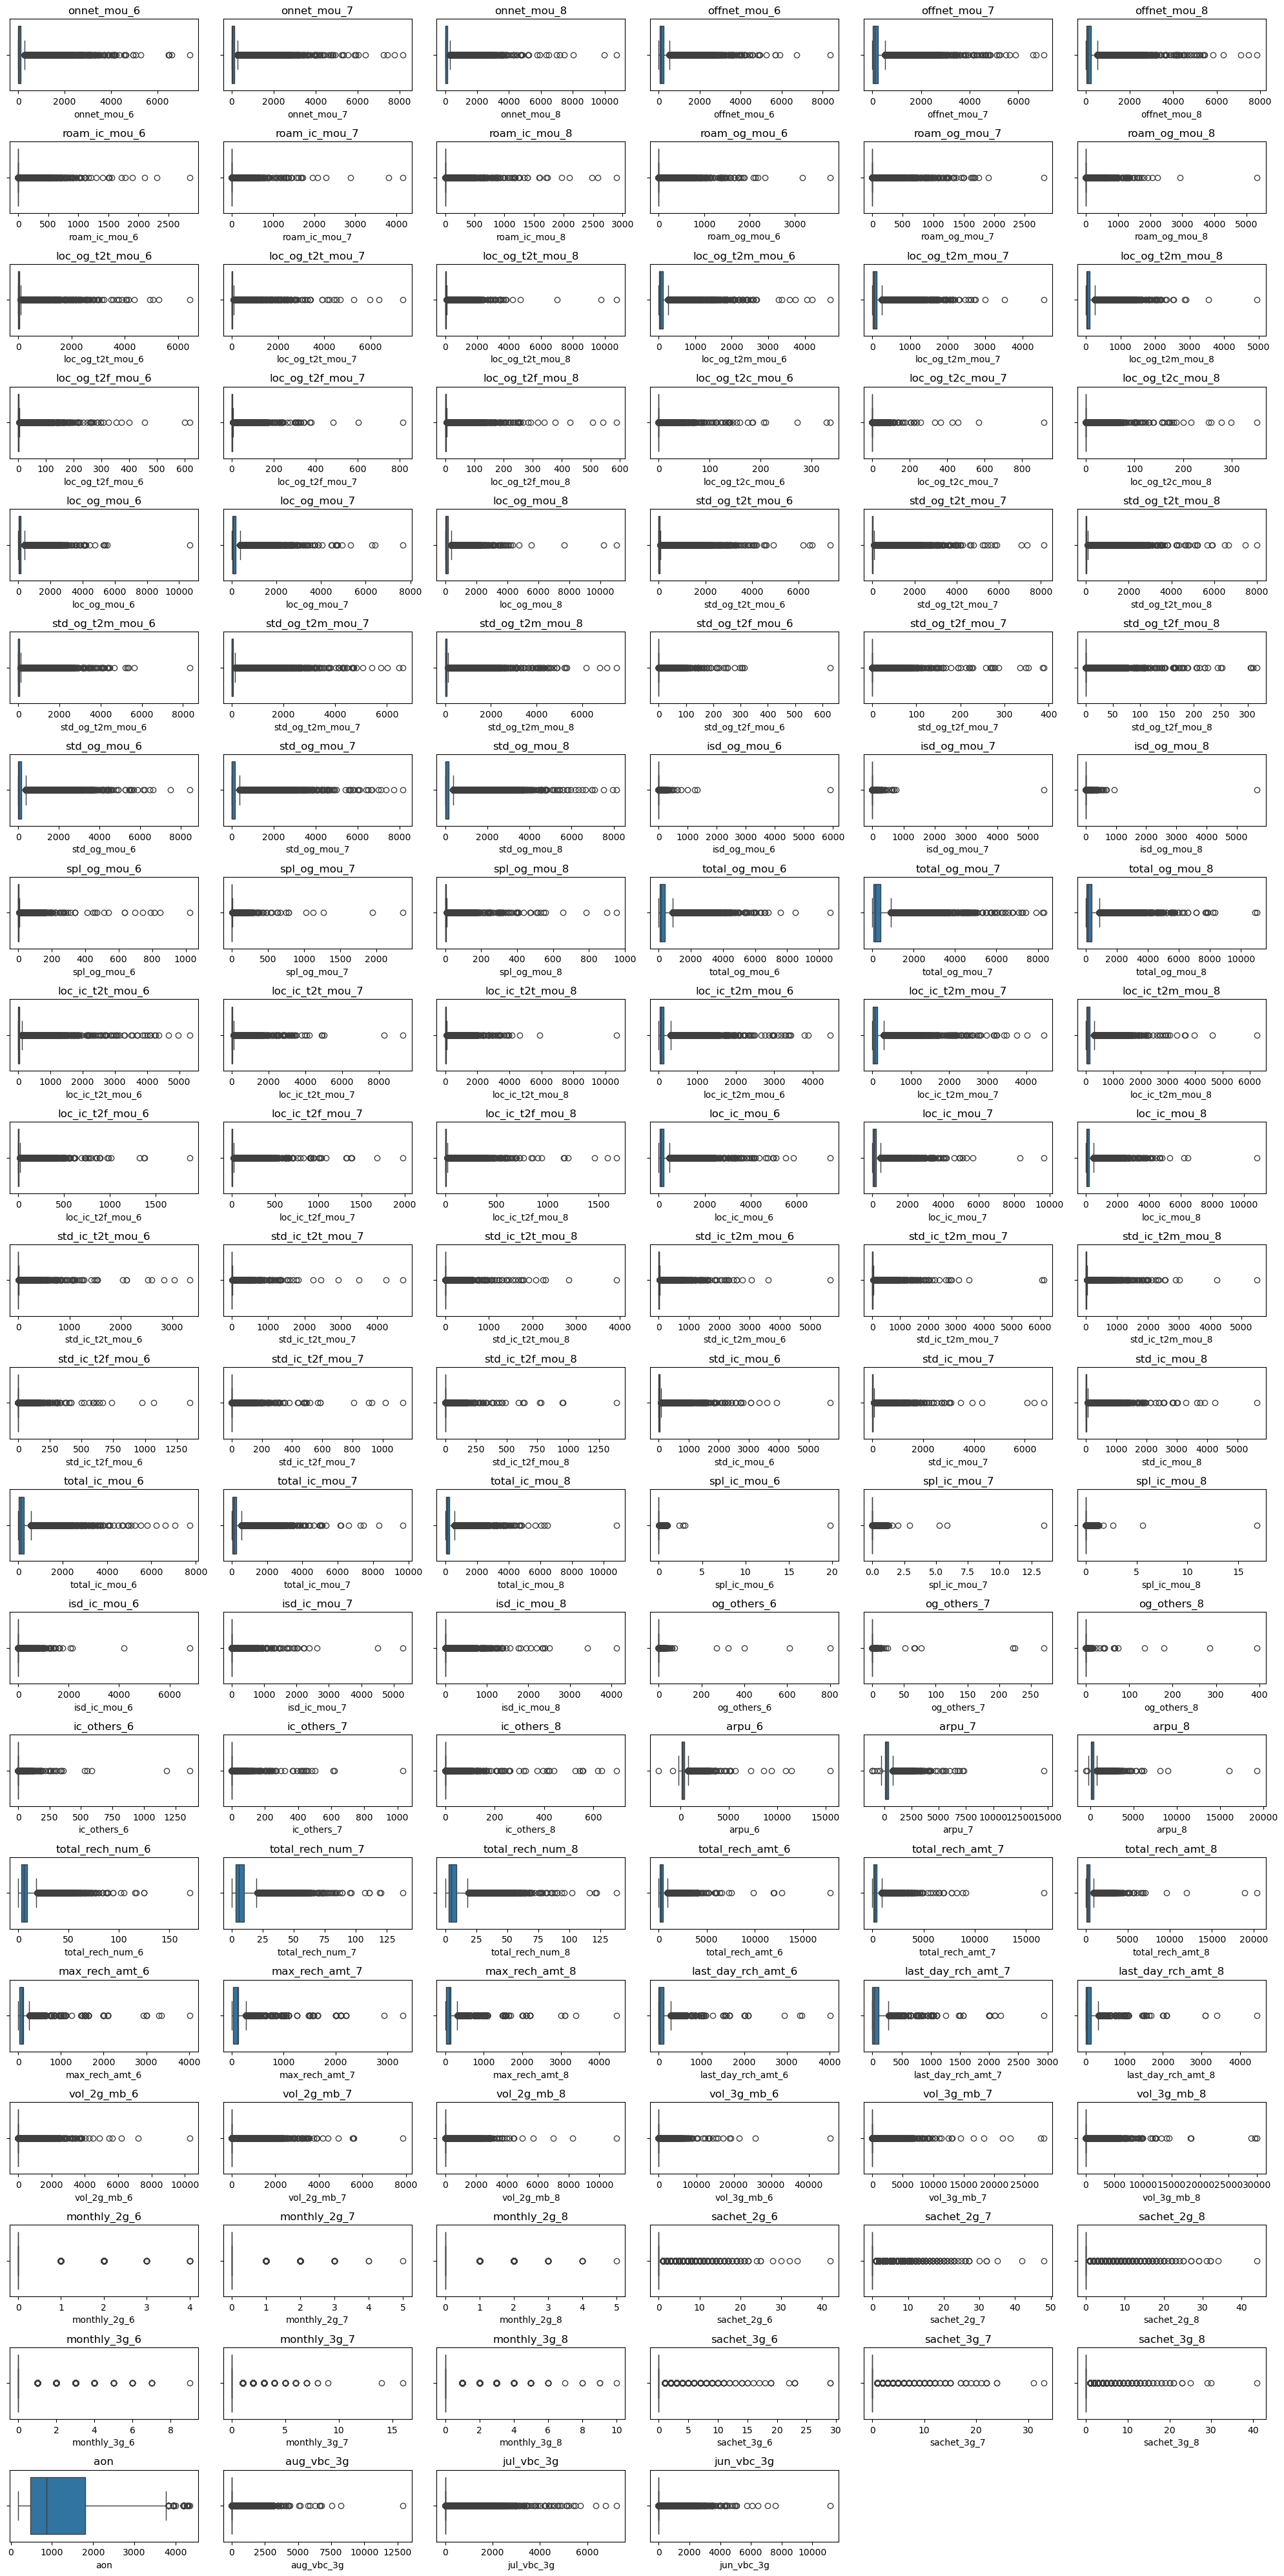

In [76]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

def plot_violin_plots(data, columns, ncols=6, figsize=(20, 40)):
    """Plots violin plots for the given columns in a grid layout."""
    
    # Calculate required number of rows dynamically
    nrows = math.ceil(len(columns) / ncols)
    
    # Create a figure and axes for subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()  # Flatten axes array for easier iteration

    # Plot violin plots
    for i, col in enumerate(columns):
        sns.boxplot(x=data[col], ax=axes[i])
        axes[i].set_title(col)

    # Remove unused subplot spaces
    for i in range(len(columns), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Usage
plot_violin_plots(final_df, col_custom_impute + col_gen_impute + col_unchanged)


### There are lot many columsn which has outliers

### Outlier

Let us take a look at how the outliers look for the selected columns.

<Axes: >

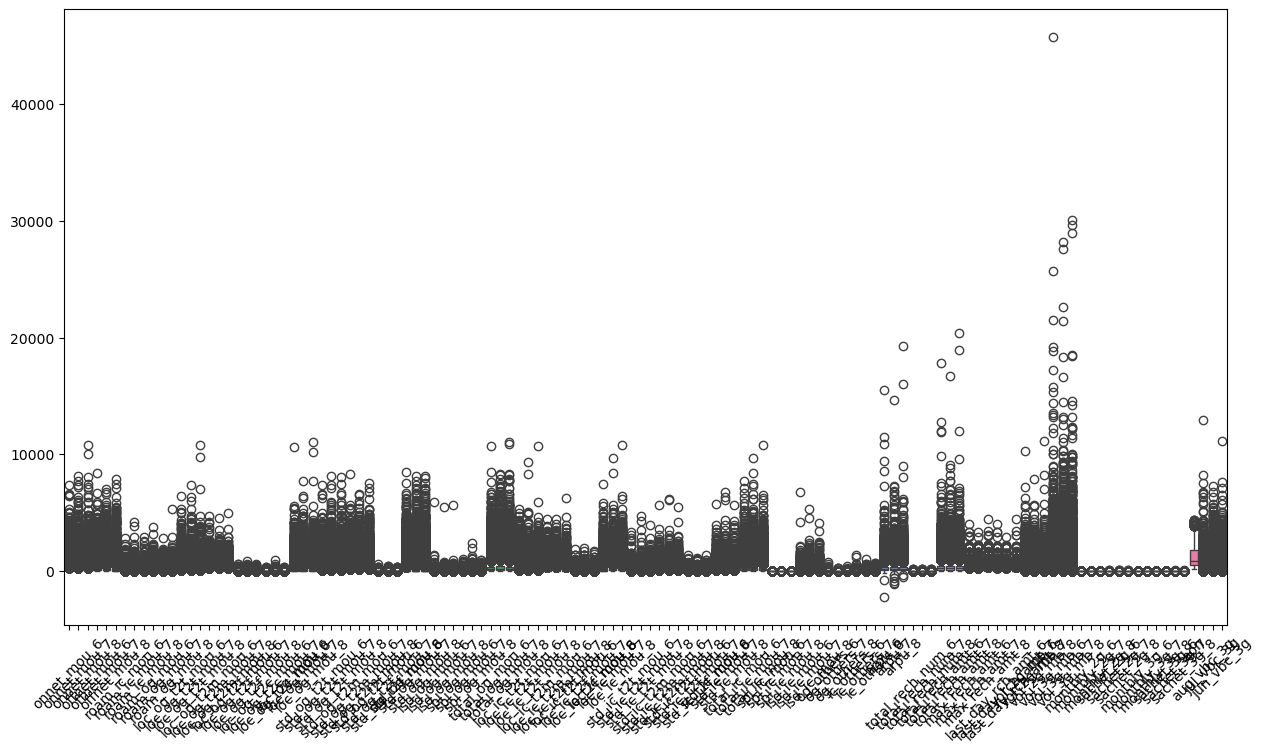

In [83]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train[col_custom_impute + col_gen_impute + col_unchanged])

### **Key Observations**

1. **Extreme Outliers**  
   - Several features exhibit extreme outliers, noticeable from data points positioned far above the main clusters.  
   - These outliers can distort statistical calculations and potentially degrade model performance.  

2. **Wide Range of Values**  
   - Certain features, particularly on the left side, display significantly larger value ranges compared to others.  
   - This highlights potential scaling concerns that may require attention.  


**Techniques to Address Issues:**

1. Outlier Handling:
  - Winsorization: Cap extreme values to a specified percentile range (e.g., 1st and 99th percentiles).
  - IQR Method: Remove or adjust data points that lie beyond 1.5 times the interquartile range.
  - Domain-Specific Rules: If domain knowledge is available, define thresholds for valid data ranges.

2. Scaling and Normalization:
  - Apply standard scaling (z-score normalization) or min-max scaling to bring all features to a similar range.
  - Log transformation can be helpful for features with large ranges and positive skewness.

### **Outlier Handling Using IQR Method**

To manage outliers effectively, we will implement the **IQR (Interquartile Range) method**. A custom transformer using **scikit-learn** has been created for this purpose, ensuring seamless integration within our data processing pipelines.


Define function to perform IQR based capping.

In [88]:
# Custom transformer to cap outliers
class CustomOutlierCapping(BaseEstimator, TransformerMixin):
    """
    Custom transformer to cap outliers using the IQR method.

    This transformer identifies and caps outliers in the input data using the
    Interquartile Range (IQR) method. Outliers are values that fall outside
    a specified range defined by the IQR and a factor.

    Parameters
    ----------
    method : str, default='iqr'
        The method used for outlier capping. Currently, only 'iqr' is supported.
    factor : float, default=1.5
        The factor used to determine the outlier range. Outliers are defined
        as values outside the range [Q1 - factor * IQR, Q3 + factor * IQR],
        where Q1 and Q3 are the first and third quartiles, respectively.

    Attributes
    ----------
    lower_bound : pd.Series
        The lower bound for each feature, calculated during fitting.
    upper_bound : pd.Series
        The upper bound for each feature, calculated during fitting.
    """

    def __init__(self, method='iqr', factor=1.5):
        self.method = method
        self.factor = factor

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        if self.method == 'iqr':
            Q1 = X.quantile(0.25)
            Q3 = X.quantile(0.75)
            IQR = Q3 - Q1
            self.lower_bound = Q1 - self.factor * IQR
            self.upper_bound = Q3 + self.factor * IQR
        return self

    def transform(self, X):
        X = pd.DataFrame(X)  # Ensure it's a DataFrame
        # Clip outliers
        for col in X.columns:
            X[col] = np.clip(X[col], self.lower_bound[col], self.upper_bound[col])
        return X

### **Applying Custom Outlier Capping**

Next, we'll apply the **CustomOutlierCapping** transformer to manage outliers and observe the updated data distribution.


<Axes: >

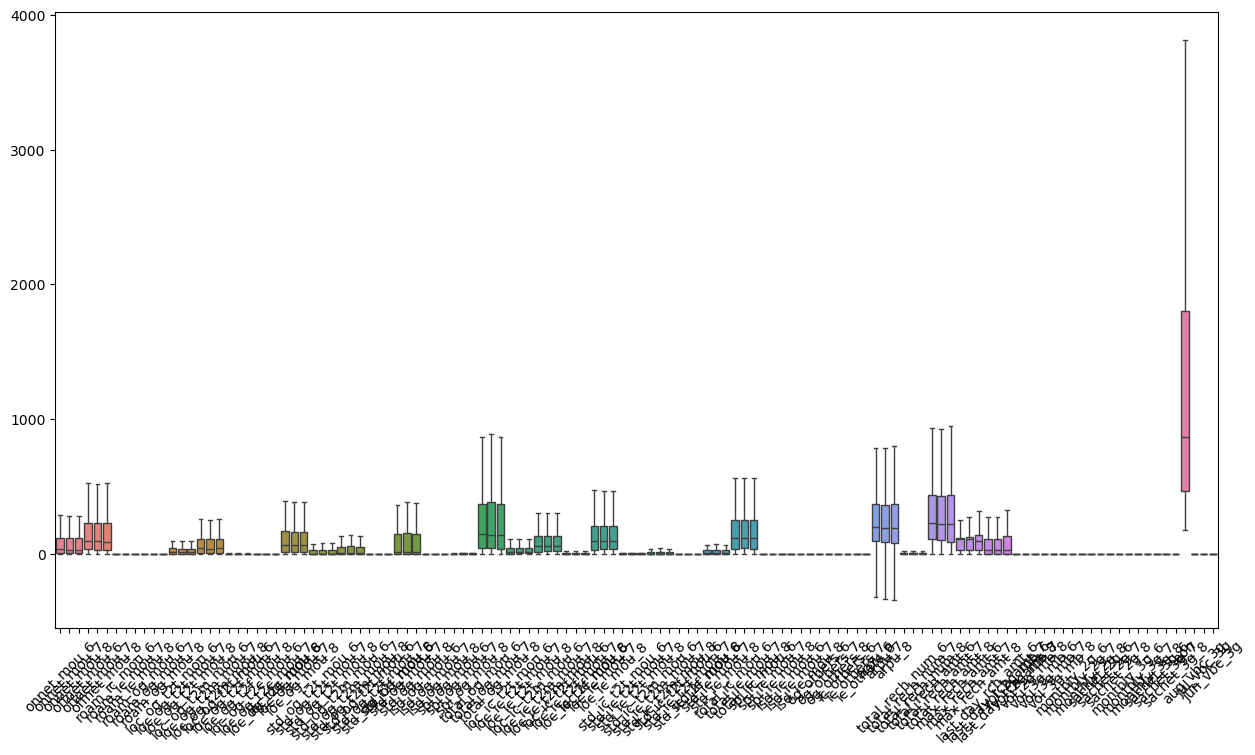

In [93]:
# Create an instance of the custom transformer
outlier_capper = CustomOutlierCapping()

# Fit and transform the training data
X_train_capped = outlier_capper.fit_transform(X_train[col_custom_impute + col_gen_impute + col_unchanged])

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_capped)

Outliers have reduced.

## Bivariate Analysis

### All selected columns

Let us analyse the distribution of all columns by churn probability.

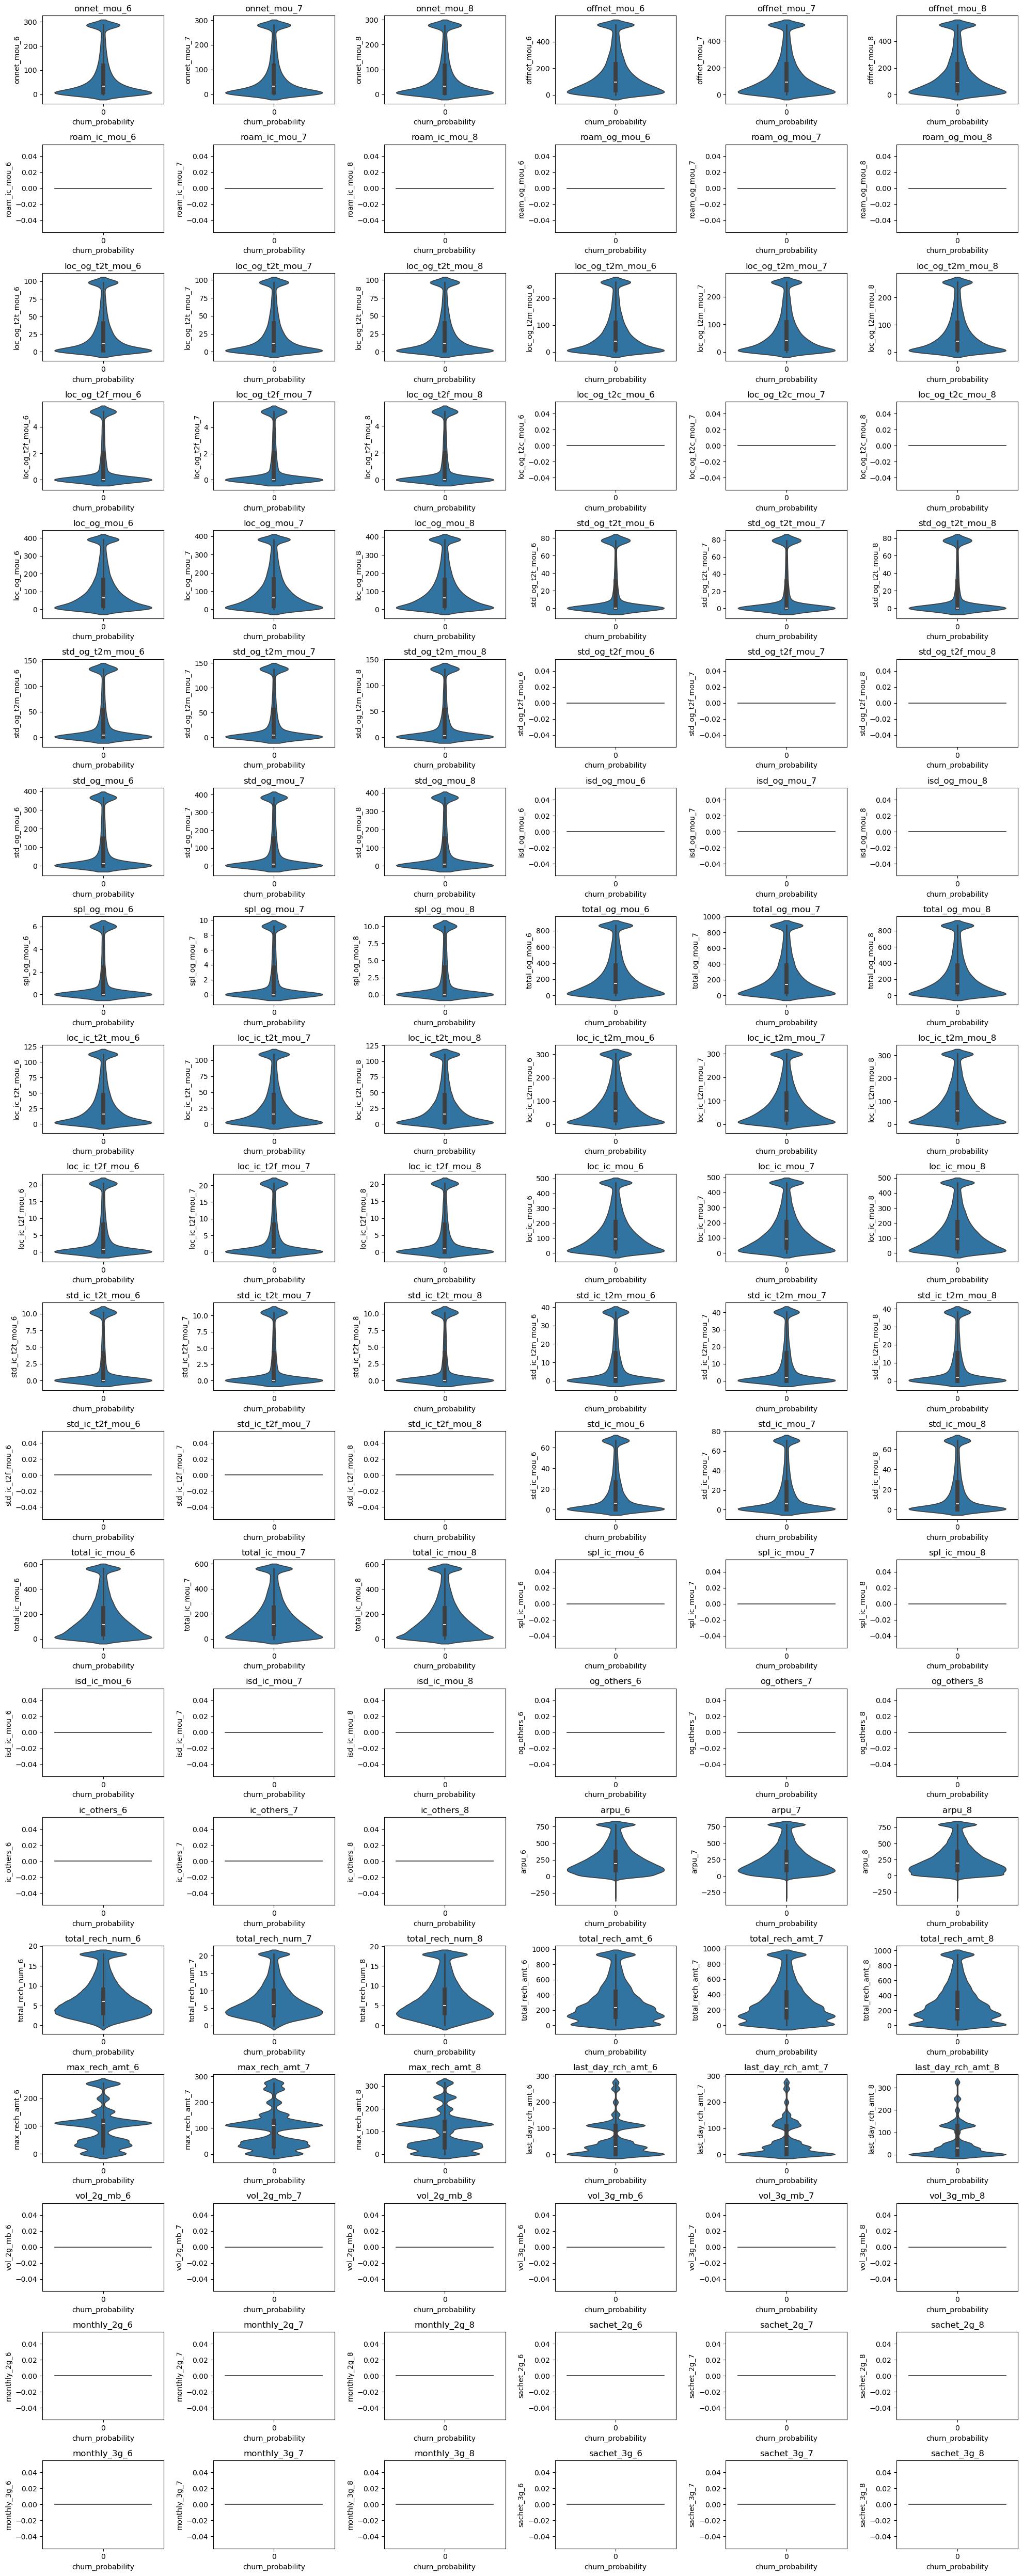

In [95]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=20, ncols=6, figsize=(20, 50))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate through each column and create a violin plot
for i, col in enumerate(col_custom_impute + col_gen_impute + col_unchanged):
    if i < len(axes):  # Check if we have enough subplots
        sns.violinplot(x='churn_probability', y=col, data=outlier_capper.fit_transform(final_df[col_custom_impute + col_gen_impute + col_unchanged + ['churn_probability']]), ax=axes[i])
        axes[i].set_title(col)

# Remove any unused subplots
for i in range(len(col_custom_impute + col_gen_impute + col_unchanged), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout to prevent overlapping titles and labels
plt.show()

### Behaviour Analysis of Columns

## 📊 Analyzing Customer Behavior Across Three Months: Identifying Changes and Patterns

### 🎯 Objective
The primary goal of this analysis is to track customer behavior across three months (Months 6, 7, and 8) to uncover key changes, patterns, and potential churn indicators. By examining customer activity data, we aim to provide insights that can drive effective retention strategies and enhance business outcomes.

### 🛠️ Methodology

- **🔎 Data Selection:**  
  - Focuses on customer-level data for Months 6, 7, and 8.  
  - Emphasis on key variables reflecting customer engagement and spending patterns.

- **📈 Variable Analysis:**  
  The "Behavior Analysis" section examines key variables using box plots to highlight trends and anomalies. Key variables include:  
  - **`total_rech_amt`** → Total recharge amount  
  - **`total_rech_num`** → Total recharge number  
  - **`av_rech_amt_data`** → Average recharge amount for data  
  - **`total_og_mou`** → Total outgoing minutes of usage  
  - **`total_ic_mou`** → Total incoming minutes of usage  

- **📉 Trend Identification:**  
  - We will track changes in these variables over the three-month period to spot potential churn indicators.  
  - For example, a consistent decline in recharge amounts or usage minutes may signal churn risk.  

- **🧩 Pattern Recognition:**  
  - By comparing these variables between churned and non-churned customers, we aim to identify behavioral patterns linked to churn.  
  - For instance, churn-prone customers may exhibit decreased recharge amounts or reduced usage leading up to the churn phase.  


In [103]:
# create box plot function for  6th, 7th and 8th month variables
def plot_box_chart(data, attribute):
    plt.figure(figsize=(20,16))
    plt.subplot(2,3,1)
    sns.boxplot(data=data, y=attribute+"_6", x="churn_probability", hue="churn_probability", showfliers=False,palette=("coolwarm"))
    plt.subplot(2,3,2)
    sns.boxplot(data=data, y=attribute+"_7", x="churn_probability", hue="churn_probability", showfliers=False,palette=("coolwarm"))
    plt.subplot(2,3,3)
    sns.boxplot(data=data, y=attribute+"_8", x="churn_probability", hue="churn_probability", showfliers=False,palette=("coolwarm"))
    plt.show()

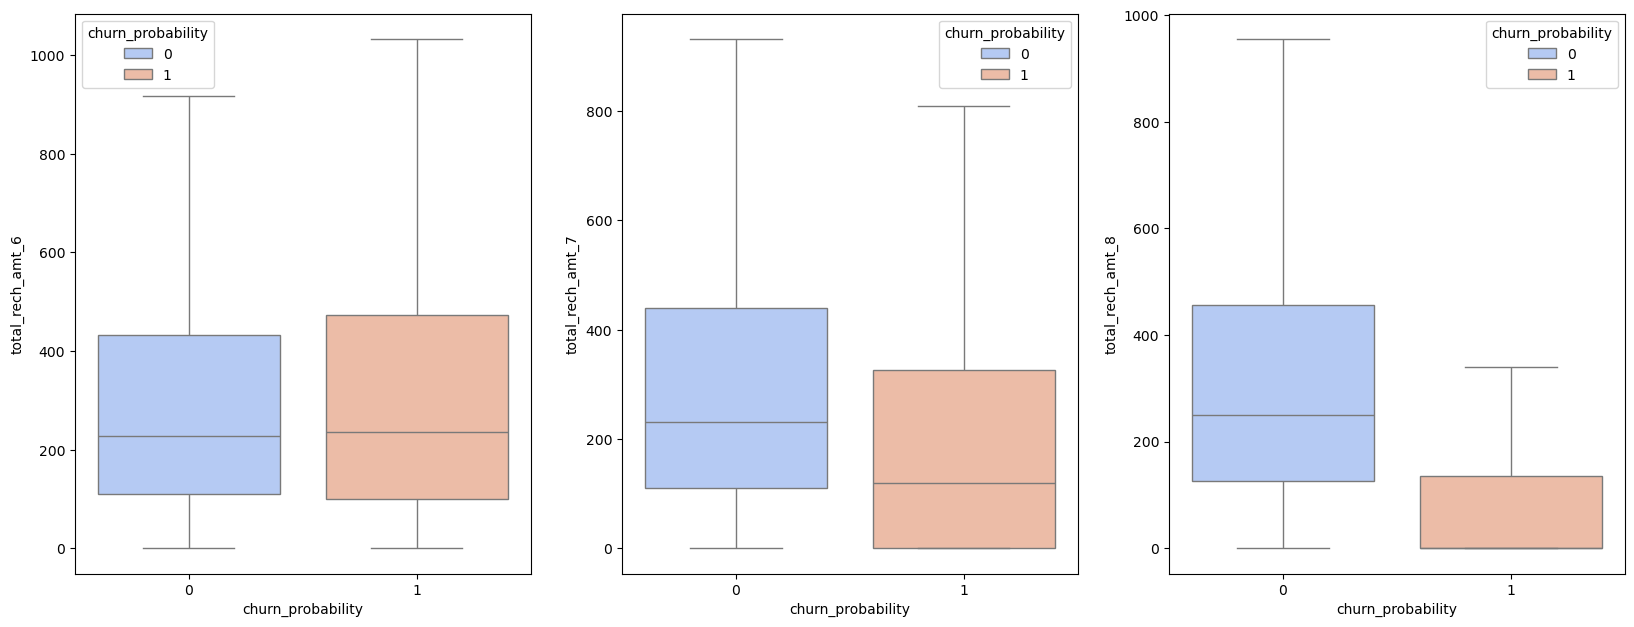

In [105]:
plot_box_chart(data, "total_rech_amt")

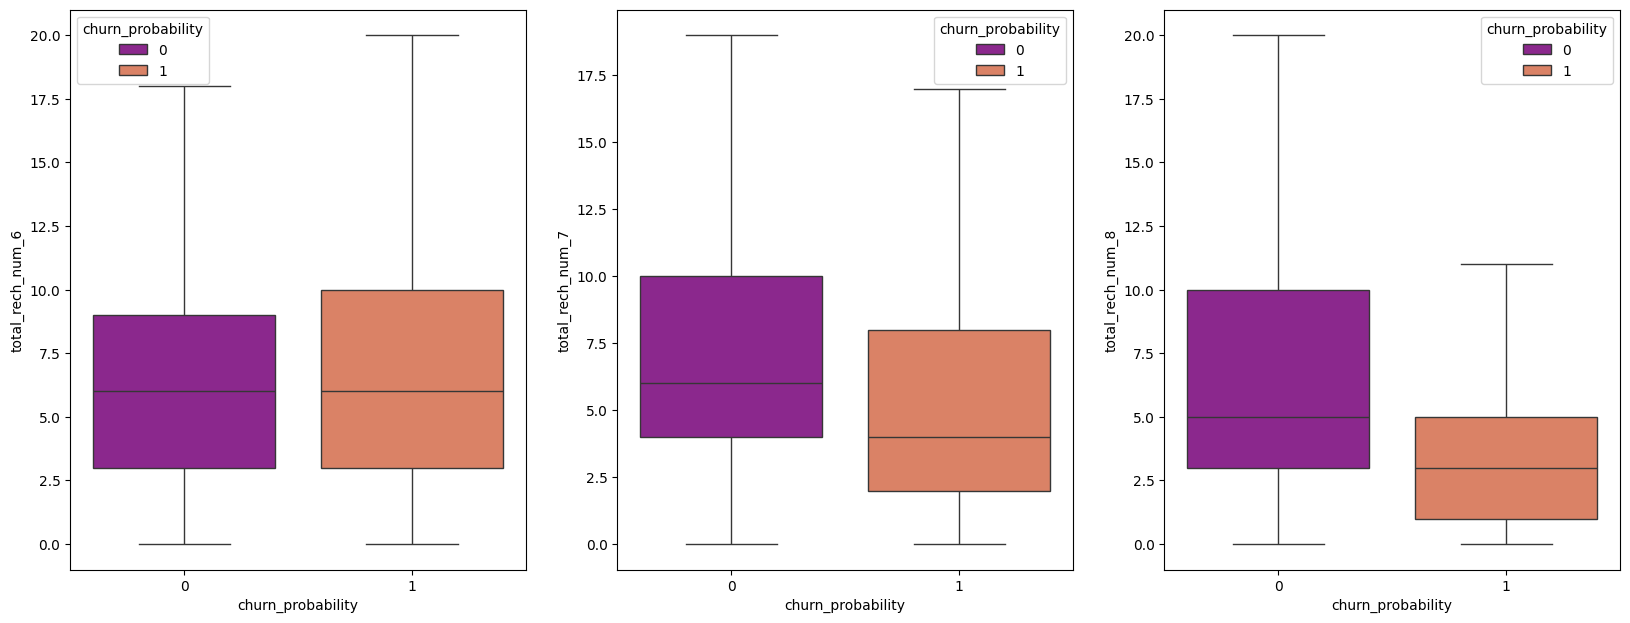

In [ ]:
plot_box_chart(data, "total_rech_num")

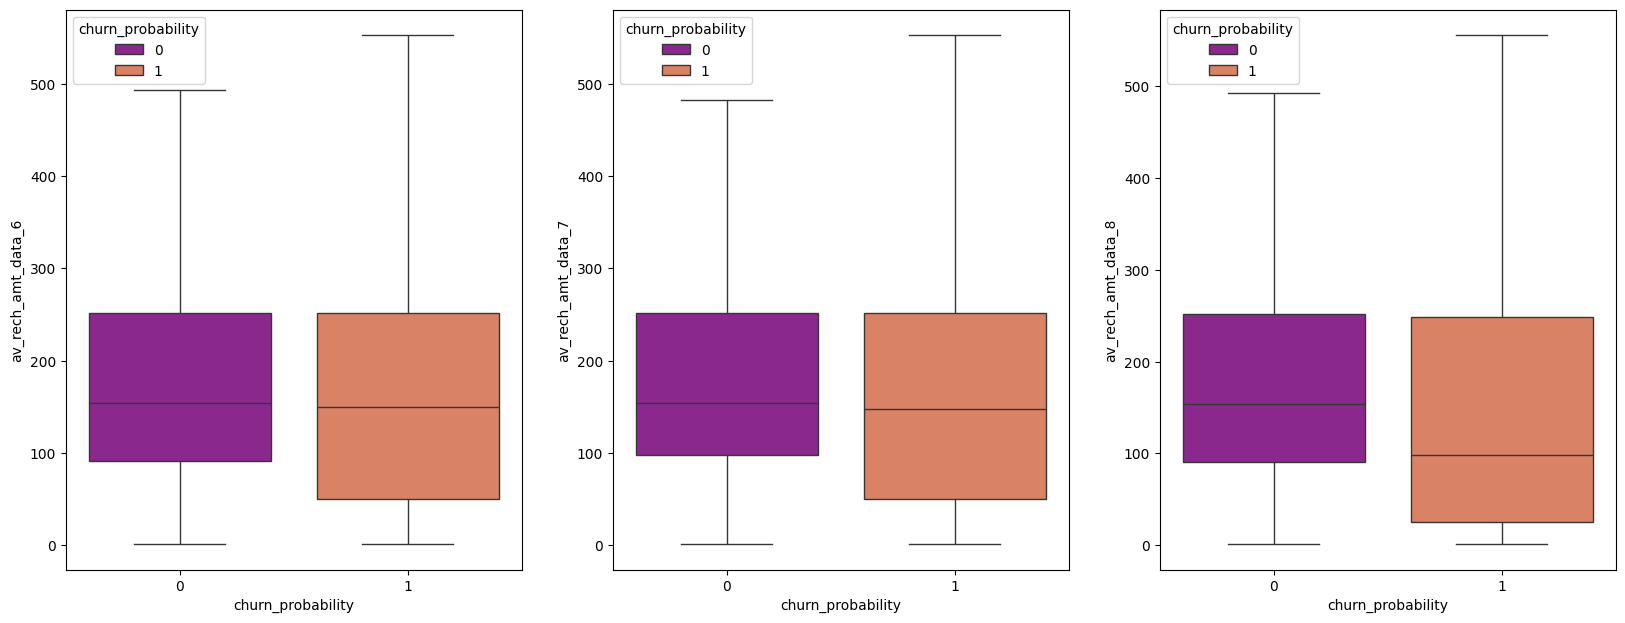

In [ ]:
plot_box_chart(data, "av_rech_amt_data")

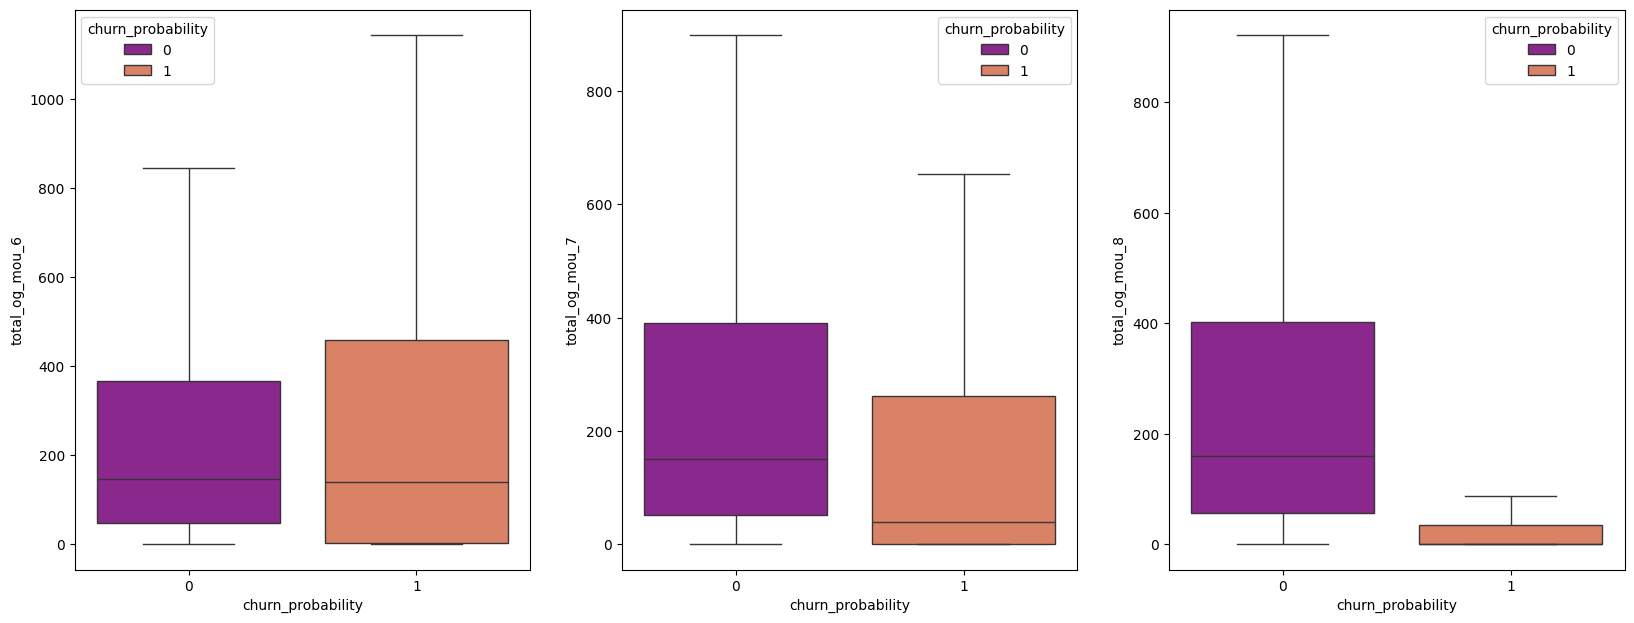

In [ ]:
plot_box_chart(data, "total_og_mou")

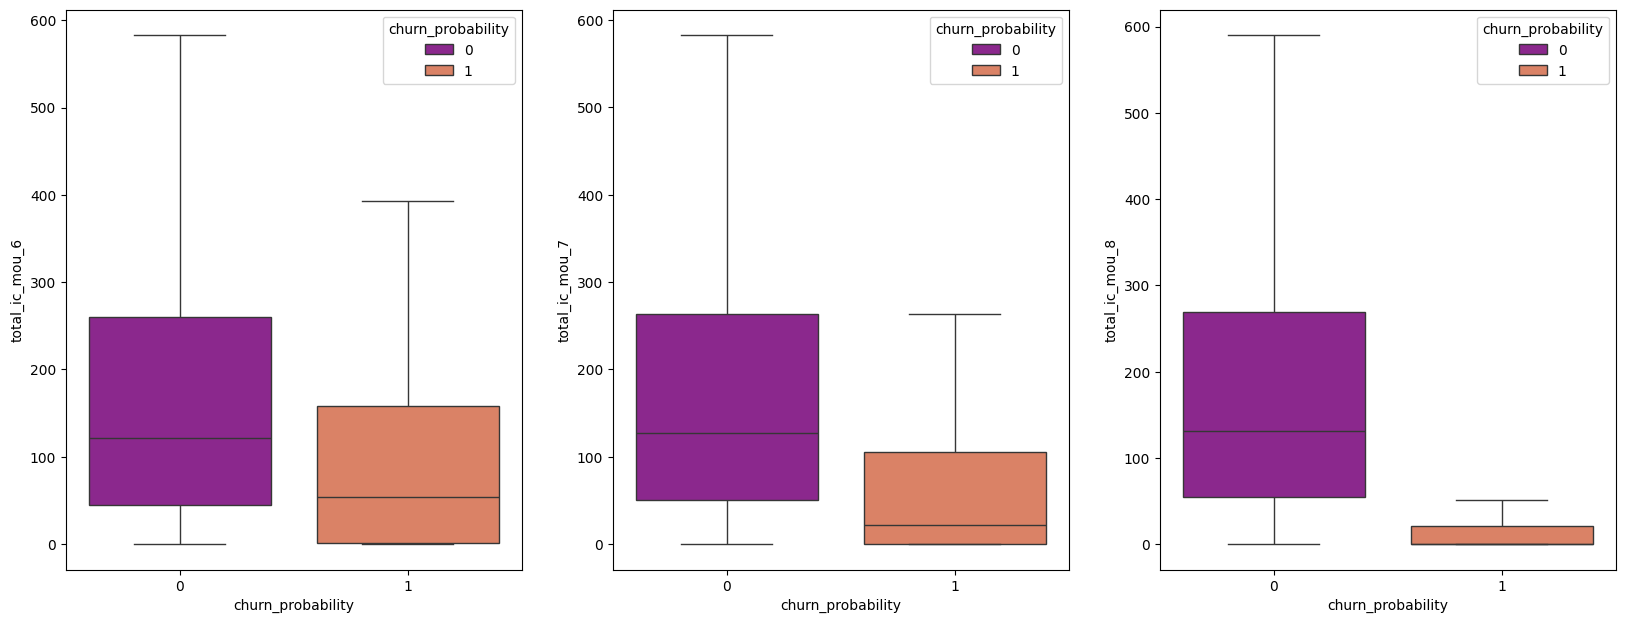

In [ ]:
plot_box_chart(data, "total_ic_mou")

### **Insights from Box Plots: Understanding Customer Behavior for Churn Prediction**

---

### **Key Observations:**

The box plots reveal noticeable differences in behavior between churned and non-churned customers across months 6, 7, and 8.  

- **Non-churned customers (class 0)** maintain relatively stable recharge amounts and usage patterns.  
- **Churned customers (class 1)** show a distinct decline in key usage metrics, particularly in month 8, which may serve as an early warning signal for potential churn.

---

### **Detailed Insights:**

- **Average Recharge Amount (`av_rech_amt_data`)**  
  - For **non-churned customers**, the median, 25th percentile, and 75th percentile values remain stable across all three months.  
  - For **churned customers**, there’s a noticeable decline in these values during month 8, indicating a reduction in data recharge spending as they approach churn.

- **Total Outgoing Minutes (`total_og_mou`)**  
  - **Non-churned customers** demonstrate consistent outgoing call usage across the three months.  
  - **Churned customers** show a sharp drop in median, 25th, and 75th percentile values in month 8, signaling a significant reduction in outgoing calls.

- **Total Incoming Minutes (`total_ic_mou`)**  
  - **Non-churned customers** maintain stable incoming call activity throughout the period.  
  - **Churned customers** exhibit a marked decline in the median, 25th, and 75th percentile values in month 8, reflecting reduced engagement.

---

### **Conclusion:**

These insights highlight clear behavioral differences between churned and non-churned customers.  

📉 **The significant drop in recharge amounts and usage metrics in month 8 for churned customers underscores the importance of closely monitoring customer activity patterns.**  

By identifying such trends early, businesses can implement proactive strategies to address potential churn risks.  

---

### **Next Steps:**

🔎 The insights from this analysis will be leveraged to create new variables in the **Feature Engineering** section to enhance predictive modeling and improve churn prediction accuracy.


## Finding Correlation between features

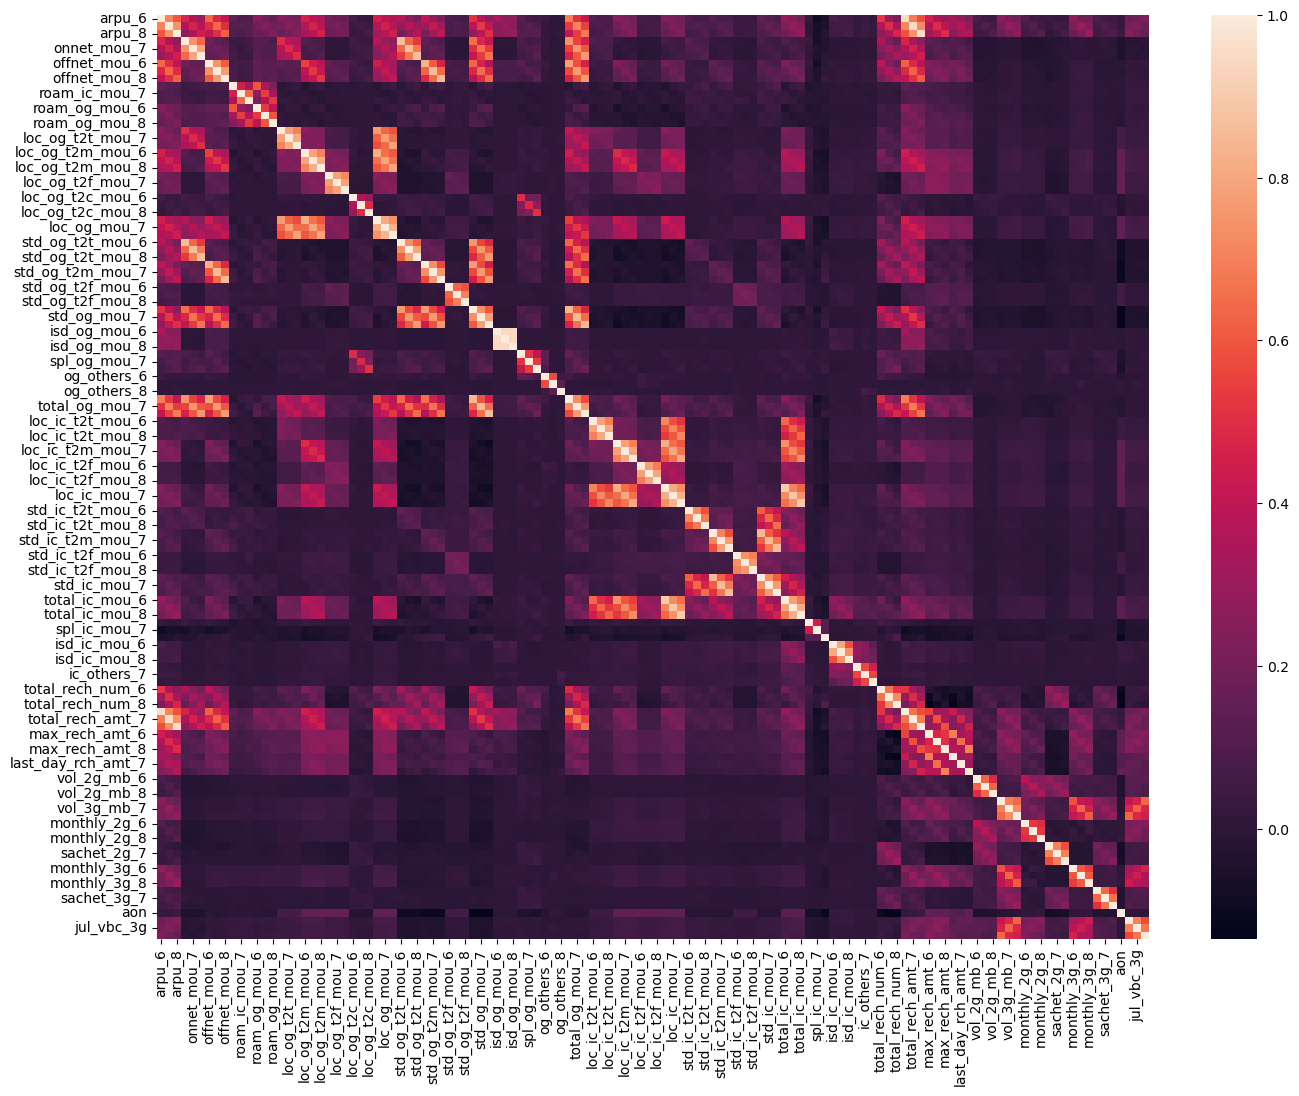

In [110]:
plt.figure(figsize=(16,12))
sns.heatmap(X_train[X_train.columns[X_train.columns.isin(col_custom_impute +
                                                         col_gen_impute +
                                                         col_unchanged)==True].tolist()].corr())
plt.show()

### **Key Observations from the Heatmap Analysis**

---

1. **Strong Correlation:**
   - Features displaying high correlation values (close to 1) are marked by brighter colors on the heatmap.
   - Such correlations indicate potential redundancy, as these features may carry overlapping information.

2. **Low or Negative Correlation:**
   - Certain features exhibit weak or negative correlations, suggesting they provide distinct and independent insights.

3. **Clustered Patterns:**
   - Noticeable block structures reveal groups of closely related features, likely measuring similar concepts or behaviors.

---

🧠 **These insights will guide feature selection and dimensionality reduction efforts to enhance model efficiency.**


### **Techniques to Address Identified Observations**

---

1. **Feature Selection:**
   - Implement correlation thresholding to eliminate features with high pairwise correlations (e.g., drop one feature from pairs with correlation > 0.9).
   - Employ techniques like **Variance Inflation Factor (VIF)** to detect and remove multicollinear features.
   - Leverage **Recursive Feature Elimination (RFE)** to select the most impactful features.

2. **Dimensionality Reduction:**
   - Utilize **Principal Component Analysis (PCA)** to condense the feature space while preserving key variance within the data.

3. **Regularization Techniques:**
   - Adopt methods such as **LASSO (L1 Regularization)** or **Elastic Net**, which penalize redundant and less significant features, promoting a more streamlined model.

4. **Model-Based Feature Importance:**
   - Train models like **Random Forest** or **Gradient Boosting** to derive feature importance scores, aiding in informed feature selection.

---

📊 **Combining these techniques ensures optimal feature selection, improved model performance, and reduced overfitting risk.**


### Correlation Analysis with grouped subset of columns

In [114]:
amount_data = final_df.loc[:, final_df.columns.str.contains('amt')]
data2g = final_df.loc[:, final_df.columns.str.contains('2g')]
data3g = final_df.loc[:, final_df.columns.str.contains('3g')]
ic_mou_data = final_df.loc[:, final_df.columns.str.contains('ic') & final_df.columns.str.contains('mou')]
net_mou_data = final_df.loc[:, final_df.columns.str.contains('net_mou')]
og_mou_data = final_df.loc[:, final_df.columns.str.contains('og') & final_df.columns.str.contains('mou')]
rech_data = final_df.loc[:, final_df.columns.str.contains('rech')]
total_data = final_df.loc[:, final_df.columns.str.contains('tot')]

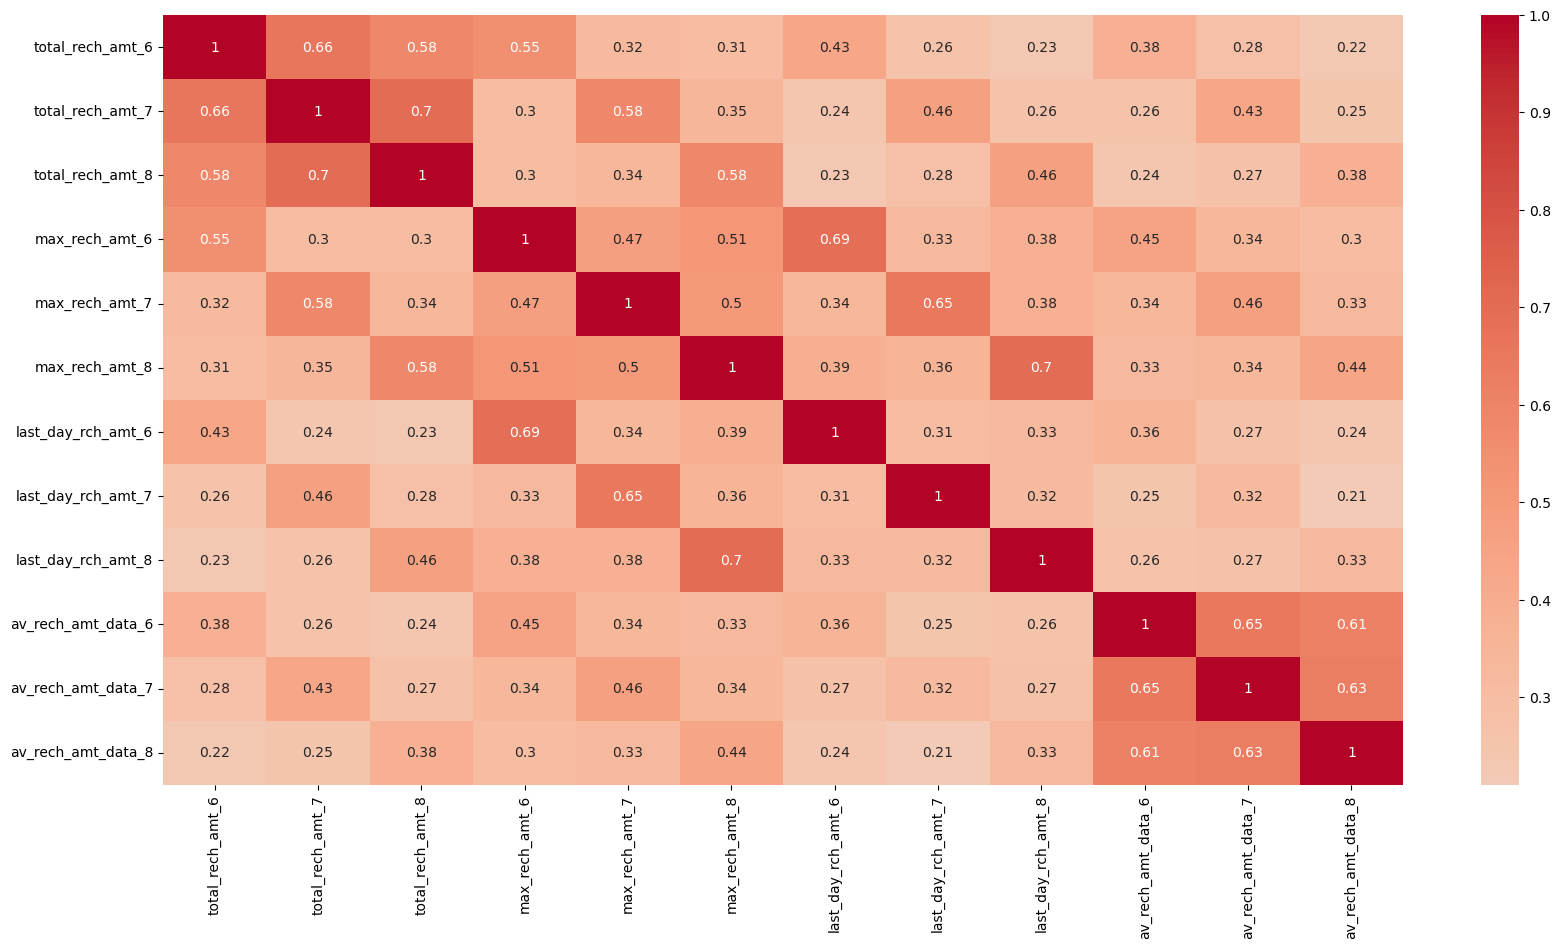

In [116]:
#Checking the corelation for Amount data
plt.subplots(figsize = (20,10))
#Plotting heatmap of numerical features
sns.heatmap(round(amount_data.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

### **Observations**

- A significant **70% correlation** exists between the **total recharge amount** in **month 7** and **month 8**.  
- Additionally, a notable **69% correlation** is observed between the **maximum recharge amount** in **month 8** and the **last day's recharge amount** in the same month.  
- These patterns indicate that **customers less likely to churn** tend to exhibit **higher recharge amounts** in **month 8**, suggesting a potential indicator of customer retention.


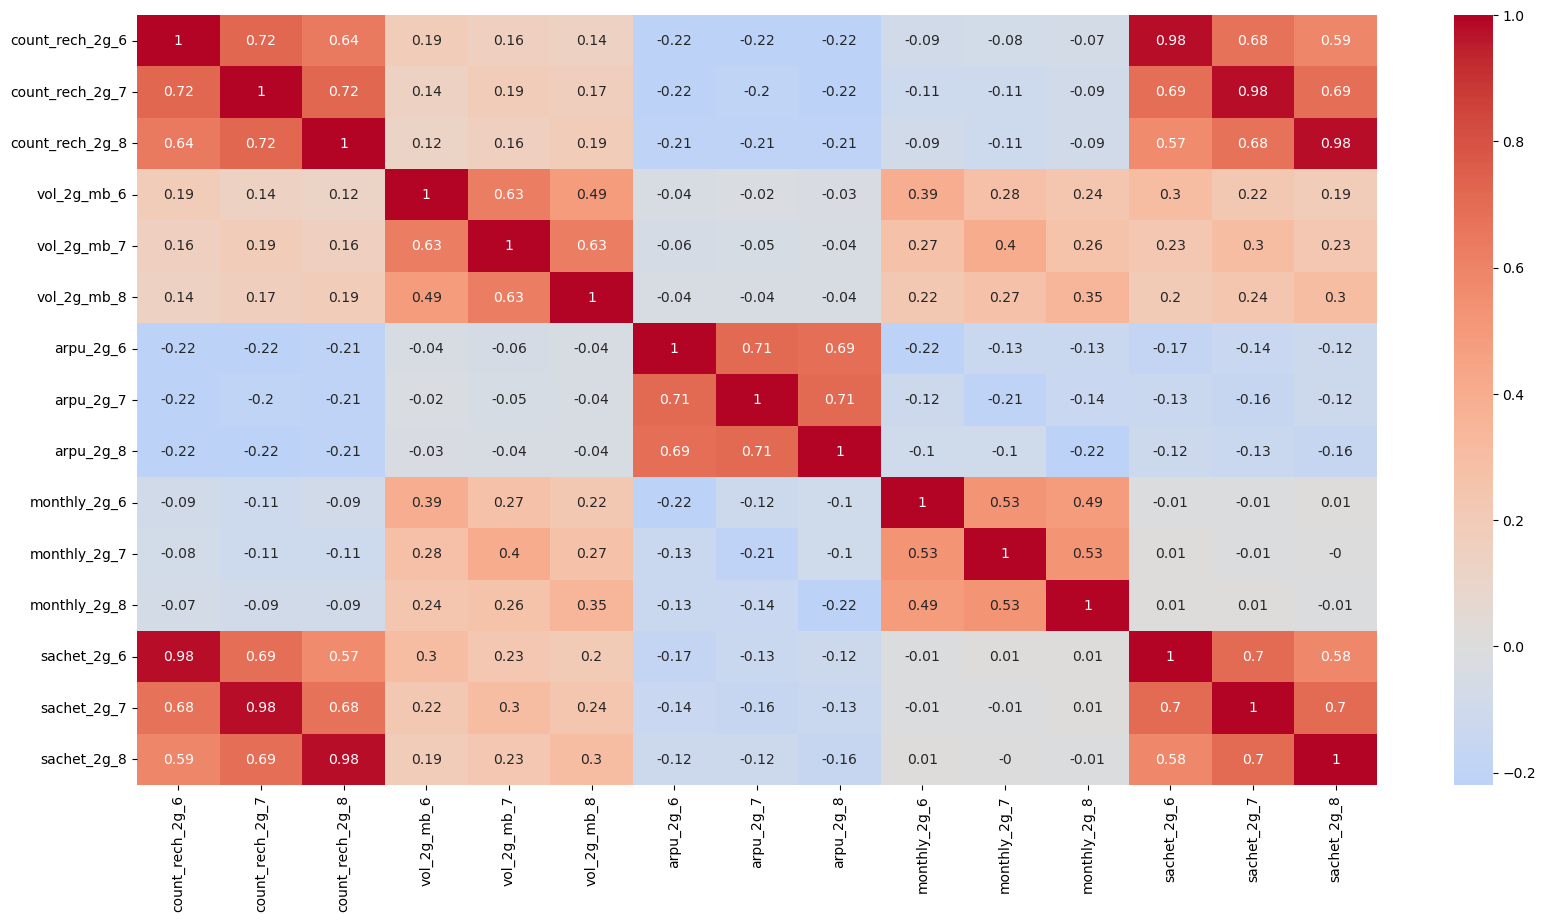

In [119]:
# data2g
plt.subplots(figsize = (20,10))
#Plotting heatmap of numerical features
sns.heatmap(round(data2g.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

### **Observations**

- A **strong correlation** is evident between **recharge quantities** in **months 7** and **8**, highlighting a consistent spending pattern among customers.


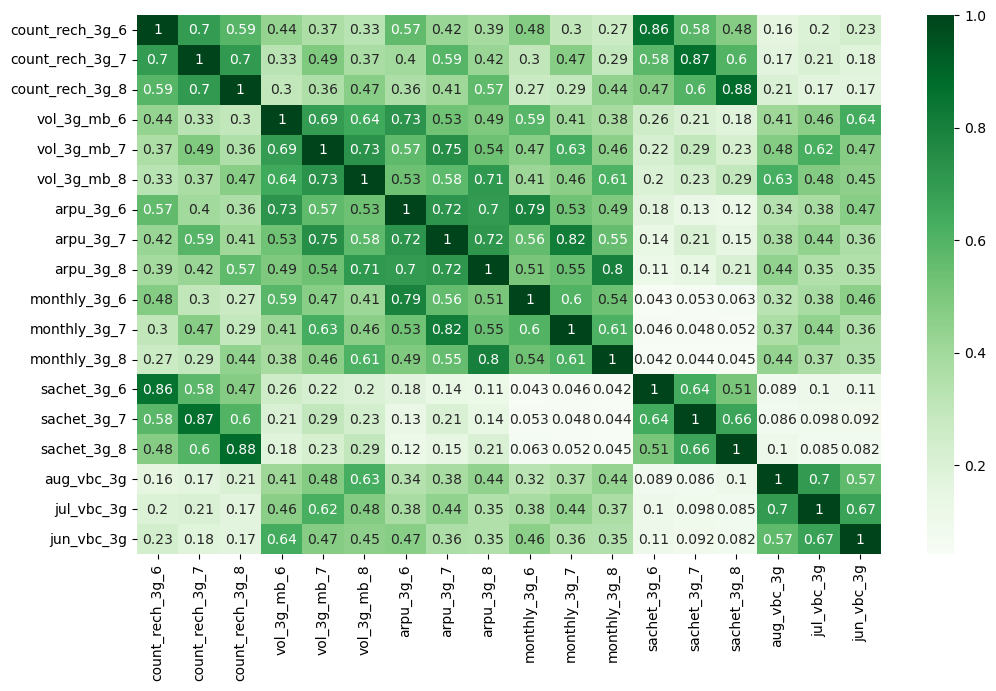

In [122]:
#data3g
plt.figure(figsize=(12,7))
sns.heatmap(data3g.corr(),annot=True, cmap='Greens')
plt.show()

### **Observations**

- A **significant correlation** exists between **recharge amounts** in **months 7** and **8**, suggesting consistent customer behavior in their recharge patterns.


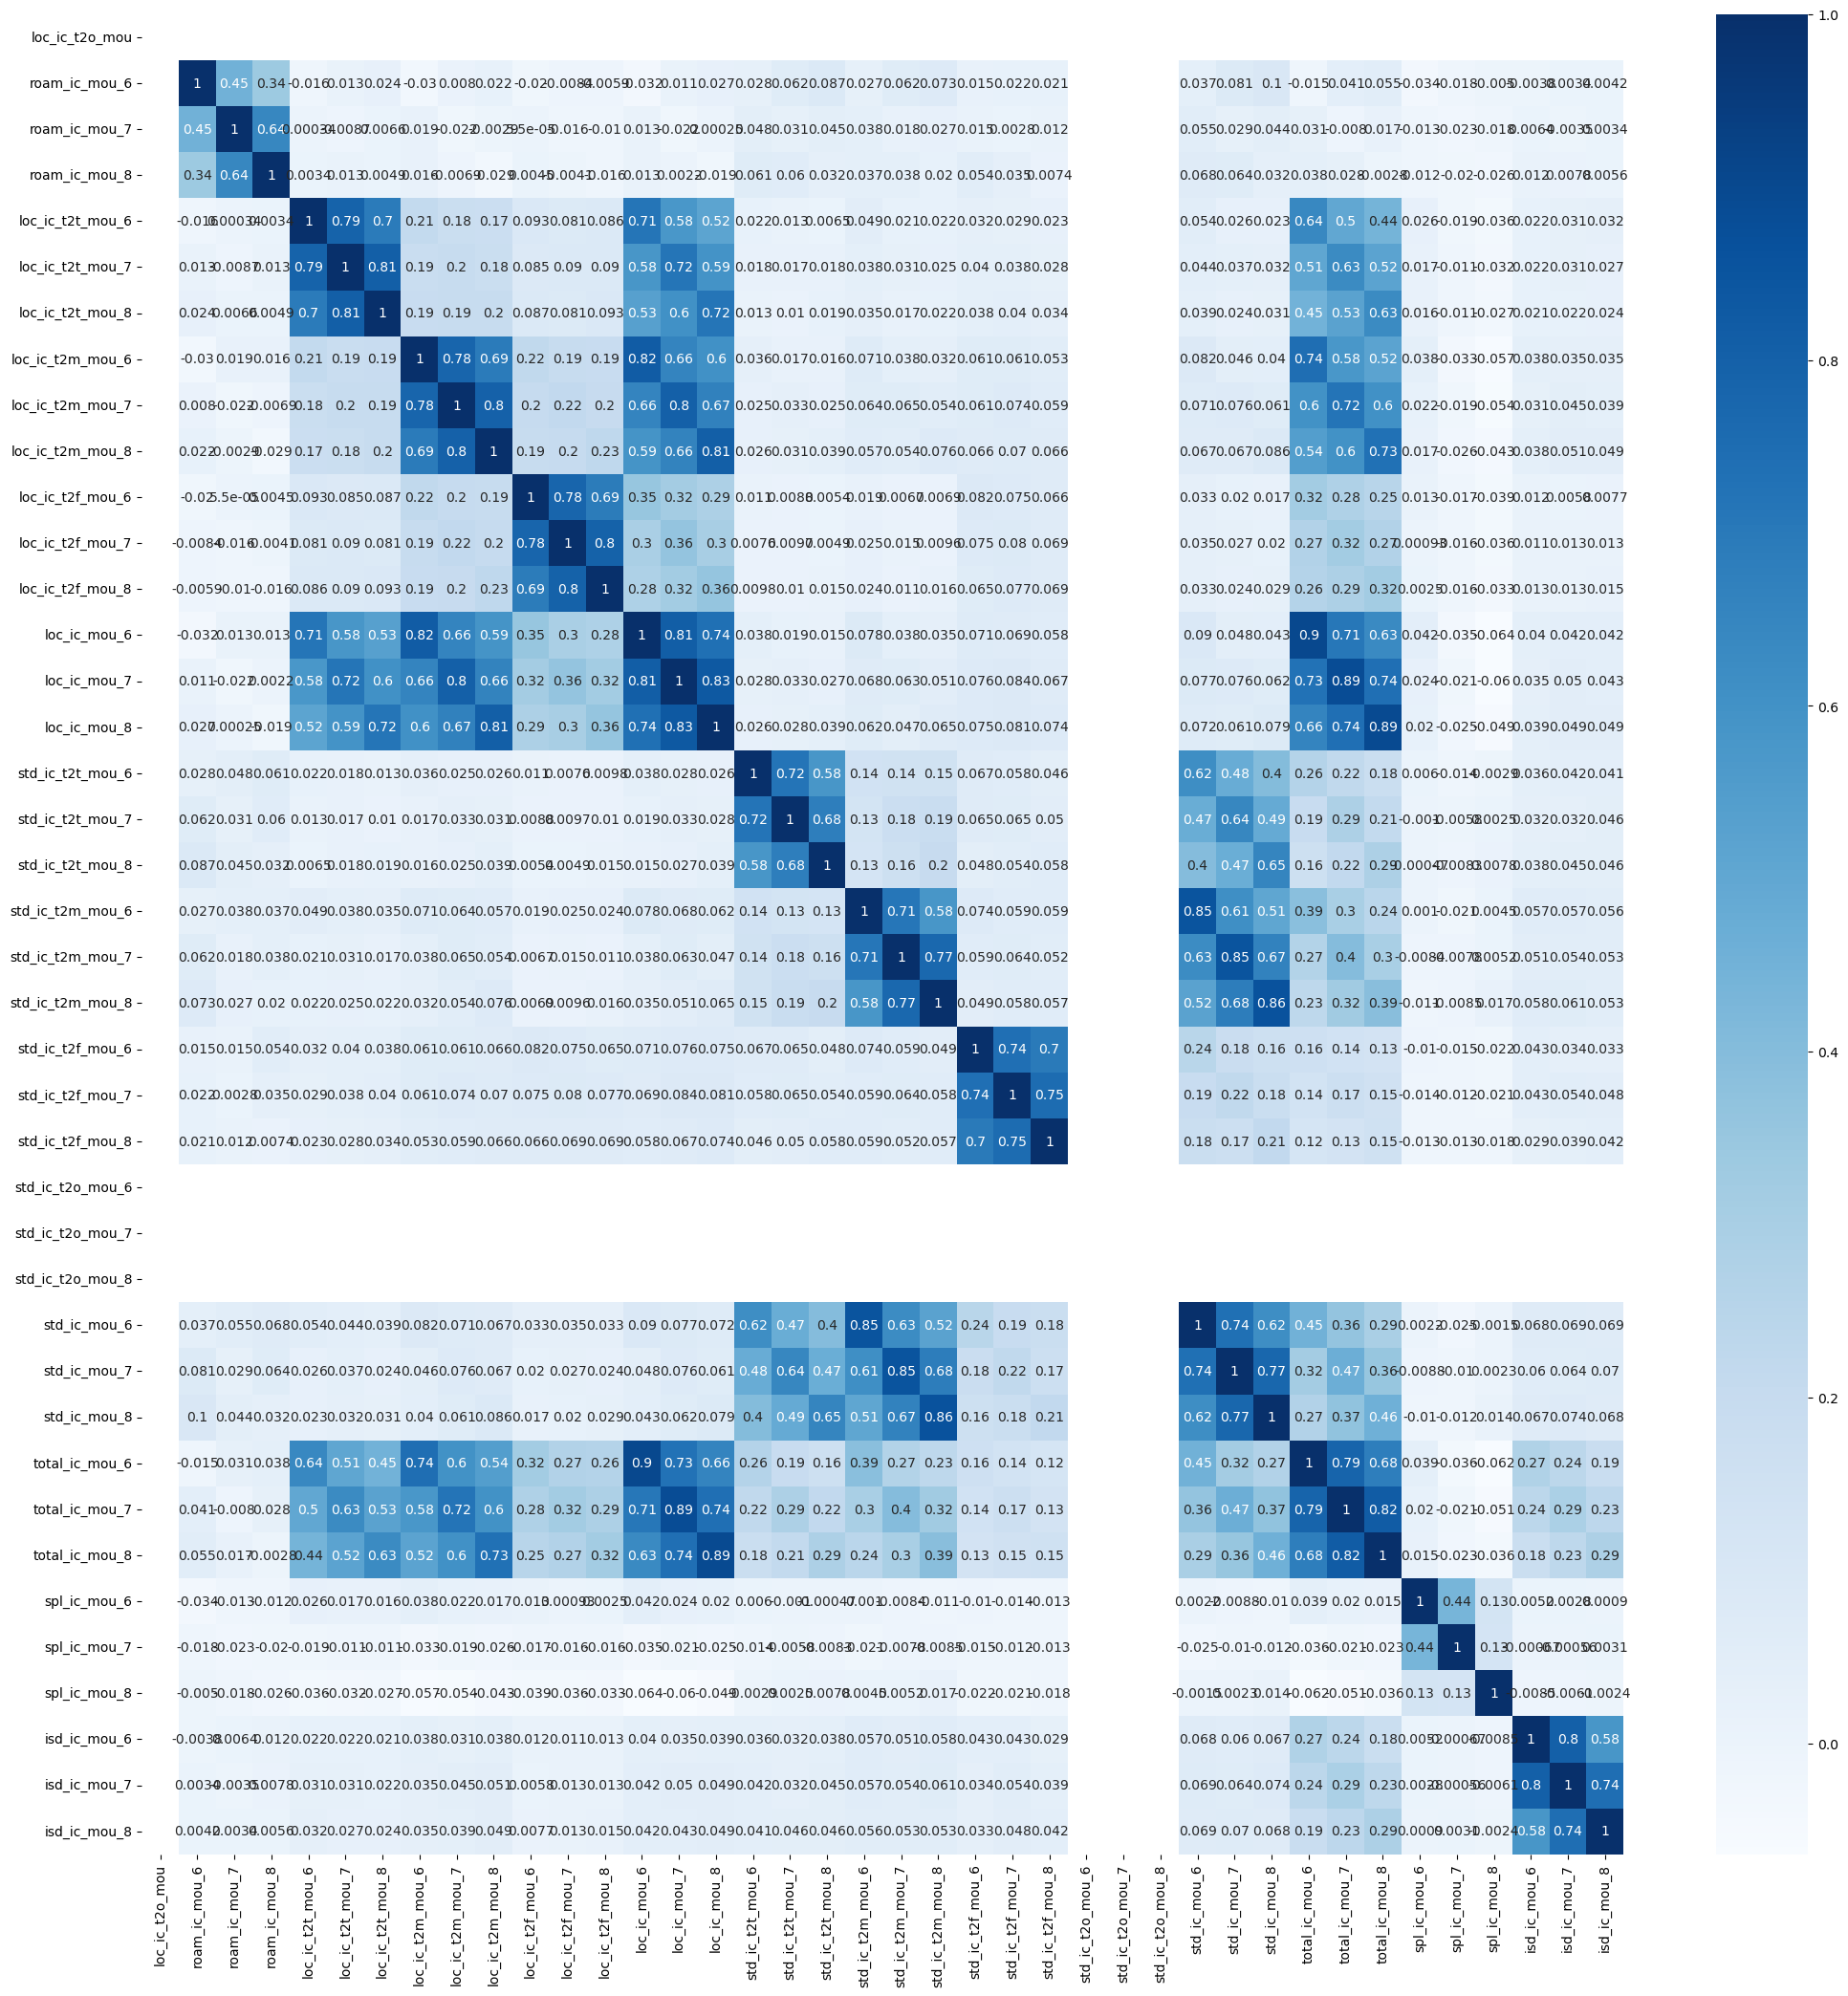

In [125]:
#ic_mou_data
plt.figure(figsize=(25, 25))
sns.heatmap(ic_mou_data.corr(), annot=True, cmap='Blues')
plt.show()

### **Observations**

The following features demonstrate a **strong correlation**, indicating potential redundancy in the data:

- **Incoming Call Minutes (IC MOU):**  
  - `total_ic_mou_6` and `loc_ic_mou_6`  
  - `total_ic_mou_7` and `loc_ic_mou_7`  
  - `total_ic_mou_8` and `loc_ic_mou_8`  

- **Standard Incoming Call Minutes (STD IC MOU):**  
  - `std_ic_mou_6` and `std_ic_t2f_mou_6`  
  - `std_ic_mou_7` and `std_ic_t2f_mou_7`  
  - `std_ic_mou_8` and `std_ic_t2f_mou_8`  

Such correlations may indicate that these variables are capturing similar information, and appropriate feature selection techniques should be considered to minimize redundancy.


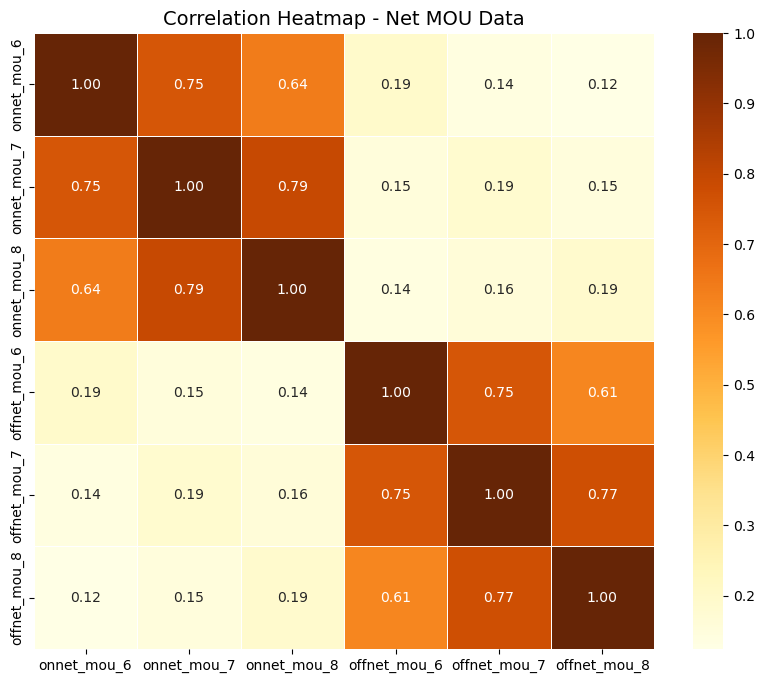

In [128]:
# Heatmap for Net MOU Data Correlation
plt.figure(figsize=(10, 8))  # Adjust figure size for better clarity
sns.heatmap(
    net_mou_data.corr(), 
    annot=True,          # Display correlation values
    cmap='YlOrBr',       # Enhanced orange color gradient
    fmt='.2f',           # Format values to 2 decimal places
    linewidths=0.5,      # Add gridlines for clarity
    cbar=True            # Display the color bar
)
plt.title('Correlation Heatmap - Net MOU Data', fontsize=14)
plt.show()


## **Observations**

- There is **no noticeable correlation** between the usage minutes for **on-net** and **off-net** calls.  
- However, a **strong correlation** is evident between the **on-net** and **off-net** usage minutes specifically in **months 7** and **8**.  

This pattern suggests that customer behavior for call usage may follow similar trends across these months.


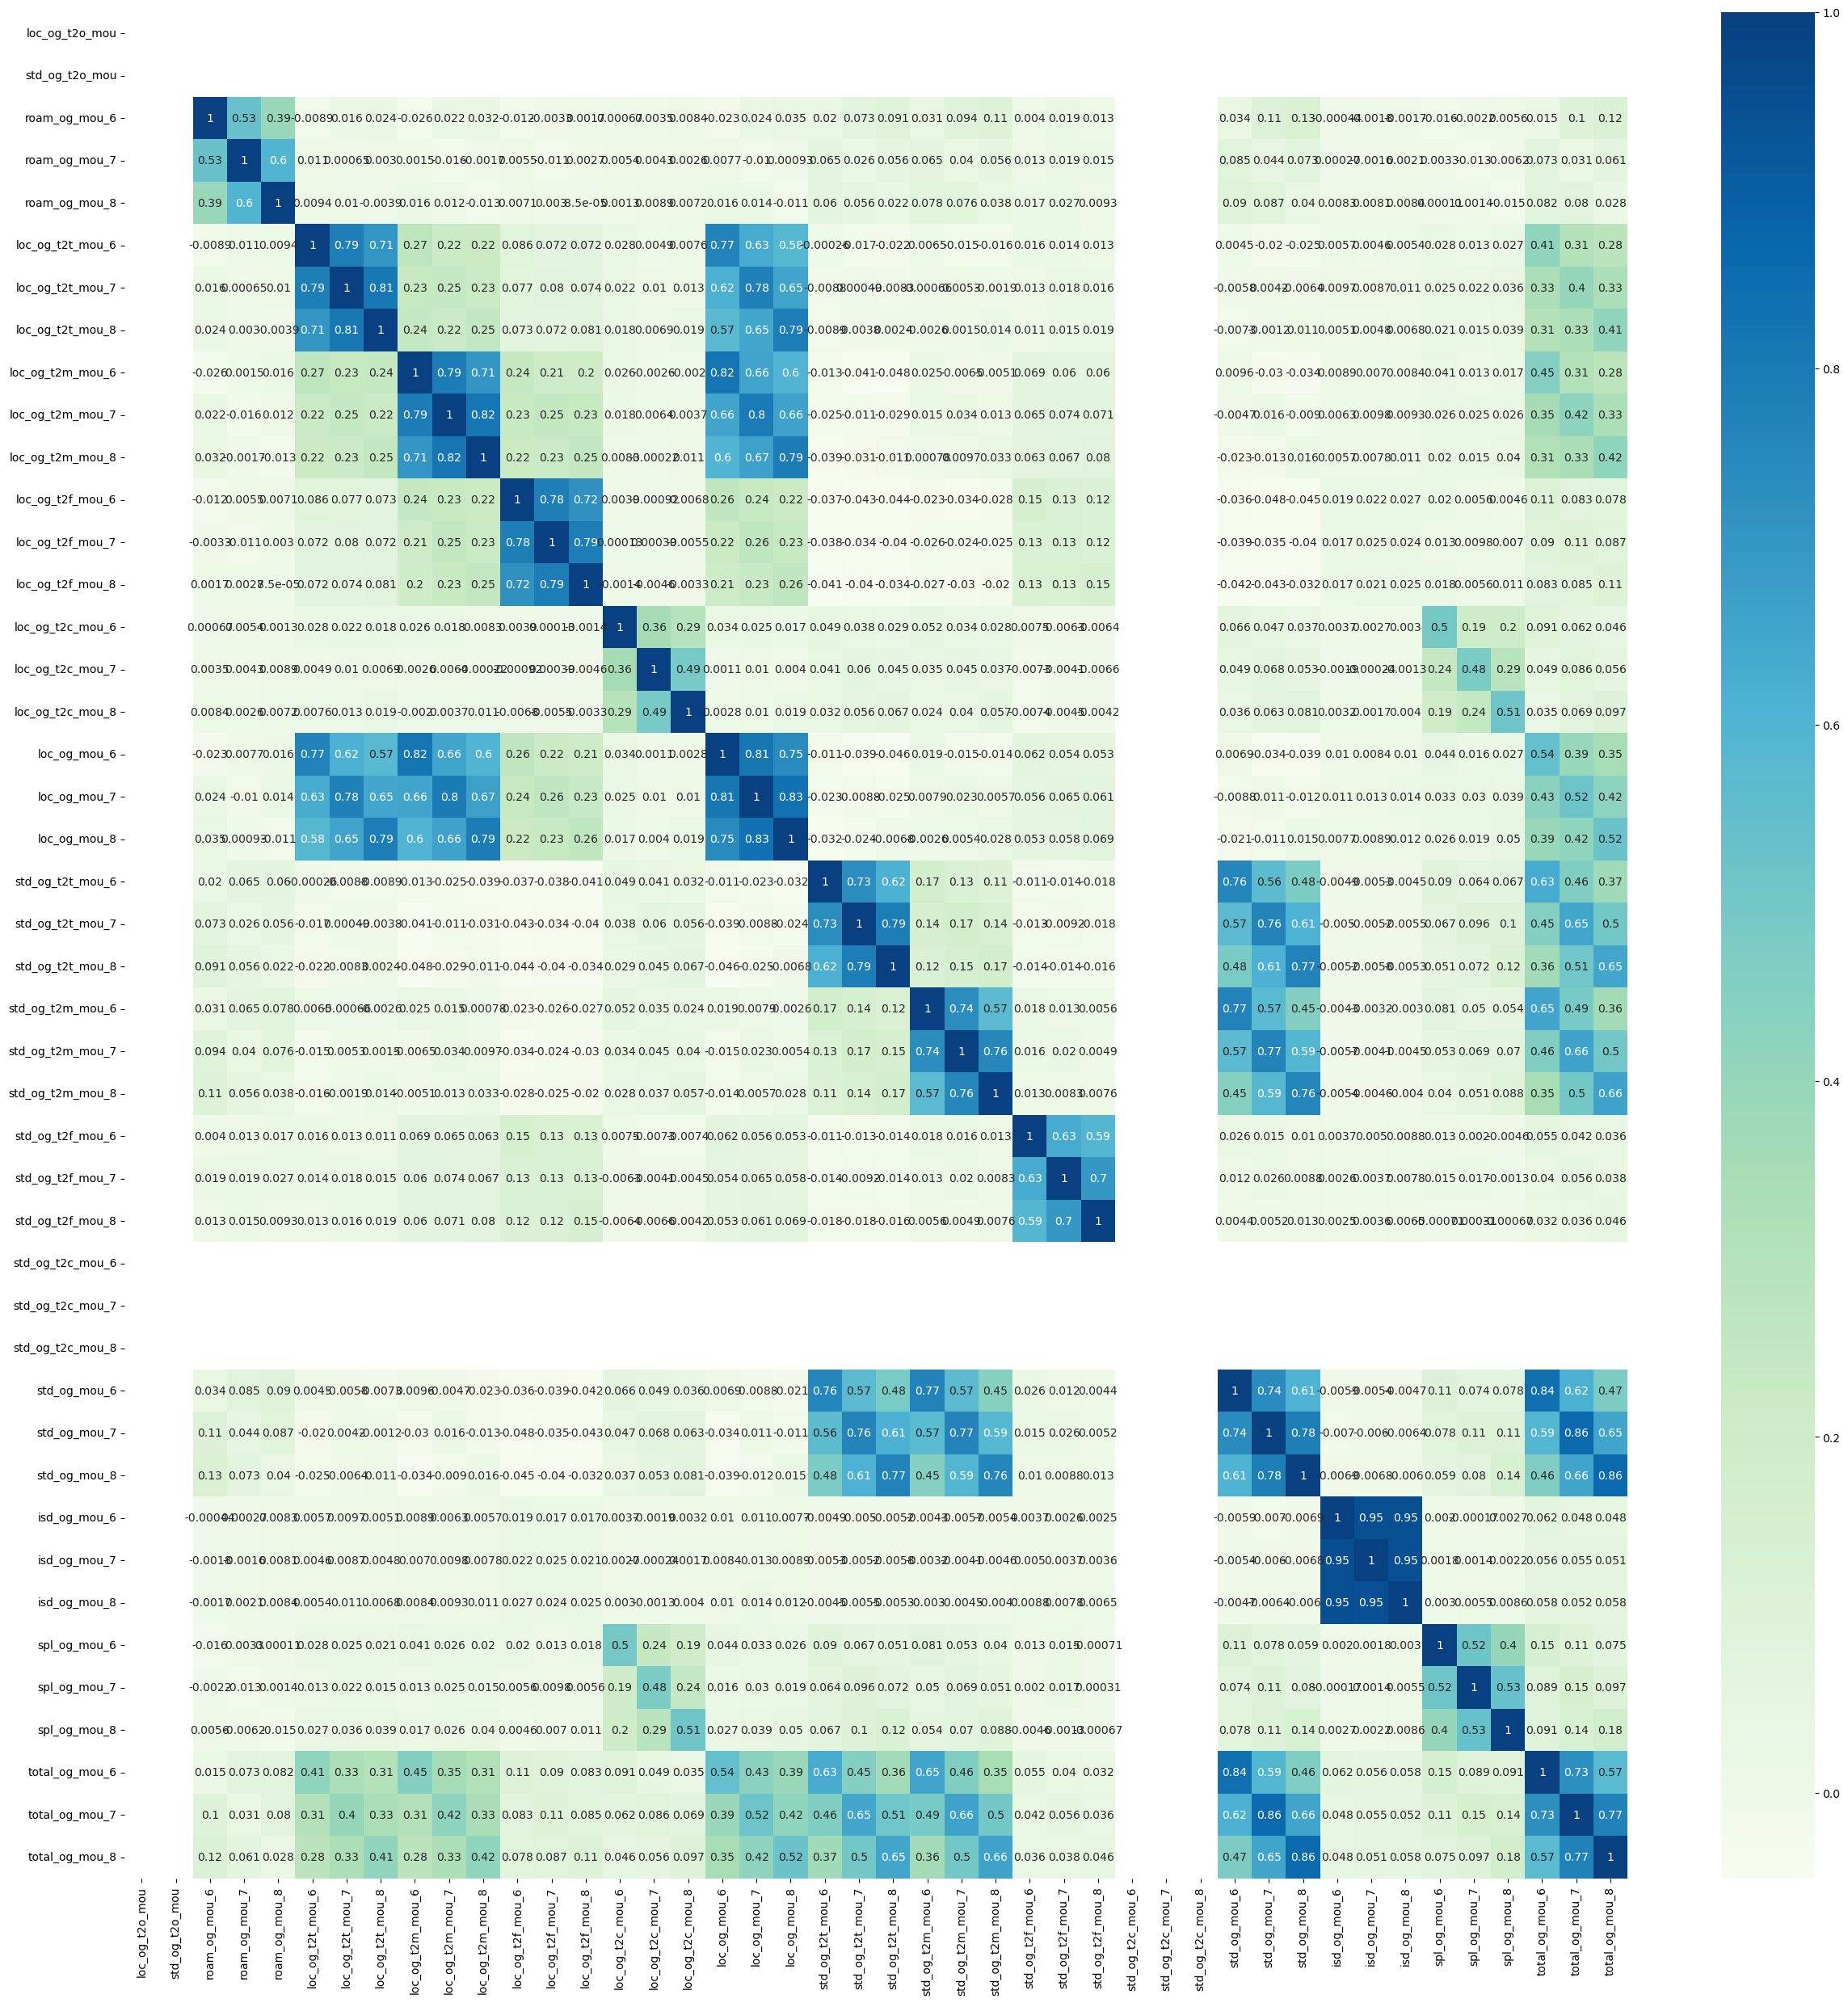

In [131]:
#og_mou_data
plt.figure(figsize=(30,30))
sns.heatmap(og_mou_data.corr(), annot=True, cmap='GnBu')
plt.show()

## **Observations**

A **very high correlation** is observed between the following variables/features:

- **isd_og_mou_7** and **isd_og_mou_6**  
- **isd_og_mou_8** and **isd_og_mou_6**  
- **isd_og_mou_8** and **isd_og_mou_7**  
- **total_og_mou_6** and **std_og_mou_6**  
- **total_og_mou_7** and **std_og_mou_7**  
- **total_og_mou_8** and **std_og_mou_8**  

These strong correlations indicate that these pairs of variables are closely linked, potentially representing overlapping information.


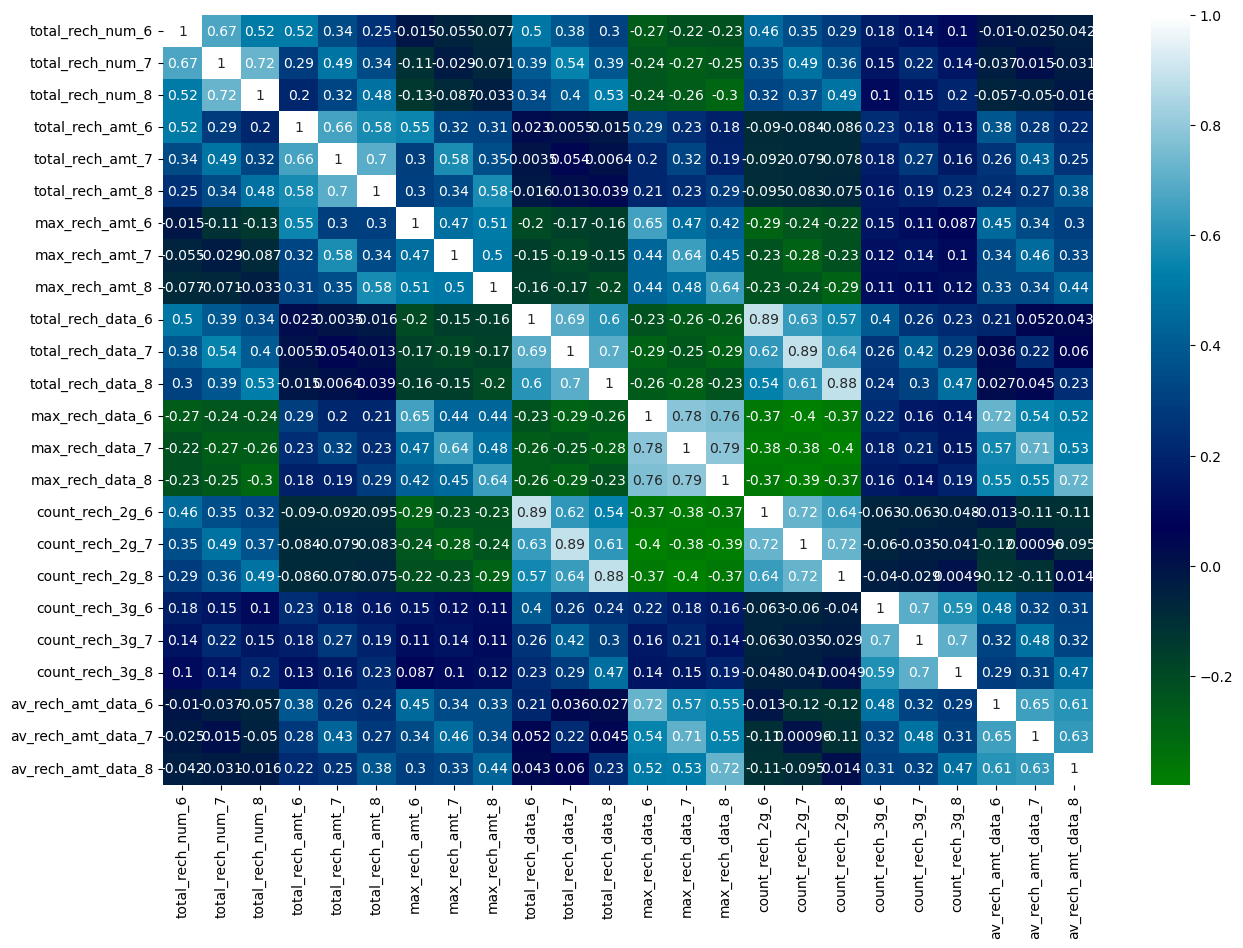

In [134]:
#rech_data
plt.figure(figsize=(15,10))
rech_data_numeric = rech_data.select_dtypes(include=np.number)
sns.heatmap(rech_data_numeric.corr(), annot=True, cmap='ocean')
plt.show()

## **Observations**

- A **notable correlation** is observed between the **average recharge amount** and the **recharge amount** for both **months 6** and **7**.  
- A **significant correlation** of **72%** exists between the **total recharge for month 7** and the **recharge for month 8**.  
- Any factor correlated with **month 8** is likely to have an impact on **churn prediction**.  

These insights emphasize the importance of closely monitoring recharge patterns, especially in the later months, for effective churn prediction strategies.


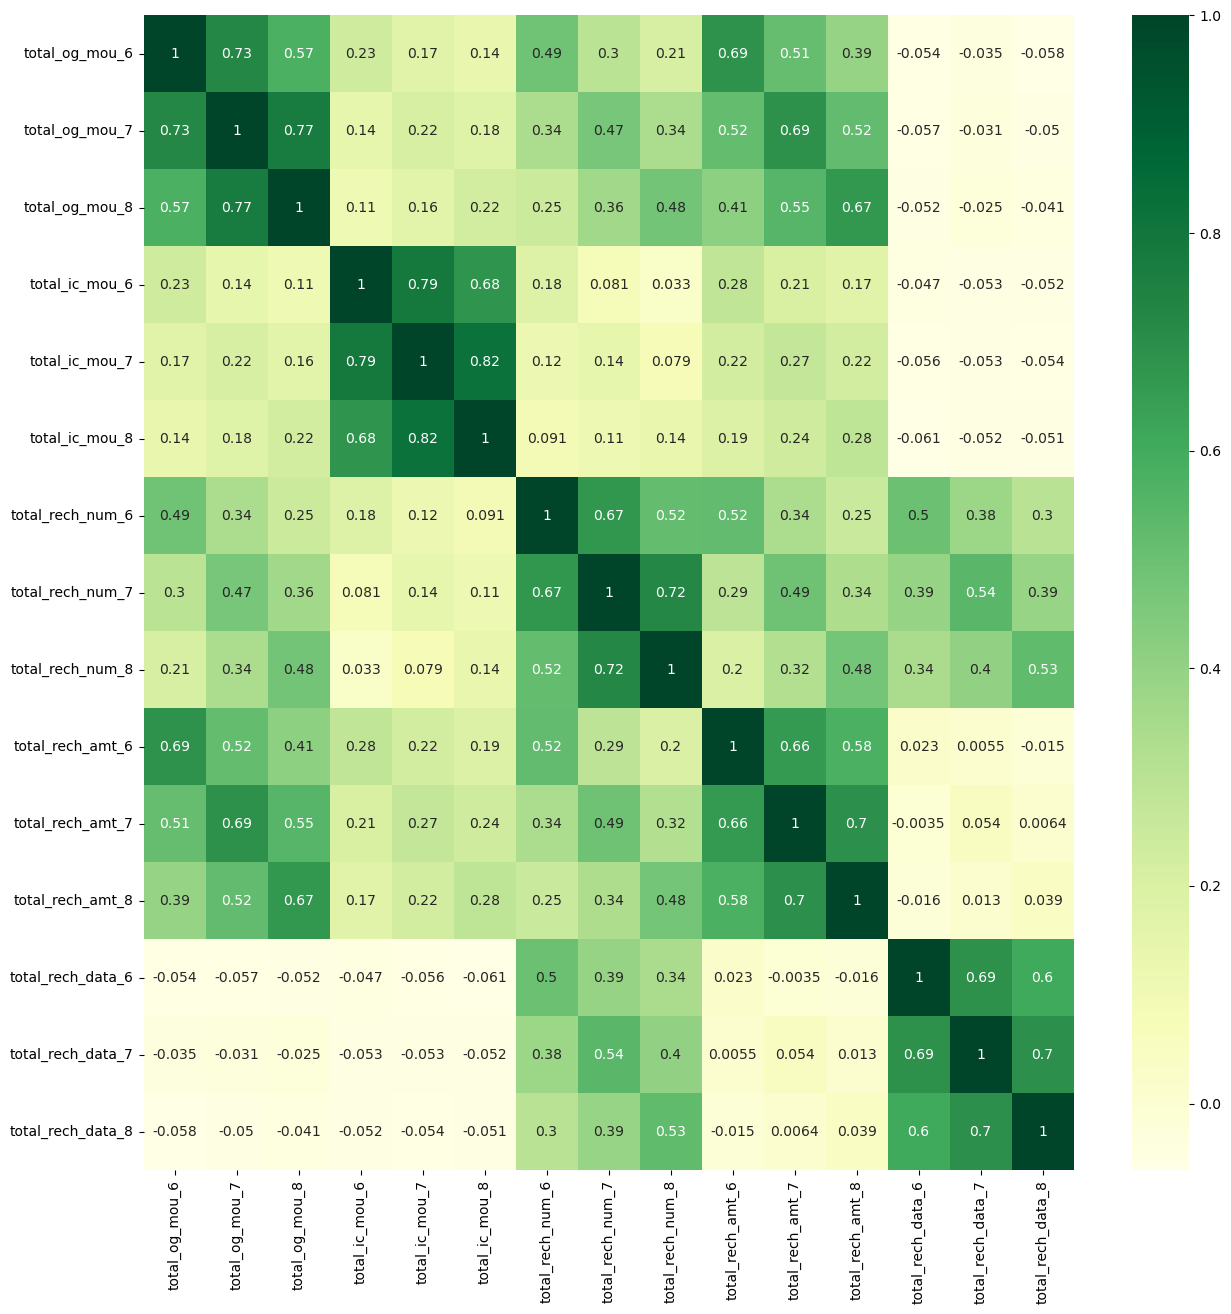

In [141]:
#total_data
plt.figure(figsize=(15,15))
sns.heatmap(total_data.corr(), annot=True, cmap='YlGn')
plt.show()

## **Observations**

- There is a **remarkably high correlation** between the **incoming minutes of usage (82%)** and **outgoing minutes of usage (77%)** in **months 7** and **8**.  
- This correlation suggests that **heavy usage** may indicate that customers are **less likely to churn**.  

These insights highlight that monitoring high-usage patterns can be a valuable indicator for identifying loyal customers.


## **Feature Engineering and Transformation**

### **Key Steps:**

- **Feature Engineering:**  
  - Creating new variables by deriving meaningful insights from existing attributes.  
  - Example: Extracting the **day** from a **date** column to create a new potentially valuable feature.  

- **Variable Transformation:**  
  - **Categorical Variable Transformation:** Converting categorical data into numerical format to make it suitable for model training.  
  - **Numerical Variable Transformation:** Applying scaling techniques like **Standardization** or **Normalization** to ensure numerical features are on a consistent scale.  


## **Feature Engineering for Churn Prediction**

This section focuses on enhancing the dataset by creating new features that provide deeper insights into customer behavior.

### **1. Number of Days Fields**
- Calculates the difference in days between two dates, such as the **last date of the month** and the **last recharge date**.  
- This feature reflects the **recharge frequency** and highlights how recently the customer engaged with the service.

### **2. Trend Variables**
- For consecutive monthly usage variables, this calculates the difference between the **last month's usage** and the **average of the previous two months**.  
- These variables emphasize changes in customer behavior, where a **decline in usage** may signal a potential risk of churn.

By introducing these new features, the model gains improved visibility into customer behavior patterns, enhancing its ability to predict churn effectively.


In [146]:
# Usage columns

# Contains 6,7,8 and does not contain 'date'
col_temp_usage = X_train.columns[X_train.columns.isin(X_train.filter(regex='^(?!.*date)[\s\S]*[678]$'))].tolist()
col_temp_usage

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'to

In [148]:
col_fe_usage_vars = []

df=X_train

for col in col_temp_usage:
    if col.endswith('_6'):
        base_name = col[:-2]  # Remove '_6' to get the base name
        # Calculate the trend variable
        trend_name = f"trend_{base_name}"
        df[trend_name] = df[f"{base_name}_8"] - ((df[f"{base_name}_6"] + df[f"{base_name}_7"]) / 2)
        col_fe_usage_vars.append(trend_name)

# Display the DataFrame with the trend variables
print("Trend variables added:")
print(df[col_fe_usage_vars].shape)

Trend variables added:
(55999, 51)


In [150]:
col_fe_usage_vars

['trend_arpu',
 'trend_onnet_mou',
 'trend_offnet_mou',
 'trend_roam_ic_mou',
 'trend_roam_og_mou',
 'trend_loc_og_t2t_mou',
 'trend_loc_og_t2m_mou',
 'trend_loc_og_t2f_mou',
 'trend_loc_og_t2c_mou',
 'trend_loc_og_mou',
 'trend_std_og_t2t_mou',
 'trend_std_og_t2m_mou',
 'trend_std_og_t2f_mou',
 'trend_std_og_t2c_mou',
 'trend_std_og_mou',
 'trend_isd_og_mou',
 'trend_spl_og_mou',
 'trend_og_others',
 'trend_total_og_mou',
 'trend_loc_ic_t2t_mou',
 'trend_loc_ic_t2m_mou',
 'trend_loc_ic_t2f_mou',
 'trend_loc_ic_mou',
 'trend_std_ic_t2t_mou',
 'trend_std_ic_t2m_mou',
 'trend_std_ic_t2f_mou',
 'trend_std_ic_t2o_mou',
 'trend_std_ic_mou',
 'trend_total_ic_mou',
 'trend_spl_ic_mou',
 'trend_isd_ic_mou',
 'trend_ic_others',
 'trend_total_rech_num',
 'trend_total_rech_amt',
 'trend_max_rech_amt',
 'trend_last_day_rch_amt',
 'trend_total_rech_data',
 'trend_max_rech_data',
 'trend_count_rech_2g',
 'trend_count_rech_3g',
 'trend_av_rech_amt_data',
 'trend_vol_2g_mb',
 'trend_vol_3g_mb',
 'tren

In [152]:
class CustomFeatureEngineering(BaseEstimator, TransformerMixin):
    """
    Custom feature engineering for telecom churn prediction.

    This transformer performs the following operations:

    1. Converts date columns to datetime objects.
    2. Imputes missing values in 'last_date_of_month' columns using the mode.
    3. Calculates the difference in days between recharge dates and the last date of the month.
    4. Creates new features representing these date differences.

    Returns a DataFrame with the new engineered features.
    """

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        X_trans = pd.DataFrame()

        # Convert columns to datetime objects before subtraction
        for col in ['last_date_of_month_6', 'date_of_last_rech_6', 'last_date_of_month_7',
                    'date_of_last_rech_7', 'last_date_of_month_8', 'date_of_last_rech_8',
                    'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']:
            X[col] = pd.to_datetime(X[col], errors='coerce')  # Handle potential errors during conversion

        # Impute last_date_of_month coulms with the most frequent value
        X['last_date_of_month_6'] = X['last_date_of_month_6'].fillna(X['last_date_of_month_6'].mode()[0])
        X['last_date_of_month_7'] = X['last_date_of_month_7'].fillna(X['last_date_of_month_8'].mode()[0])
        X['last_date_of_month_8'] = X['last_date_of_month_7'].fillna(X['last_date_of_month_8'].mode()[0])

        X_trans['date_diff_rech_6'] = (X['last_date_of_month_6'] - X['date_of_last_rech_6']).dt.days
        X_trans['date_diff_rech_7'] = (X['last_date_of_month_7'] - X['date_of_last_rech_7']).dt.days
        X_trans['date_diff_rech_8'] = (X['last_date_of_month_8'] - X['date_of_last_rech_8']).dt.days

        X_trans['date_diff_rech_data_6'] = (X['last_date_of_month_6'] - X['date_of_last_rech_data_6']).dt.days
        X_trans['date_diff_rech_data_7'] = (X['last_date_of_month_7'] - X['date_of_last_rech_data_7']).dt.days
        X_trans['date_diff_rech_data_8'] = (X['last_date_of_month_8'] - X['date_of_last_rech_data_8']).dt.days


        for col in col_temp_usage:
            if col.endswith('_6'):
                base_name = col[:-2]  # Remove '_6' to get the base name
                # Calculate the trend variable
                trend_name = f"trend_{base_name}"
                X_trans[trend_name] = X[f"{base_name}_8"] - ((X[f"{base_name}_6"] + X[f"{base_name}_7"]) / 2)

        return X_trans

    def get_feature_names_out(self, input_features=None):

        return ['date_diff_rech_6', 'date_diff_rech_7', 'date_diff_rech_8', 'date_diff_rech_data_6', 'date_diff_rech_data_7', 'date_diff_rech_data_8'] + col_fe_usage_vars

In [154]:
feature_engineering_pipeline = imbPipeline([
                                  ('fe', CustomFeatureEngineering()),
                                  ('fe_simple_imputer', SimpleImputer(strategy='constant', fill_value=0)),
                                  ])

feature_engineering_pipeline

Pipeline(steps=[('fe', CustomFeatureEngineering()),
                ('fe_simple_imputer',
                 SimpleImputer(fill_value=0, strategy='constant'))])

In [156]:
transformed_data = feature_engineering_pipeline.fit_transform(X_train[col_dates+col_temp_usage])

pd.DataFrame(transformed_data, columns=feature_engineering_pipeline.get_feature_names_out())

date_diff_rech_6  date_diff_rech_7  date_diff_rech_8  \
0                   3.0               6.0              -6.0   
1                   0.0              10.0             -28.0   
2                   1.0               2.0             -10.0   
3                   1.0               8.0             -24.0   
4                   1.0              15.0             -19.0   
...                 ...               ...               ...   
55994               9.0               8.0             -31.0   
55995               0.0              10.0             -28.0   
55996              11.0              16.0             -30.0   
55997               0.0               4.0             -28.0   
55998               2.0               7.0             -26.0   

       date_diff_rech_data_6  date_diff_rech_data_7  date_diff_rech_data_8  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
55994                    0.0                    0.0                    0.0   
55995                    0.0                    0.0                    0.0   
55996                   11.0                   19.0                  -30.0   
55997                    8.0                    4.0                    0.0   
55998                    7.0                    0.0                    0.0   

       trend_arpu  trend_onnet_mou  trend_offnet_mou  trend_roam_ic_mou  ...  \
0         83.2370           31.405           127.175              0.000  ...   
1        -57.2400           -4.360           -47.915              0.000  ...   
2        -34.2815           -9.135           -14.700              0.000  ...   
3          0.3915          -81.055            59.065              0.000  ...   
4       -306.3935            0.000             0.000              0.000  ...   
...           ...              ...               ...                ...  ...   
55994     55.6280         -144.805           -39.500             -2.615  ...   
55995     16.9475           16.720            -0.960              0.000  ...   
55996     75.8240            0.000             0.000              0.000  ...   
55997   -201.1085          -77.320            17.475              0.000  ...   
55998    -11.3890          -19.155            80.380              0.000  ...   

       trend_vol_2g_mb  trend_vol_3g_mb  trend_arpu_3g  trend_arpu_2g  \
0                0.000            0.000           0.00          0.000   
1                0.000            0.000           0.00          0.000   
2                0.000            0.000           0.00          0.000   
3                0.000            0.000           0.00          0.000   
4                0.000            0.000           0.00          0.000   
...                ...              ...            ...            ...   
55994            0.000            0.000           0.00          0.000   
55995            0.000            0.000           0.00          0.000   
55996            9.080          -10.845          76.13         75.335   
55997           -8.385         -666.855           0.00          0.000   
55998          -82.470            0.000           0.00          0.000   

       trend_night_pck_user  trend_monthly_2g  trend_sachet_2g  \
0                       0.0               0.0              0.0   
1                       0.0               0.0              0.0   
2                       0.0               0.0              0.0   
3                       0.0               0.0              0.0   
4                       0.0               0.0              0.0   
...                     ...               ...              ...   
55994        

# Column Transformer

## **Data Preprocessing with `ColumnTransformer`**

This section outlines the implementation of a comprehensive data preprocessing pipeline using **`ColumnTransformer`** from scikit-learn. The pipeline efficiently applies distinct transformations to various subsets of dataset columns.

---

### **Steps in the Preprocessing Pipeline:**

1. **Custom Feature Engineering (`custom_fe`)**
   - Applies the **`feature_engineering_pipeline`** to the **`col_dates`** columns.
   - This pipeline performs specialized feature engineering tasks like calculating date differences to derive new features.

2. **Custom Imputation (`impute_columns_custom`)**
   - Uses **`SimpleImputer`** with `strategy='constant'` and `fill_value=0` on the **`col_custom_impute`** columns.
   - This ensures that missing values in these columns are replaced with **0**.

3. **Generic Imputation (`impute_columns_generic`)**
   - Uses **`SimpleImputer`** with `strategy='constant'` and `fill_value=0` on the **`col_gen_impute`** columns.
   - Similar to custom imputation, this step fills missing values with **0**.

4. **Dropping Columns (`drop_columns`)**
   - Drops unnecessary or irrelevant columns specified in the **`col_drop`** list.

5. **Passing Through Unchanged Columns (`unchanged_cols`)**
   - Columns listed in **`col_unchanged`** are included in the final output without any modification.

---

### **Parameters of `ColumnTransformer`:**

- **`transformers:`**  
   A list of tuples that define each transformation step. Each tuple follows this structure:
   - **Name:** A descriptive label for the transformation (e.g., `'custom_fe'`).
   - **Transformer Object:** The respective transformer pipeline or method (e.g., `feature_engineering_pipeline`).
   - **Columns:** The list of columns that the transformer will act upon (e.g., `col_dates`).

- **`verbose_feature_names_out:`**  
   - If `True`, the transformed feature names will include the transformer name as a prefix for better clarity.

---

### **Usage:**

```python
# Fit the preprocessing pipeline to the training data
preprocessor.fit(X_train)

# Transform the training and test data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [160]:
preprocessor = ColumnTransformer(
    transformers=[
        ('custom_fe', feature_engineering_pipeline, col_dates+col_temp_usage),
        ('impute_columns_custom', SimpleImputer(strategy='constant', fill_value=0), col_custom_impute),
        ('impute_columns_generic', SimpleImputer(strategy='constant', fill_value=0), col_gen_impute),
        ('drop_columns', 'drop', col_drop),
        ('unchanged_cols', 'passthrough', col_unchanged)
    ],
    verbose_feature_names_out=True
)

preprocessor

ColumnTransformer(transformers=[('custom_fe',
                                 Pipeline(steps=[('fe',
                                                  CustomFeatureEngineering()),
                                                 ('fe_simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'))]),
                                 ['last_date_of_month_6',
                                  'last_date_of_month_7',
                                  'last_date_of_month_8', 'date_of_last_rech_6',
                                  'date_of_last_rech_7', 'date_of_last_rech_8',
                                  'date_of_last_rech_data_6',
                                  'date_of_last_rech_d...
                                  'total_rech_amt_7', 'total_rech_amt_8',
                                  'max_rech_amt_6', 'max_rech_amt_7',
                                  'max_rech_amt_8', 'last_day_rch_amt_6',
                                  'last_day_rch_amt_7', 'last_day_rch_amt_8',
                                  'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
                                  'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8',
                                  'monthly_2g_6', 'monthly_2g_7',
                                  'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
                                  'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
                                  'monthly_3g_8', ...])])

In [162]:
preprocessor.fit_transform(X_train)

preprocessor.get_feature_names_out()

array(['custom_fe__date_diff_rech_6', 'custom_fe__date_diff_rech_7',
       'custom_fe__date_diff_rech_8', 'custom_fe__date_diff_rech_data_6',
       'custom_fe__date_diff_rech_data_7',
       'custom_fe__date_diff_rech_data_8', 'custom_fe__trend_arpu',
       'custom_fe__trend_onnet_mou', 'custom_fe__trend_offnet_mou',
       'custom_fe__trend_roam_ic_mou', 'custom_fe__trend_roam_og_mou',
       'custom_fe__trend_loc_og_t2t_mou',
       'custom_fe__trend_loc_og_t2m_mou',
       'custom_fe__trend_loc_og_t2f_mou',
       'custom_fe__trend_loc_og_t2c_mou', 'custom_fe__trend_loc_og_mou',
       'custom_fe__trend_std_og_t2t_mou',
       'custom_fe__trend_std_og_t2m_mou',
       'custom_fe__trend_std_og_t2f_mou',
       'custom_fe__trend_std_og_t2c_mou', 'custom_fe__trend_std_og_mou',
       'custom_fe__trend_isd_og_mou', 'custom_fe__trend_spl_og_mou',
       'custom_fe__trend_og_others', 'custom_fe__trend_total_og_mou',
       'custom_fe__trend_loc_ic_t2t_mou',
       'custom_fe__trend_loc

In [164]:
transformed_data = preprocessor.fit_transform(X_train)

pd.DataFrame(transformed_data, columns=preprocessor.get_feature_names_out())

custom_fe__date_diff_rech_6  custom_fe__date_diff_rech_7  \
0                              3.0                          6.0   
1                              0.0                         10.0   
2                              1.0                          2.0   
3                              1.0                          8.0   
4                              1.0                         15.0   
...                            ...                          ...   
55994                          9.0                          8.0   
55995                          0.0                         10.0   
55996                         11.0                         16.0   
55997                          0.0                          4.0   
55998                          2.0                          7.0   

       custom_fe__date_diff_rech_8  custom_fe__date_diff_rech_data_6  \
0                             -6.0                               0.0   
1                            -28.0                               0.0   
2                            -10.0                               0.0   
3                            -24.0                               0.0   
4                            -19.0                               0.0   
...                            ...                               ...   
55994                        -31.0                               0.0   
55995                        -28.0                               0.0   
55996                        -30.0                              11.0   
55997                        -28.0                               8.0   
55998                        -26.0                               7.0   

       custom_fe__date_diff_rech_data_7  custom_fe__date_diff_rech_data_8  \
0                                   0.0                               0.0   
1                                   0.0                               0.0   
2                                   0.0                               0.0   
3                                   0.0                               0.0   
4                                   0.0                               0.0   
...                                 ...                               ...   
55994                               0.0                               0.0   
55995                               0.0                               0.0   
55996                              19.0                             -30.0   
55997                               4.0                               0.0   
55998                               0.0                               0.0   

       custom_fe__trend_arpu  custom_fe__trend_onnet_mou  \
0                    83.2370                      31.405   
1                   -57.2400                      -4.360   
2                   -34.2815                      -9.135   
3                     0.3915                     -81.055   
4                  -306.3935                       0.000   
...                      ...                         ...   
55994                55.6280                    -144.805   
55995                16.9475                      16.720   
55996                75.8240                       0.000   
55997              -201.1085                     -77.320   
55998               -11.3890                     -19.155   

       custom_fe__trend_offnet_mou  custom_fe__trend_roam_ic_mou  ...  \
0                          127.175                         0.000  ...   
1                          -47.915                         0.000  ...   
2                          -14.700                         0.000  ...   
3                           59.065                         0.000  ...   
4                            0.000                         0.000  ...   
...                            ...                           ...  ...   
55994                      -39.500                        -2.615  ...   
55995                       -0.960                         0.000  ...   
55996                        0.000

# Classification analysis definition

### Define classification_metrics_and_graphs

Define function to calculate and display various classification metrics and graphs for a given model.

In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

def classification_metrics_and_graphs(model, X_train, y_train, X_test, y_test):
    """
    Calculates and displays various classification metrics and graphs for a given model.

    This function evaluates the performance of a classification model by computing
    key metrics such as accuracy, precision, recall, F1-score, ROC AUC, and
    generating visualizations like ROC curve, Precision-Recall curve, and
    confusion matrix.

    Args:
        model: The trained classification model.
        X_train: The training data features.
        y_train: The training data target labels.
        X_test: The test data features.
        y_test: The test data target labels.

    """

    def plot_roc_curve(y_true, y_prob, label):
        fpr, tpr, thresholds = roc_curve(y_true, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')

    def plot_precision_recall_curve(y_true, y_prob, label):
        precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
        plt.plot(recall, precision, label=label)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend()

    print('\n---------------------------------')
    print('Classification Metrics and Graphs')
    print('---------------------------------')

    print("\nData Shape:")
    print("X_train, y_train, X_test, y_test")
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


    #print("\nFeatures: ", "Total= ", len(model.named_steps['preprocessor'].get_feature_names_out()))
    #print(model.named_steps['preprocessor'].get_feature_names_out())


    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Get predicted probabilities (for ROC AUC and PR curves)
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    print("\nClassification Report (Train Set):")
    print(classification_report(y_train, y_train_pred))

    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    if y_train_prob is not None and y_test_prob is not None:
      print("ROC AUC (Train Set):", roc_auc_score(y_train, y_train_prob))
      print("ROC AUC (Test Set):", roc_auc_score(y_test, y_test_prob))
      plt.figure(figsize=(6, 4))
      plot_roc_curve(y_test, y_test_prob, "Test Set")
      plot_roc_curve(y_train, y_train_prob, "Train Set")
      plt.show()

      plt.figure(figsize=(6, 4))
      plot_precision_recall_curve(y_test, y_test_prob, "Test Set")
      plot_precision_recall_curve(y_train, y_train_prob, "Train Set")
      plt.show()

    else:
      print("Probabilities not provided for ROC AUC and PR curves")


    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

### Define model_metrics_at_thresholds

Define function to analyse model sensitivity, specificity and accuracy metrics for various thresholds.

In [168]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def model_metrics_at_thresholds(model, X, y):
    """
    Calculates and plots sensitivity, specificity, and accuracy for each threshold.

    Args:
      model: Trained model.
      X: Features (input data).
      y: True labels.
    """
    # Get predicted probabilities
    y_prob = model.predict_proba(X)[:, 1]

    # Define thresholds to evaluate
    thresholds = np.arange(0.0, 1.1, 0.1)

    # Create an empty list to store metrics (instead of DataFrame)
    metrics_list = []

    # Function to calculate sensitivity, specificity, and accuracy from confusion matrix
    def model_metrics_thres(matrix):
        TN = matrix[0][0]
        TP = matrix[1][1]
        FP = matrix[0][1]
        FN = matrix[1][0]
        accuracy = round((TP + TN) / float(TP + TN + FP + FN), 3)
        sensitivity = round(TP / float(FN + TP), 3)
        specificity = round(TN / float(TN + FP), 3)
        return sensitivity, specificity, accuracy

    # Evaluate for each threshold
    for threshold in thresholds:
        # Convert probabilities to binary predictions based on the threshold
        y_pred_thres = (y_prob >= threshold).astype(int)

        # Generate confusion matrix
        cm = confusion_matrix(y, y_pred_thres)

        # Get sensitivity, specificity, and accuracy for the current threshold
        sensitivity, specificity, accuracy = model_metrics_thres(cm)

        # Append metrics to the list
        metrics_list.append({
            'sensitivity': sensitivity,
            'specificity': specificity,
            'accuracy': accuracy
        })

    # Create a DataFrame from the list
    metrics_df = pd.DataFrame(metrics_list, index=thresholds)


    # Display the metrics DataFrame
    print(metrics_df)

    # Plot the metrics at each threshold
    plt.figure(figsize=(8, 5))

    # Plot sensitivity, specificity, and accuracy as separate lines
    plt.plot(metrics_df.index, metrics_df['sensitivity'], label='Sensitivity', marker='o', color='b')
    plt.plot(metrics_df.index, metrics_df['specificity'], label='Specificity', marker='o', color='g')
    plt.plot(metrics_df.index, metrics_df['accuracy'], label='Accuracy', marker='o', color='orange')

    # Set plot labels and title
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Sensitivity, Specificity, and Accuracy for Each Threshold')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Models and Metrics

Based on the objectives of the case study, we will be creating two sets of models.




## **Objectives and Approach**

### **Objective #2: Identifying Key Predictors of Churn**
- The goal is to pinpoint significant variables that strongly predict customer churn.  
- These variables can reveal underlying reasons why customers may switch to other networks, enabling targeted interventions.

### **Objective #3: Developing Churn Management Strategies**
- Based on identified patterns and insights, we will recommend actionable strategies to mitigate customer churn.  
- These strategies will focus on addressing key pain points and enhancing customer retention.

---

### **Interpretative Models for Insight Generation**
To uncover the factors influencing churn, we will employ **interpretative models** designed to explain customer behavior patterns.

### **Evaluation Metric: F1 Score**
- The **F1 Score** will serve as the primary evaluation metric for these models.  
- Since the F1 score balances **precision** (avoiding false positives) and **recall** (minimizing false negatives), it ensures that the identified insights are both accurate and actionable.

This combined approach ensures data-driven insights that are practical for business decision-making and effective churn management.


**For objective #1 we will create:**
> Objective# 1 It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

**Predictive Models:** These models will predict the likelihood of churn for individual customers.

  - **Accuracy** will be the evaluation metric for predictive models.

***In summary, while F1 score ensures the model is robust and balanced in detecting churn events in interpretative models, accuracy is ideal for predictive models where the goal is to reliably forecast customer churn across both churners and non-churners.***

# Interpretative models | Models for Feature Importance

## **Logistic Regression**

## **Building the First Logistic Regression Model**

To build a robust and effective Logistic Regression model, we will construct a pipeline that streamlines data preparation and model training.

---

### **Pipeline Steps:**

1. **Preprocessing**
   - Handles missing values, categorical encoding, and other data preparation steps before model training.
   - Ensures the data is clean and well-


In [180]:
lr_pipeline1 = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping()),
              ('scaler', StandardScaler()),
              ('lreg_classifier', LogisticRegression())
          ])


lr_pipeline1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'last_day_rch_amt_8',
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping()),
                ('scaler', StandardScaler()),
                ('lreg_classifier', LogisticRegression())])


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 222) (55999,) (14000, 171) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     50289
           1       0.75      0.43      0.55      5710

    accuracy                           0.93     55999
   macro avg       0.85      0.71      0.75     55999
weighted avg       0.92      0.93      0.92     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     12578
           1       0.74      0.44      0.56      1422

    accuracy                           0.93     14000
   macro avg       0.84      0.71      0.76     14000
weighted avg       0.92      0.93      0.92     14000

ROC AUC (Train Set): 0.9010922785738014
ROC AUC (Test Set): 0.9087210853500599


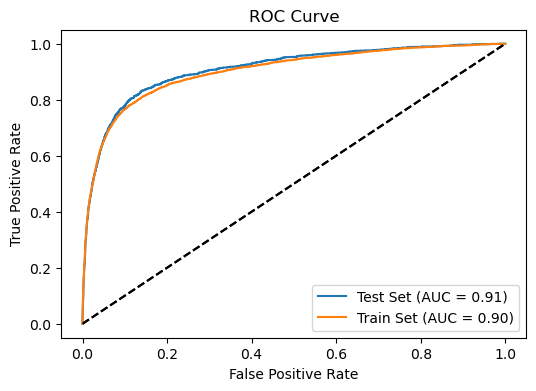

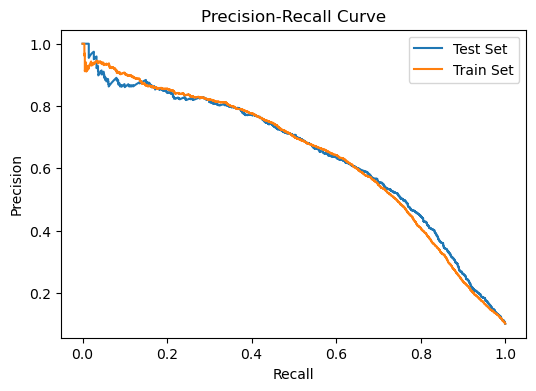

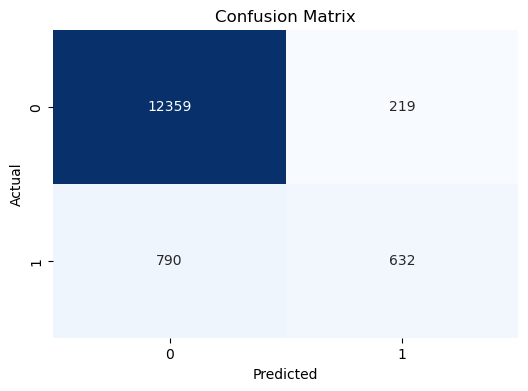

In [182]:
lr_pipeline1.fit(X_train, y_train)

classification_metrics_and_graphs(lr_pipeline1, X_train, y_train, X_test, y_test)

**Imbalanced Data:** The recall for Class 1 is much lower than for Class 0.

This is due to class imbalance, with far fewer samples of Churn (Class 1). The model is performing well on the majority class but struggling to identify the minority class.

## Logistic Regression - with Balanced

## **Addressing Class Imbalance with `class_weight='balanced'`**

In classification tasks with imbalanced datasets — where one class has significantly more samples than the other — models often become biased towards the majority class. As a result, the minority class (which is often the key focus) may be poorly predicted.

`class_weight='balanced'` in Logistic Regression effectively addresses this issue by adjusting class weights during training.

---

### **How Does `class_weight='balanced'` Work?**

🔹 **Automatic Weight Adjustment:**  
   - The model automatically assigns **higher weights** to the minority class and **lower weights** to the majority class.  

🔹 **Inverse Proportionality:**  
   - Class weights are calculated as the inverse of class frequencies in the training data.  
   - The rarer the class, the **higher the assigned weight**.

🔹 **Penalizing Misclassification:**  
   - By giving the minority class more weight, the model is penalized more heavily for misclassifying it.  
   - This encourages the model to better identify patterns in the minority class.

---

### **Benefits of `class_weight='balanced'`**

✅ **Improved Recall for the Minority Class:**  
   - Particularly useful in scenarios where detecting the minority class is critical (e.g., **fraud detection**, **churn prediction**, **medical diagnosis**).

✅ **Balanced Performance:**  
   - Achieves a better trade-off between **precision** and **recall**, improving overall model reliability.

---

### **Conclusion:**

Using `class_weight='balanced'` ensures the model pays closer attention to the under-represented class. This strategy enhances the model’s ability to identify minority class patterns, resulting in a fairer and more effective solution for imbalanced datasets.
 means the rarer a class is, the more weight it receives.
- Penalizing Misclassification: By weighting the minority class more heavily, the model is penalized more for misclassifying it. This encourages the model to learn its patterns better and make more informed predictions.

Benefits:

- Improved Recall for Minority Class: This weighting scheme typically improves the model's recall (sensitivity) for the minority class, crucial when identifying it is important (e.g., fraud detection, medical diagnosis).
- Balanced Performance: It promotes a better balance between precision and recall, leading to a more robust and reliable model overall.

In essence, class_weight='balanced' tells the model to pay more attention to the under-represented class, ensuring it isn't overshadowed by the majority class during training. This leads to a fairer and more effective classification model for imbalanced datasets.

***Update pipeline with class_weight='balanced' in Logistic Regression classifier.***

In [189]:
lr_pipeline2 = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping()),
              ('scaler', StandardScaler()),
              ('lreg_classifier', LogisticRegression(class_weight='balanced'))
          ])


lr_pipeline2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping()),
                ('scaler', StandardScaler()),
                ('lreg_classifier',
                 LogisticRegression(class_weight='balanced'))])


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 222) (55999,) (14000, 171) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     50289
           1       0.35      0.84      0.49      5710

    accuracy                           0.82     55999
   macro avg       0.66      0.83      0.69     55999
weighted avg       0.91      0.82      0.85     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     12578
           1       0.35      0.86      0.50      1422

    accuracy                           0.83     14000
   macro avg       0.67      0.84      0.70     14000
weighted avg       0.92      0.83      0.85     14000

ROC AUC (Train Set): 0.9025056887477595
ROC AUC (Test Set): 0.9079878268465534


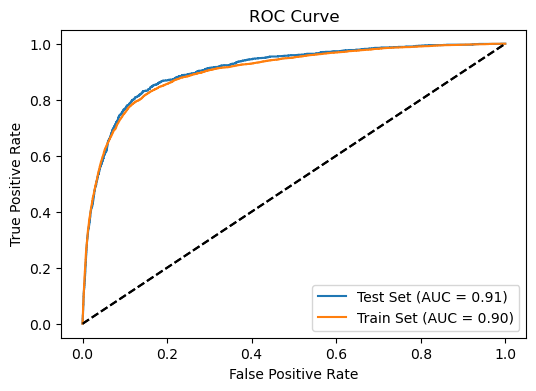

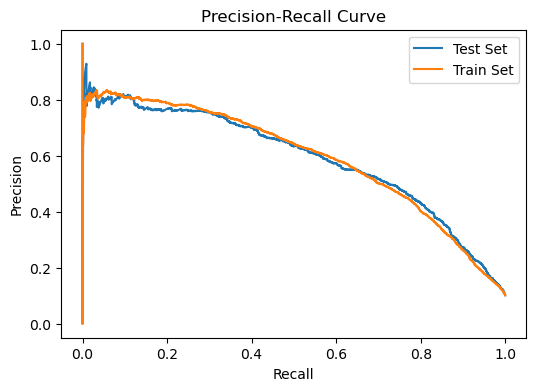

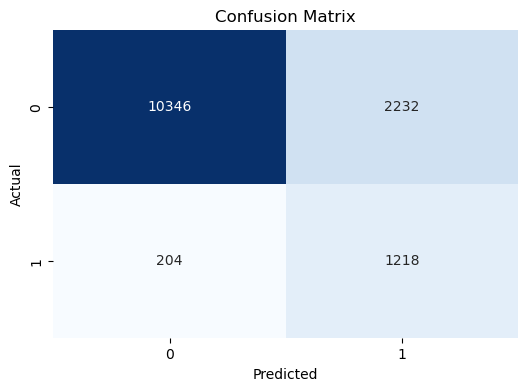

In [191]:
lr_pipeline2.fit(X_train, y_train)

classification_metrics_and_graphs(lr_pipeline2, X_train, y_train, X_test, y_test)

## **Model Performance Analysis with `class_weight='balanced'`**

### **Key Observations:**

🔹 **Improved Recall for Class 1 (Minority Class):**  
- Recall for Class 1 has increased significantly from **0.43** to **0.84**.  
- This improvement stems from the `class_weight='balanced'` parameter, which compensates for class imbalance by assigning higher importance to the minority class.

🔹 **Precision for Class 1 Remains Low:**  
- Precision remains at **0.34** for both training and testing data.  
- While the model now correctly identifies more instances of Class 1 (thanks to improved recall), it still produces a relatively high number of **false positives**.

🔹 **Reduced Recall for Class 0 (Majority Class):**  
- Recall for Class 0 has decreased from **0.98** to **0.82**.  
- This decline occurs because the model now emphasizes the minority class, slightly compromising its ability to correctly predict the majority class.

---

### **Conclusion:**
The `class_weight='balanced'` parameter significantly improves the model’s ability to detect the minority class. However, this comes at the cost of reduced precision and recall for the majority class. Further tuning may be required to optimize this trade-off depending on business objectives.


### **Recursive Feature Elimination (RFE)**

Now let us perfrom RFE and find the most relevant features.

***Create pipleline to process data and apply RFE and analyse results.***

In [196]:
rfe_pipeline = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping()),
              ('scaler', StandardScaler()),
              ('rfe', RFE(estimator=LogisticRegression(class_weight='balanced')))
          ])

rfe_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping()),
                ('scaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(class_weight='balanced')))])

In [198]:
rfe_pipeline.fit(X_train, y_train)

df = pd.DataFrame({
    'Feature': rfe_pipeline.named_steps['preprocessor'].get_feature_names_out(),
    'Ranking': rfe_pipeline.named_steps['rfe'].ranking_,
    'Support': rfe_pipeline.named_steps['rfe'].support_
})

df

Feature  Ranking  Support
0         custom_fe__date_diff_rech_6        2    False
1         custom_fe__date_diff_rech_7        1     True
2         custom_fe__date_diff_rech_8        1     True
3    custom_fe__date_diff_rech_data_6       14    False
4    custom_fe__date_diff_rech_data_7       13    False
..                                ...      ...      ...
176       unchanged_cols__sachet_3g_8       19    False
177               unchanged_cols__aon        1     True
178        unchanged_cols__aug_vbc_3g       89    False
179        unchanged_cols__jul_vbc_3g       90    False
180        unchanged_cols__jun_vbc_3g       91    False

[181 rows x 3 columns]

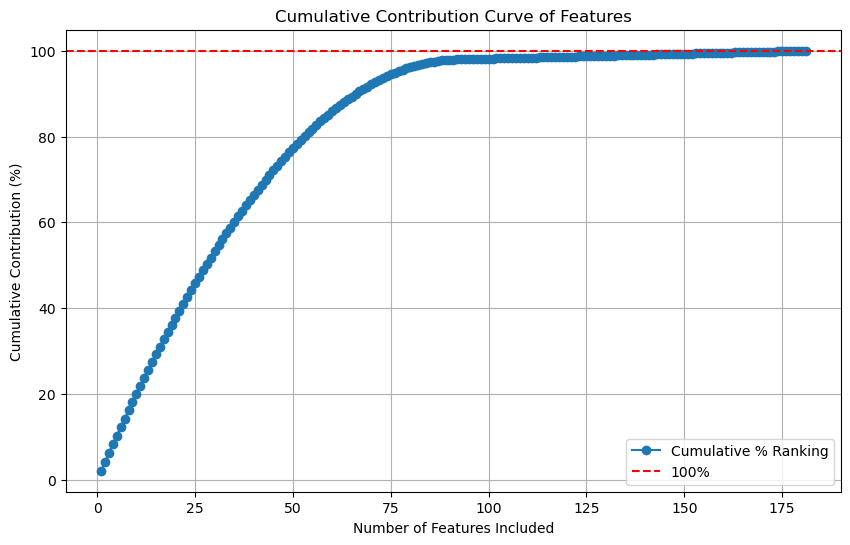

In [200]:
# Sort the features based on their ranking
df_sorted = df.sort_values(by='Ranking', ascending=False)

# Create a cumulative sum of rankings (or use support values for another perspective)
cumulative_ranking = np.cumsum(df_sorted['Ranking'])

# Normalize to make it cumulative percentage
cumulative_percentage = cumulative_ranking / cumulative_ranking.max() * 100

# Plot the cumulative curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_percentage) + 1), cumulative_percentage, marker='o', label='Cumulative % Ranking')
plt.axhline(100, color='r', linestyle='--', label='100%')
plt.title('Cumulative Contribution Curve of Features')
plt.xlabel('Number of Features Included')
plt.ylabel('Cumulative Contribution (%)')
plt.legend()
plt.grid()
plt.show()

## **Optimal Feature Selection Using RFE**

### **Key Insights from the Graph:**
- The graph highlights that a smaller subset of features — approximately **75 to 100** — effectively retains most of the model's predictive power.
- Features exceeding this range provide minimal additional value and can be excluded without significant performance loss.

### **Conclusion:**
- Selecting **75 features** appears to be the optimal choice for Recursive Feature Elimination (RFE).

### **Why Choose 75 Features?**
✅ Ensures the model captures essential predictive power.  
✅ Reduces noise by removing less informative features.  
✅ Balances model complexity and performance, improving generalization.  


### with RFE and Balanced

Now let us create Logictic regression model with RFE.

***Adding RFE step to pipeline and select 75 Features***

In [204]:
lr_pipeline3 = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping()),
              ('scaler', StandardScaler()),
              ('rfe', RFE(estimator=LogisticRegression(class_weight='balanced'), n_features_to_select=75)),
              ('lreg_classifier', LogisticRegression(class_weight='balanced'))
          ])


lr_pipeline3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping()),
                ('scaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(class_weight='balanced'),
                     n_features_to_select=75)),
                ('lreg_classifier',
                 LogisticRegression(class_weight='balanced'))])


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 222) (55999,) (14000, 171) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     50289
           1       0.35      0.84      0.49      5710

    accuracy                           0.82     55999
   macro avg       0.66      0.83      0.69     55999
weighted avg       0.91      0.82      0.85     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.90     12578
           1       0.35      0.86      0.50      1422

    accuracy                           0.83     14000
   macro avg       0.67      0.84      0.70     14000
weighted avg       0.92      0.83      0.86     14000

ROC AUC (Train Set): 0.902320245722282
ROC AUC (Test Set): 0.90756693702464


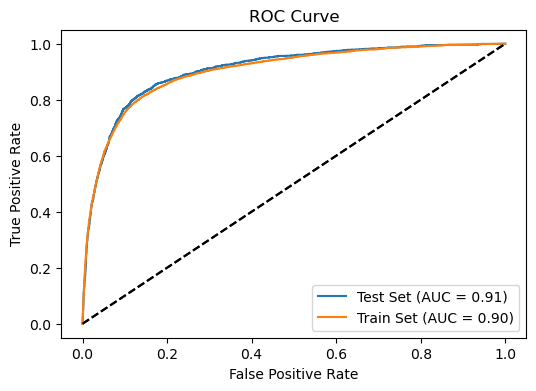

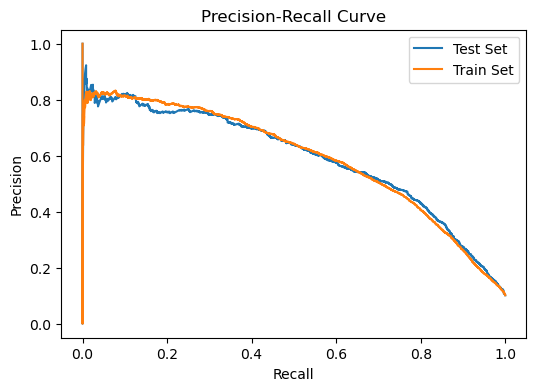

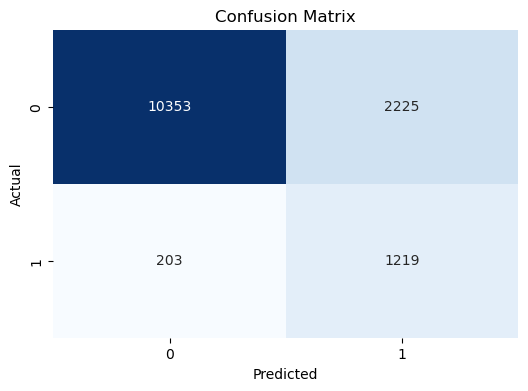

In [206]:
lr_pipeline3.fit(X_train, y_train)

classification_metrics_and_graphs(lr_pipeline3, X_train, y_train, X_test, y_test)

### **Model Performance with Reduced Feature Set (75 Features)**

### **Observations:**
- The reduced feature set with **75 features** successfully retains sufficient predictive power.
  - Key performance metrics such as **accuracy**, **recall**, and **ROC AUC** remain comparable to the earlier model that used **222 features**.
- The **class_weight='balanced'** parameter continues to enhance recall for the minority class, ensuring improved identification of churn cases.
- However, **precision for Class 1** remains low, reflecting a trade-off between recall and precision.

### **Key Takeaways:**
✅ The reduced feature set simplifies the model without compromising performance.  
✅ The improved recall ensures that more instances of the minority class are correctly identified.  
⚠️ The low precision indicates a need for additional strategies to minimize false positives, such as tuning decision thresholds or exploring alternative models.


### with SMOTE

### **Handling Class Imbalance with SMOTE**

This section addresses the class imbalance issue by applying the **Synthetic Minority Over-sampling Technique (SMOTE)**.

---

### **What is SMOTE?**

SMOTE is an oversampling technique that combats class imbalance by creating synthetic samples for the minority class. Here's how it works:

1. **Identifying Nearest Neighbors:**  
   - For each minority class instance, SMOTE identifies its **k-nearest neighbors** (other instances from the minority class).

2. **Creating Synthetic Instances:**  
   - New samples are generated by interpolating between the chosen instance and one of its nearest neighbors.  
   - This interpolation creates a new point somewhere along the line segment connecting the two points, effectively generating realistic synthetic data.

---

### **How SMOTE Helps:**

✅ **Increases Minority Class Representation:** SMOTE boosts the number of minority class samples, balancing the dataset.  
✅ **Prevents Model Bias:** By improving class balance, SMOTE reduces the model's tendency to favor the majority class.  
✅ **Improved Minority Class Performance:** SMOTE enhances the model’s ability to detect minority class patterns, improving metrics such as **recall** and **F1 score**.

---

### **Key Benefit:**
SMOTE effectively addresses class imbalance without simply duplicating existing data. By generating realistic synthetic data points, it helps create a more balanced and robust model.


Let us look at how the classes look before and after applying SMOTE.

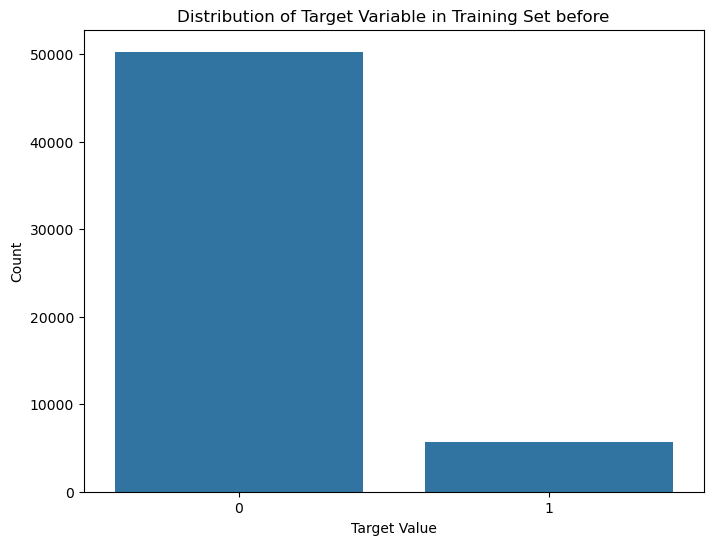

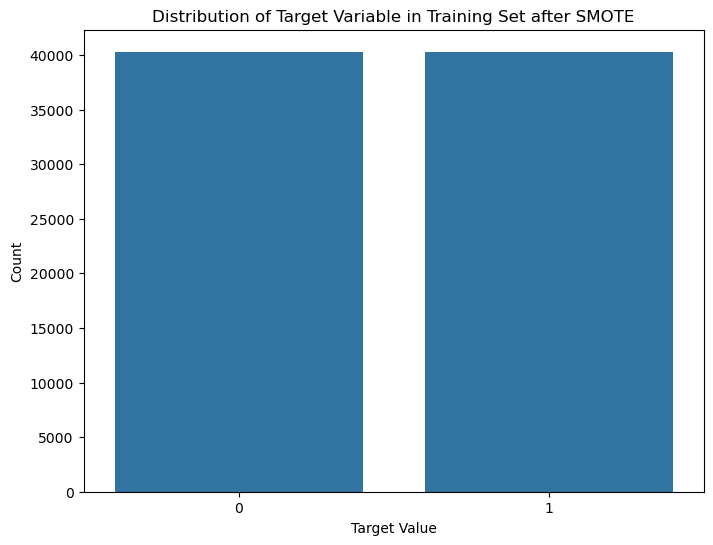

In [210]:
# Count the occurrences of each target value
target_counts = y_train.value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.xlabel("Target Value")
plt.ylabel("Count")
plt.title("Distribution of Target Variable in Training Set before")
plt.show()


# Perform SMOTE

# Convert preprocessor output to DataFrame with appropriate columns
transformed_X_train = pd.DataFrame(preprocessor.transform(X_train), columns=preprocessor.get_feature_names_out())

# Now, concatenate the transformed data with y_train
temp_df1 = pd.concat([transformed_X_train, y_train], join='inner', axis=1)

# Continue with the rest of your code
temp_df2 = SMOTE(random_state=42).fit_resample(temp_df1.drop(columns=['churn_probability']), temp_df1['churn_probability'])

#X_train_temp = temp_df2[0]
y_train_temp = temp_df2[1]

# Count the occurrences of each target value
target_counts = y_train_temp.value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.xlabel("Target Value")
plt.ylabel("Count")
plt.title("Distribution of Target Variable in Training Set after SMOTE")
plt.show()

We can see that synthetic minority oversamping has resulted in balanced classes.

Now let us build Logistic regression classifier with SMOTE.

***Addding SMOTE step to pipeline.***

In [212]:
lr_pipeline4 = imbPipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping()),
              ('scaler', StandardScaler()),
              ('rfe', RFE(estimator=LogisticRegression(class_weight='balanced'), n_features_to_select=75)),
              ('smote', SMOTE()),
              ('lreg_classifier', LogisticRegression(class_weight='balanced'))
          ])


lr_pipeline4

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping()),
                ('scaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(class_weight='balanced'),
                     n_features_to_select=75)),
                ('smote', SMOTE()),
                ('lreg_classifier',
                 LogisticRegression(class_weight='balanced'))])


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 222) (55999,) (14000, 171) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     50289
           1       0.36      0.83      0.50      5710

    accuracy                           0.83     55999
   macro avg       0.67      0.83      0.70     55999
weighted avg       0.91      0.83      0.86     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     12578
           1       0.36      0.85      0.50      1422

    accuracy                           0.83     14000
   macro avg       0.67      0.84      0.70     14000
weighted avg       0.92      0.83      0.86     14000

ROC AUC (Train Set): 0.9021767946592686
ROC AUC (Test Set): 0.9066280977725715


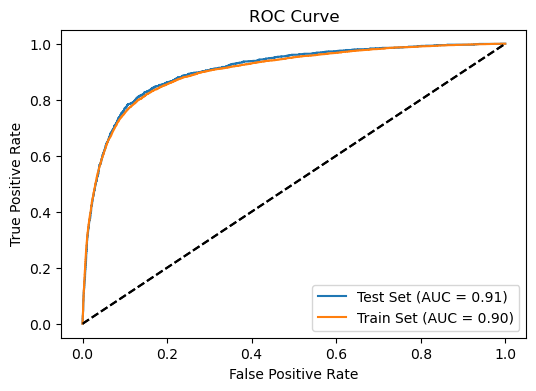

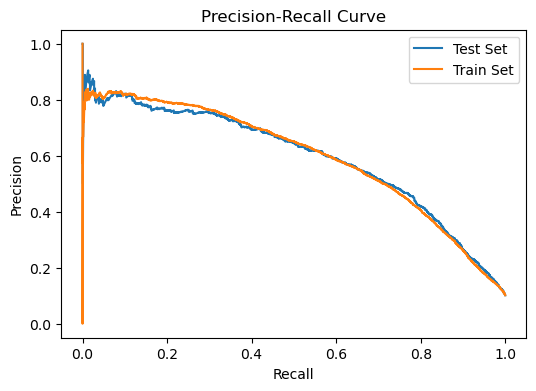

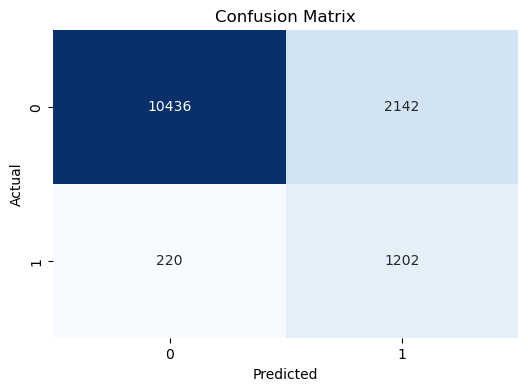

In [214]:
lr_pipeline4.fit(X_train, y_train)

classification_metrics_and_graphs(lr_pipeline4, X_train, y_train, X_test, y_test)

### **Model Performance Analysis After Applying SMOTE**

Following the application of **SMOTE**, the model's performance was evaluated, revealing the following insights:

---

### **Key Observations:**

✅ **Improved Recall for Class 1 (Minority Class):**  
- Recall increased significantly to **83%** in the training set and **84%** in the test set.  
- This improvement reflects the model's enhanced ability to identify true churn cases, which is crucial in churn prediction.

⚠️ **Low Precision for Class 1:**  
- Precision for Class 1 remains low at **36%**.  
- Despite better recall, the model still struggles with **false positives**, indicating that some non-churn customers are incorrectly predicted as churners.

✅ **Consistent Accuracy and Weighted Metrics:**  
- Accuracy remains at **83%**, indicating that SMOTE did not compromise performance on the majority class.  
- Weighted metrics like the **F1 score** and **precision-recall balance** stayed consistent with previous models.

✅ **Strong ROC AUC Scores:**  
- The ROC AUC values are **0.902** (training) and **0.907** (test), showcasing strong class separation.  
- The slight drop compared to earlier pipelines may indicate some overlap between the synthetic minority samples and the majority class.

---

### **Conclusion:**
SMOTE effectively improved recall for the minority class without compromising the model’s overall performance. While precision challenges persist, the improved recall significantly enhances the model's ability to capture churners — a key objective in churn prediction scenarios.


### Grid Search

### Model Selection and Hyperparameter Tuning

- The **RFE + Balanced** approach has demonstrated comparable performance to the model that included **SMOTE**.  
- Given this consistency, we will proceed with the **RFE + Balanced** model for further improvements.

### Next Step: Hyperparameter Tuning
- Data will be processed using the **RFE Pipeline**, followed by performing **GridSearchCV** to identify the optimal hyperparameters for improved model performance.


Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Best score: 0.4915619924805716

---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 90) (55999,) (14000, 90) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     50289
           1       0.35      0.84      0.49      5710

    accuracy                           0.82     55999
   macro avg       0.66      0.83      0.69     55999
weighted avg       0.91      0.82      0.85     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     12578
           1       0.35      0.86      0.50      1422

    accuracy                           0.83     14000
   macro avg       0.67      0.84      0.70     1

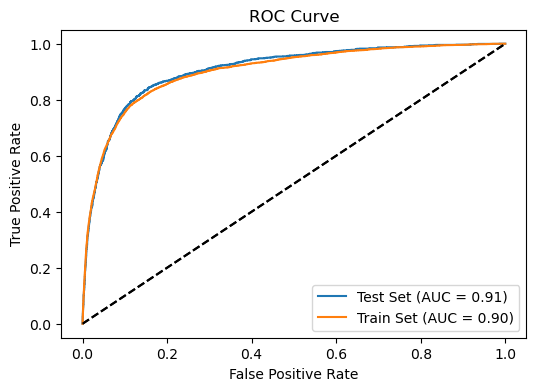

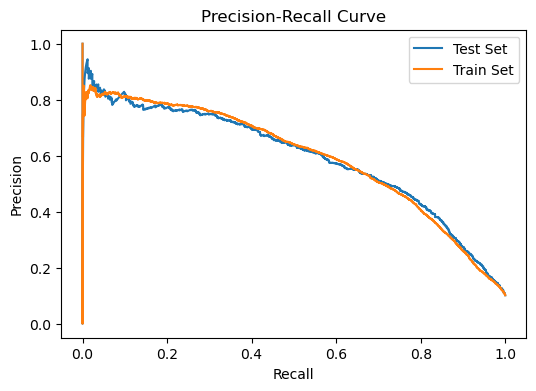

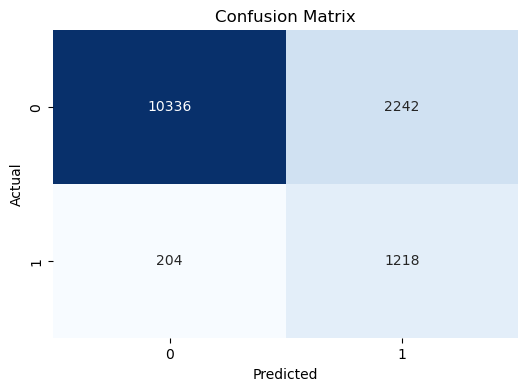

In [218]:
# Define the parameter grid for GridSearchCV
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

X_train_rfe = rfe_pipeline.transform(X_train)
X_test_rfe = rfe_pipeline.transform(X_test)

# Create GridSearchCV object
grid_search_lr = GridSearchCV(LogisticRegression(class_weight='balanced'),
                              param_grid_lr, cv=5, scoring='f1', n_jobs=-1, verbose=3)

# Fit the GridSearchCV object to the training data
grid_search_lr.fit(X_train_rfe, y_train)

# Print the best hyperparameters and the best score
print("\nBest hyperparameters:", grid_search_lr.best_params_)
print("Best score:", grid_search_lr.best_score_)


# Evaluate the best model on the test set
best_lr_model = grid_search_lr.best_estimator_
classification_metrics_and_graphs(best_lr_model, X_train_rfe, y_train, X_test_rfe, y_test)

**Best hyperparameters:** {'C': 0.01, 'penalty': 'l2'}

**Best score:** 0.4915619924805716

## Final Logistic RegressionPipeline for Feature Importance

In [220]:
lr_pipeline_final = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping()),
              ('scaler', StandardScaler()),
              ('rfe', RFE(estimator=LogisticRegression(class_weight='balanced'), n_features_to_select=65)),
              ('lreg_classifier', LogisticRegression(class_weight='balanced',
                                                     C=0.01,        # Hyperparameters from grid search
                                                     penalty='l2'))
          ])


lr_pipeline_final

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping()),
                ('scaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(class_weight='balanced'),
                     n_features_to_select=65)),
                ('lreg_classifier',
                 LogisticRegression(C=0.01, class_weight='balanced'))])


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 222) (55999,) (14000, 171) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     50289
           1       0.35      0.84      0.49      5710

    accuracy                           0.82     55999
   macro avg       0.66      0.83      0.69     55999
weighted avg       0.91      0.82      0.85     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     12578
           1       0.35      0.85      0.50      1422

    accuracy                           0.83     14000
   macro avg       0.67      0.84      0.70     14000
weighted avg       0.92      0.83      0.85     14000

ROC AUC (Train Set): 0.901977254481357
ROC AUC (Test Set): 0.9073218838777952


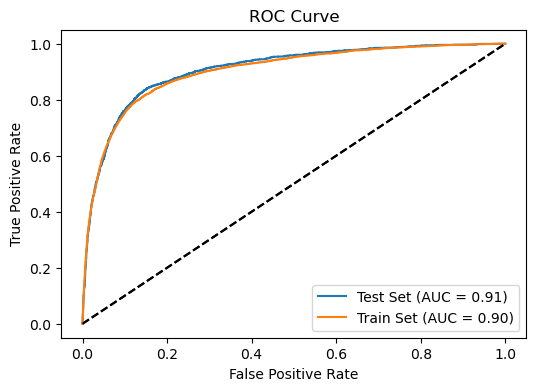

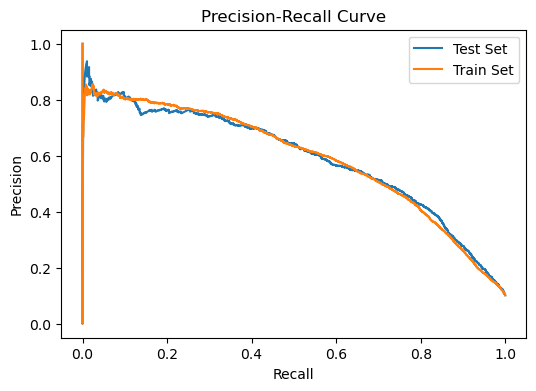

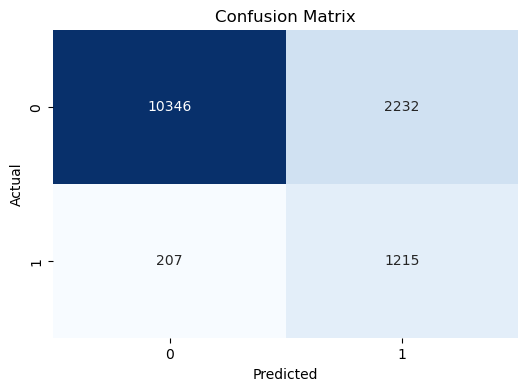

In [222]:
lr_pipeline_final.fit(X_train, y_train)

classification_metrics_and_graphs(lr_pipeline_final, X_train, y_train, X_test, y_test)

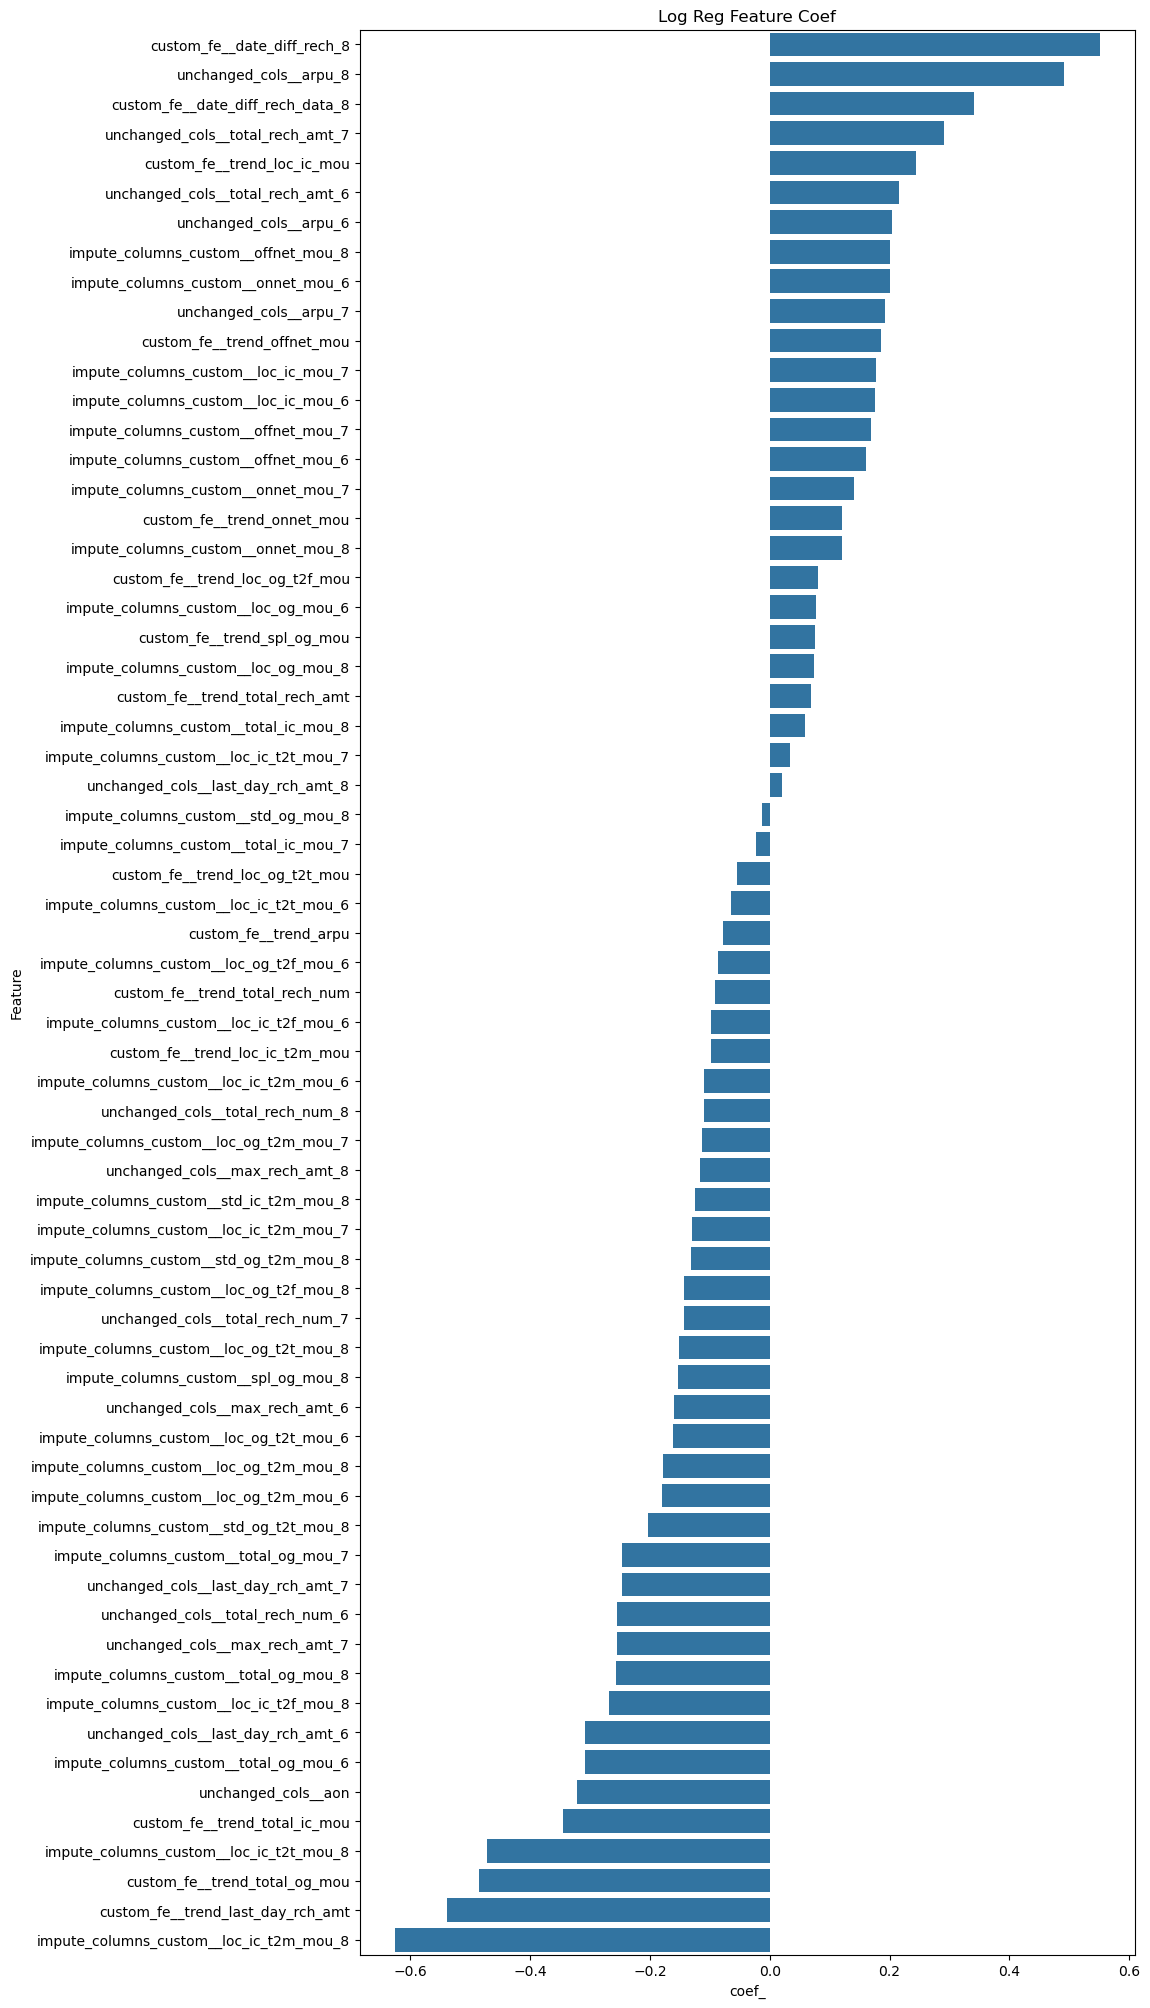

In [224]:
lr_feature_importance = pd.DataFrame({
                        'Feature': lr_pipeline_final.named_steps['preprocessor'].get_feature_names_out()[lr_pipeline_final.named_steps['rfe'].get_support()],
                        'coef_': lr_pipeline_final.named_steps['lreg_classifier'].coef_[0]
                    })
lr_feature_importance = lr_feature_importance.sort_values(by='coef_', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 25))
sns.barplot(x='coef_', y='Feature', data=lr_feature_importance)
plt.title('Log Reg Feature Coef')
plt.xlabel('coef_')
plt.ylabel('Feature')
plt.show()

     sensitivity  specificity  accuracy
0.0        1.000        0.000     0.102
0.1        0.973        0.372     0.433
0.2        0.943        0.543     0.583
0.3        0.916        0.660     0.686
0.4        0.882        0.751     0.765
0.5        0.842        0.821     0.823
0.6        0.791        0.877     0.868
0.7        0.703        0.921     0.899
0.8        0.565        0.958     0.918
0.9        0.340        0.986     0.920
1.0        0.000        1.000     0.898


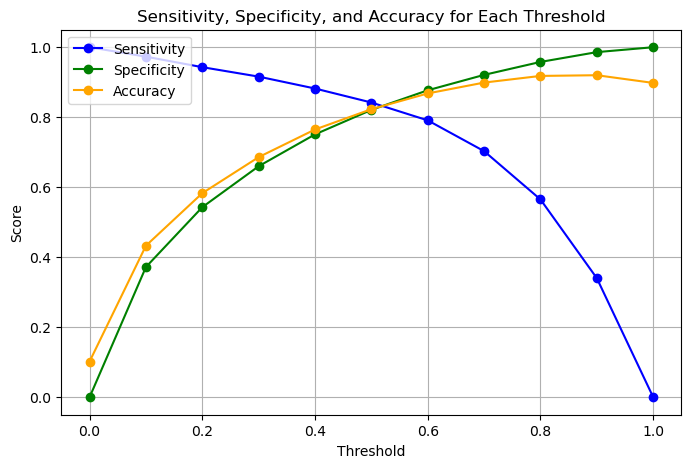

In [226]:
model_metrics_at_thresholds(lr_pipeline_final, X_train, y_train)

### Threshold Analysis Observations

- **Low Thresholds:**  
  - **Sensitivity** is high, but **Specificity** is low.  
  - The model tends to classify many instances as positive, effectively capturing most true positives but also increasing false positives.

- **High Thresholds:**  
  - **Specificity** is high, but **Sensitivity** is low.  
  - The model becomes more conservative in predicting positives, reducing false positives but missing more true positives (increasing false negatives).

- **Optimal Threshold:**  
  - The ideal threshold is where **accuracy** is maximized, achieving a balance between **sensitivity** and **specificity**.  
  - Based on the graph, this optimal threshold appears to be around **0.6 to 0.8**.


## Random Forrest

In [229]:
rf_pipeline = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping()),
              ('scaler', StandardScaler()),
              ('rf_classifier', RandomForestClassifier(class_weight='balanced'))
          ])


rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping()),
                ('scaler', StandardScaler()),
                ('rf_classifier',
                 RandomForestClassifier(class_weight='balanced'))])


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 222) (55999,) (14000, 171) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50289
           1       1.00      1.00      1.00      5710

    accuracy                           1.00     55999
   macro avg       1.00      1.00      1.00     55999
weighted avg       1.00      1.00      1.00     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     12578
           1       0.79      0.58      0.67      1422

    accuracy                           0.94     14000
   macro avg       0.87      0.78      0.82     14000
weighted avg       0.94      0.94      0.94     14000

ROC AUC (Train Set): 1.0
ROC AUC (Test Set): 0.9358725323321433


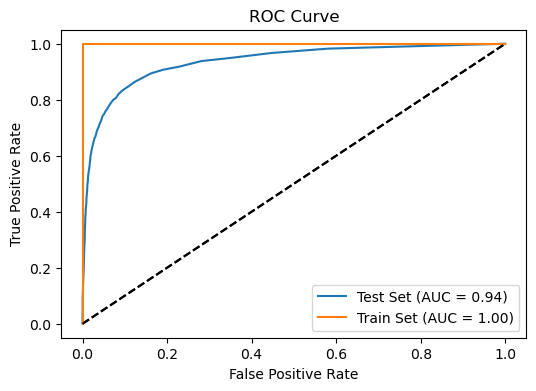

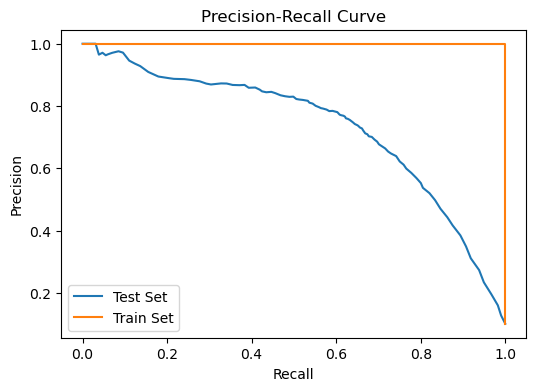

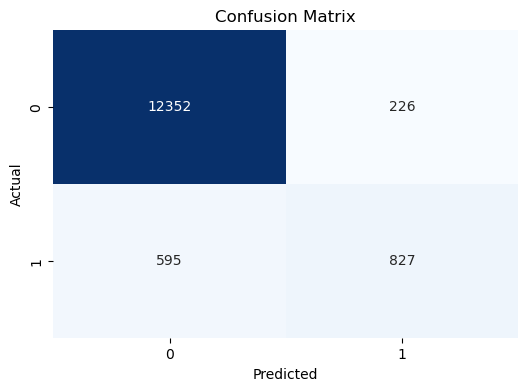

In [231]:
rf_pipeline.fit(X_train, y_train)

classification_metrics_and_graphs(rf_pipeline, X_train, y_train, X_test, y_test)

### Overfitting Observations

- The model exhibits signs of **overfitting**, meaning it performs well on the training data but struggles to generalize to unseen data.  
- To address this, we will attempt to **improve generalization** by implementing **GridSearchCV** for hyperparameter tuning.


### Grid Search

In [234]:
rf_data_pipeline = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping()),
              ('scaler', StandardScaler())
          ])

rf_data_pipeline.fit(X_train, y_train)

rf_data_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'last_day_rch_amt_6',
                                                   'last_day_rch_amt_7',
                                                   'last_day_rch_amt_8',
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping()),
                ('scaler', StandardScaler())])

roc_auc: Area Under the Receiver Operating Characteristic Curve is a good choice for imbalanced datasets, as it accounts for both sensitivity and specificity

Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 0.6244604710272484

---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 181) (55999,) (14000, 181) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     50289
           1       0.55      0.72      0.63      5710

    accuracy                           0.91     55999
   macro avg       0.76      0.83      0.79     55999
weighted avg       0.92      0.91      0.92     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     12578
           1       0.55      0.74      0.63      1422

    accuracy                           0.91

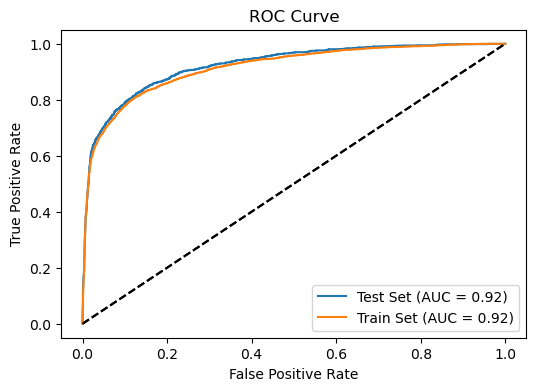

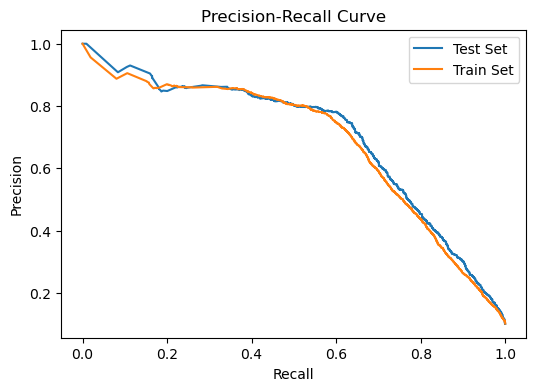

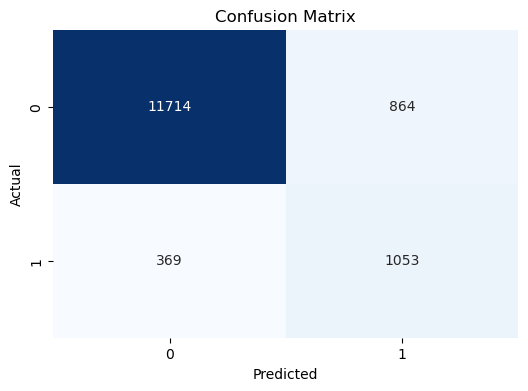

In [236]:
# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest. More trees can improve performance but increase computation time.
    'max_depth': [2, 3],                    # Maximum depth of each tree. Limits tree size to prevent overfitting; shallow trees generalize better.
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node. Higher values make the model more conservative.
    'min_samples_leaf': [2, 5, 10]          # Minimum number of samples required to be at a leaf node. Higher values prevent overfitting by enforcing larger leaves.
}

X_train_temp = rf_data_pipeline.transform(X_train)
X_test_temp = rf_data_pipeline.transform(X_test)

# Create GridSearchCV object
grid_search_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced'),
                              param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=3)

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train_temp, y_train)

# Print the best hyperparameters and the best score
print("\nBest hyperparameters:", grid_search_rf.best_params_)
print("Best score:", grid_search_rf.best_score_)

# Evaluate the best model on the test set
best_rf_model = grid_search_rf.best_estimator_
classification_metrics_and_graphs(best_rf_model, X_train_temp, y_train, X_test_temp, y_test)

**Best hyperparameters:** {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

**Best score:** 0.6238554610536878

## Final Random Forest Pipeline for Feature Importance

In [295]:
rf_pipeline_final = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping()),
              ('scaler', StandardScaler()),
              ('rf_classifier', RandomForestClassifier(class_weight='balanced',
                                                       max_depth= 3,
                                                       min_samples_leaf= 2,
                                                       min_samples_split= 10,
                                                       n_estimators= 100))
          ])


rf_pipeline_final

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping()),
                ('scaler', StandardScaler()),
                ('rf_classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        min_samples_leaf=2,
                                        min_samples_split=10))])


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 222) (55999,) (14000, 171) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     50289
           1       0.55      0.72      0.62      5710

    accuracy                           0.91     55999
   macro avg       0.76      0.83      0.79     55999
weighted avg       0.92      0.91      0.92     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     12578
           1       0.54      0.74      0.63      1422

    accuracy                           0.91     14000
   macro avg       0.76      0.83      0.79     14000
weighted avg       0.93      0.91      0.92     14000

ROC AUC (Train Set): 0.9143099261052204
ROC AUC (Test Set): 0.9222504455460934


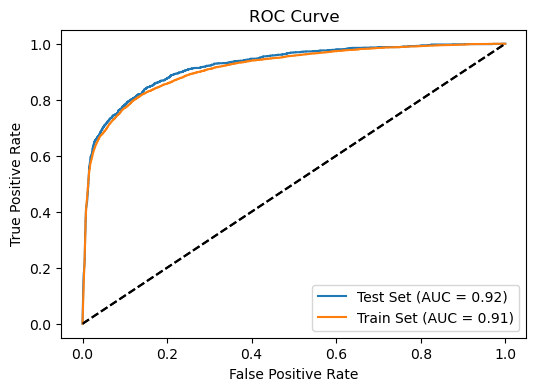

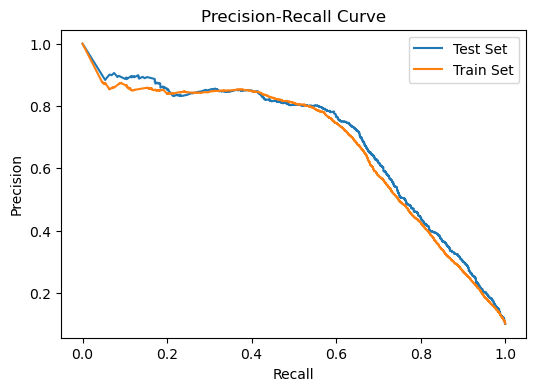

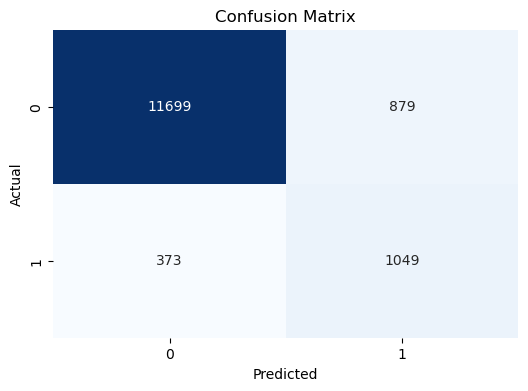

In [243]:
rf_pipeline_final.fit(X_train, y_train)

classification_metrics_and_graphs(rf_pipeline_final, X_train, y_train, X_test, y_test)

     sensitivity  specificity  accuracy
0.0        1.000        0.000     0.102
0.1        1.000        0.000     0.102
0.2        0.981        0.343     0.408
0.3        0.894        0.738     0.754
0.4        0.793        0.883     0.874
0.5        0.718        0.933     0.911
0.6        0.675        0.955     0.926
0.7        0.649        0.965     0.933
0.8        0.624        0.972     0.937
0.9        0.477        0.988     0.936
1.0        0.000        1.000     0.898


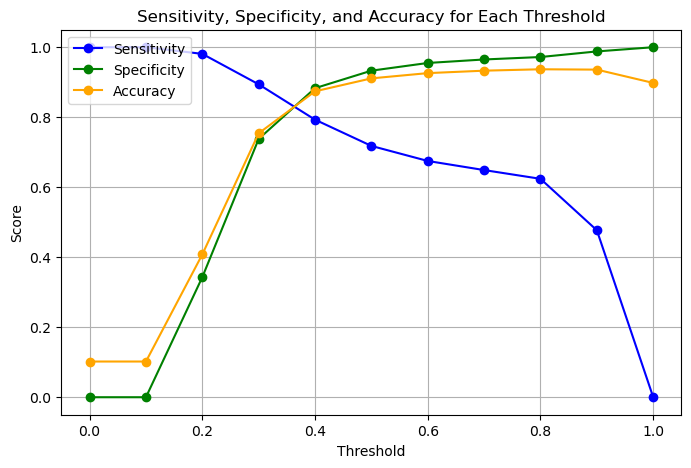

In [247]:
model_metrics_at_thresholds(rf_pipeline_final, X_train, y_train)

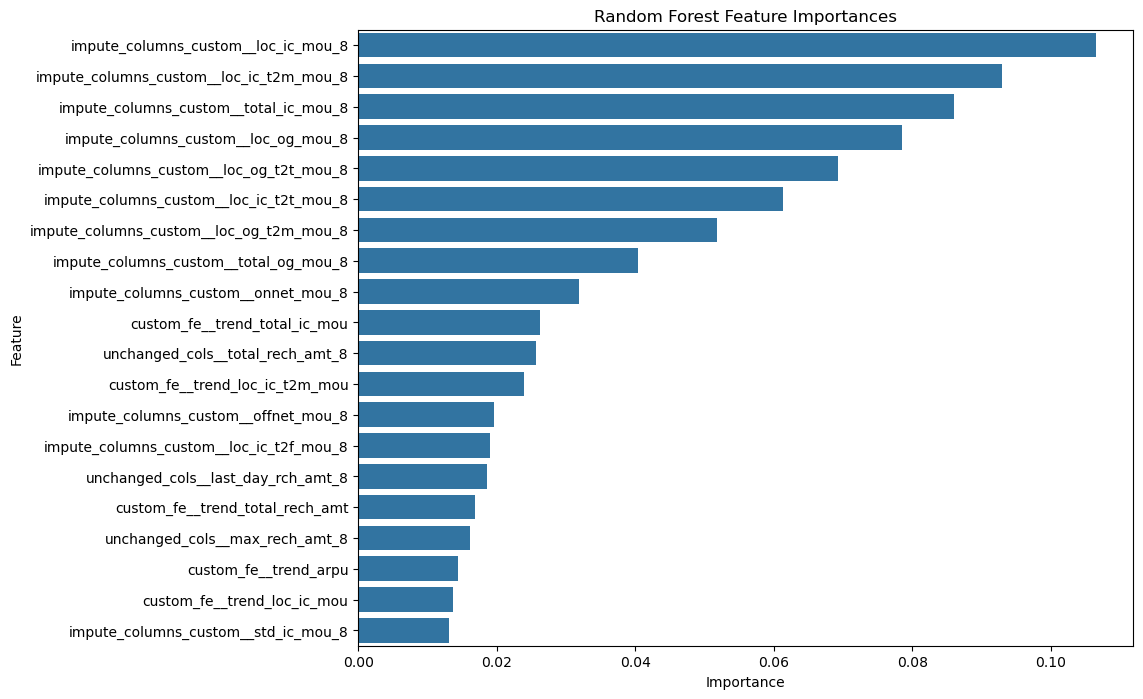

In [249]:
# Access the random forest model within the pipeline
rf_model = rf_pipeline_final.named_steps['rf_classifier']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
# seoect top 20 importances
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:20])
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Feature importances and Recomendations

### **Insights from Logistic Regression for Customer Churn Analysis**

The **Logistic Regression model** reveals valuable insights into the factors influencing customer churn. By analyzing the model's feature coefficients, we can identify key variables linked to churn and understand their impact. These insights are essential for developing effective customer retention strategies.

---

### **Customer Lifecycle Phases**
Understanding the different stages of the customer journey allows for timely intervention:

1. **Good Phase:**  
   - Customers are satisfied, with no noticeable signs of dissatisfaction.  
   - In the dataset, **months 6 and 7** represent this phase.  

2. **Action Phase:**  
   - Customers begin to show signs of disengagement or potential churn.  
   - This phase is crucial for proactive measures.  
   - In the dataset, **month 8** corresponds to this phase.  

3. **Churn Phase:**  
   - Customers decide to leave the network.  
   - **Month 9 (September)** represents this phase in the dataset.  

---

### **Emphasis on the Action Phase for Prevention**
Since the **action phase** indicates early signs of churn, identifying influencing factors at this stage is critical. This enables timely intervention strategies such as:

✅ Offering personalized discounts or incentives  
✅ Enhancing customer support  
✅ Proactive communication to address concerns  

By focusing on the **action phase**, businesses can effectively reduce churn and improve customer retention.


### **Top 10 Positive Contributors (Increase Likelihood of Churn)**

The following features from the **Action Phase (Month 8)** have the largest positive coefficients in the Logistic Regression model. These variables significantly increase the probability of customer churn:

1. **ARPU in Action Phase (Month 8):**  
   - A low average revenue per user during the action phase suggests reduced customer engagement.

2. **Outgoing On-Net Calls (MOU) in Action Phase (Month 8):**  
   - A decline in on-network call usage indicates lower dependence on the service.

3. **Outgoing ISD Calls (MOU) in Action Phase (Month 8):**  
   - Fewer international calls during the action phase signal reduced usage.

4. **Incoming Off-Net Calls (MOU) in Action Phase (Month 8):**  
   - Reduced off-network incoming calls highlight declining interaction.

5. **Total Outgoing Call Usage (MOU) in Action Phase (Month 8):**  
   - Lower outgoing call activity is a strong predictor of churn.

6. **Outgoing Local Calls to Mobile Numbers (MOU) in Action Phase (Month 8):**  
   - Declining local call activity signals waning reliance on the network.

7. **Last Recharge Amount in Action Phase (Month 8):**  
   - Lower recharge amounts during this phase reflect disengagement.

8. **Incoming On-Net Calls (MOU) in Action Phase (Month 8):**  
   - Fewer on-network incoming calls point to reduced customer interaction.

9. **Incoming Off-Net Minutes of Use (MOU) in Action Phase (Month 8):**  
   - Lower off-network call minutes suggest reduced engagement.

10. **Total Recharge Amount in Action Phase (Month 8):**  
    - Decreased recharge amounts indicate a reduced likelihood of continued usage.

---

### **Key Insight:**
Focusing on these indicators during the **Action Phase** allows businesses to identify customers at risk of churn and implement proactive retention strategies.


### **Top 10 Negative Contributors (Decrease Likelihood of Churn)**

The following features from the **Action Phase (Month 8)** have the largest negative coefficients in the Logistic Regression model. These variables significantly decrease the probability of customer churn:

1. **Trend in Total Recharge Amount:**  
   - An increasing recharge trend during the action phase signals continued customer satisfaction.

2. **Outgoing Local Calls to Mobile Numbers (MOU) in Action Phase (Month 8):**  
   - High local call usage during the action phase reduces churn risk.

3. **Total Outgoing Call Usage (MOU) in Action Phase (Month 8):**  
   - Higher outgoing call activity reflects active engagement with the service.

4. **Outgoing Local Calls (MOU) in Action Phase (Month 8):**  
   - Frequent local outgoing calls indicate sustained usage and customer retention.

5. **Local Incoming Calls (MOU) in Action Phase (Month 8):**  
   - Higher local incoming call usage signals ongoing interaction with the network.

6. **Trend in Outgoing ISD Calls (MOU):**  
   - A positive trend in international calls during the action phase reduces churn risk.

7. **Total Data Usage (MB) in Action Phase (Month 8):**  
   - Active data usage suggests strong engagement and satisfaction with the service.

8. **Outgoing On-Net Calls (MOU) in Action Phase (Month 8):**  
   - Increased on-network outgoing call activity reflects customer reliance on the network.

9. **Last Recharge Amount in Action Phase (Month 8):**  
   - Large recharge amounts during the action phase indicate customer satisfaction and loyalty.

10. **Incoming On-Net Calls (MOU) in Action Phase (Month 8):**  
    - High on-network incoming calls during the action phase point to strong customer interactions.

---

### **Key Insight:**
By identifying and encouraging these positive behaviors during the **Action Phase**, businesses can strengthen customer relationships and reduce the risk of churn.


### **Insights on Customer Behavior**

- **Behavioral Shifts:**  
  - The strongest churn predictors are linked to a noticeable decline in key metrics such as **recharge activity**, **ARPU**, and **call/data usage** during the **Action Phase (Month 8)**.  
  - These behavioral shifts indicate customer dissatisfaction or reduced dependency on the network, making them crucial warning signs.

- **Engagement:**  
  - Features like **high call activity** and **consistent recharge patterns** during the action phase suggest continued customer engagement.  
  - Such behaviors are strong indicators of customer satisfaction and lower churn risk.

- **Data Usage:**  
  - A reduction in both **data recharges** and **data usage** during the action phase is a significant churn predictor.  
  - This reflects the increasing reliance on data services in modern customer behavior, making it a critical factor to monitor.

---

### **Key Takeaway:**  
Monitoring these behavioral patterns during the **Action Phase** can help businesses proactively identify at-risk customers and implement targeted retention strategies.


### **Recommendations to Business Team**

1. **Proactive Interventions:**  
   - Focus on customers exhibiting early warning signs during the **Action Phase** (e.g., declining ARPU, reduced recharge activity).  
   - Offer personalized retention strategies such as **discounts**, **data/call packages**, or **loyalty programs** to encourage continued engagement.

2. **Targeted Campaigns:**  
   - Design campaigns to re-engage customers with **low ARPU** and **recharge frequency** during the action phase.  
   - Prioritize interventions for **high-value customers** who display early signs of churn to prevent revenue loss.

3. **Customer Monitoring:**  
   - Continuously track key metrics like **ARPU**, **recharge patterns**, and **call/data usage trends**.  
   - Implement **automated alerts** for customers showing significant deviations from their typical behavior, enabling timely intervention.

---

### **Key Focus:**  
Combining proactive engagement, targeted campaigns, and real-time monitoring can effectively reduce customer churn and improve retention rates.


# Predictive Models | Models for Kaggle / Accuracy

## Gradient Boosting

In [258]:
gb__pipeline = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping()),
              ('scaler', StandardScaler()),
              ('gb_classifier', GradientBoostingClassifier())
          ])

gb__pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'last_day_rch_amt_8',
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping()),
                ('scaler', StandardScaler()),
                ('gb_classifier', GradientBoostingClassifier())])


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 222) (55999,) (14000, 171) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     50289
           1       0.77      0.63      0.70      5710

    accuracy                           0.94     55999
   macro avg       0.87      0.80      0.83     55999
weighted avg       0.94      0.94      0.94     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12578
           1       0.75      0.64      0.69      1422

    accuracy                           0.94     14000
   macro avg       0.86      0.81      0.83     14000
weighted avg       0.94      0.94      0.94     14000

ROC AUC (Train Set): 0.9468689224966209
ROC AUC (Test Set): 0.9463619587612957


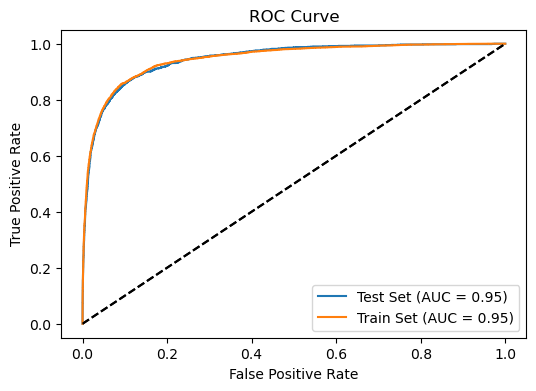

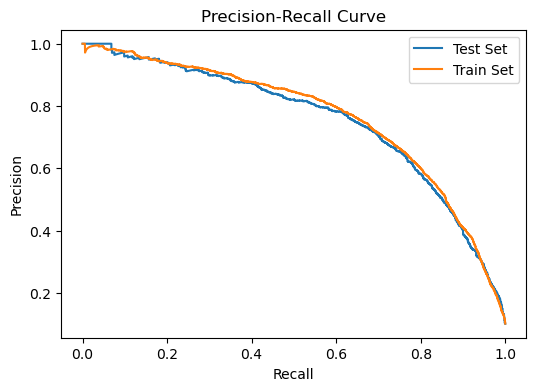

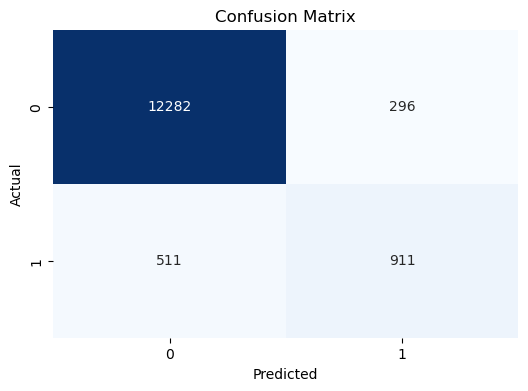

In [260]:
classification_metrics_and_graphs(gb__pipeline, X_train, y_train, X_test, y_test)

### Grid Search

In [264]:
gb_data_pipeline = Pipeline([
              ('preprocessor', preprocessor),
          ])

gb_data_pipeline.fit(X_train, y_train)

gb_data_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'total_rech_amt_8',
                                                   'max_rech_amt_6',
                                                   'max_rech_amt_7',
                                                   'max_rech_amt_8',
                                                   'last_day_rch_amt_6',
                                                   'last_day_rch_amt_7',
                                                   'last_day_rch_amt_8',
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])]))])

Fitting 2 folds for each of 8 candidates, totalling 16 fits

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best score: 0.9413918239426918

---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 181) (55999,) (14000, 181) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     50289
           1       0.77      0.62      0.69      5710

    accuracy                           0.94     55999
   macro avg       0.86      0.80      0.83     55999
weighted avg       0.94      0.94      0.94     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12578
           1       0.76      0.64      0.70      1422

    accuracy                           0.94     14000
   macro avg      

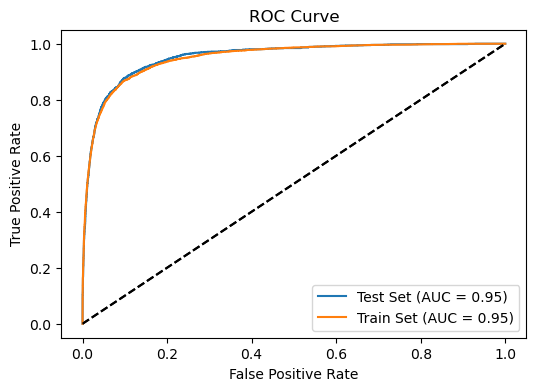

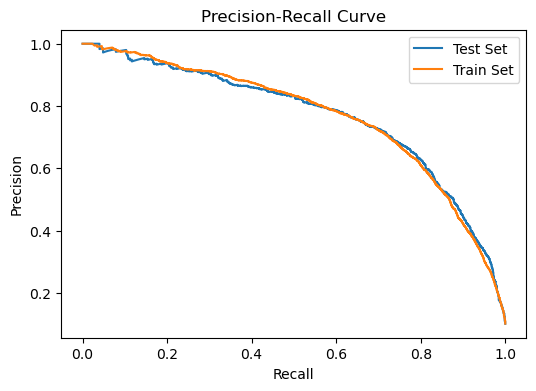

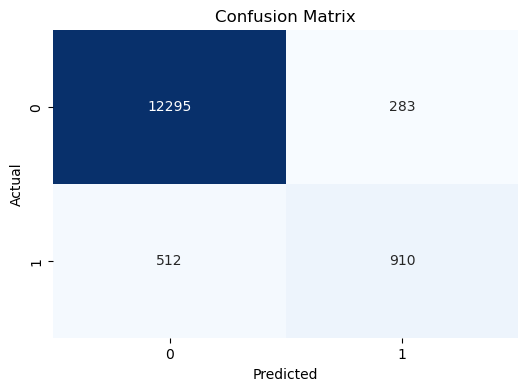

In [266]:
# Define the parameter grid for GridSearchCV
param_grid_gb_a = {
    'n_estimators': [50, 100],  # Number of boosting stages (trees). Controls model complexity and training time.
    'learning_rate': [0.01, 0.1], # Shrinks contribution of each tree. Smaller values improve robustness but require more trees.
    'max_depth': [2, 3],          # Maximum depth of each tree. Higher values allow capturing more complex patterns but increase risk of overfitting.
}


X_train_temp = gb_data_pipeline.transform(X_train)
X_test_temp = gb_data_pipeline.transform(X_test)

# Create GridSearchCV object
grid_search_gb_a = GridSearchCV(GradientBoostingClassifier(),
                                       param_grid_gb_a, cv=2, scoring='accuracy', n_jobs=-1, verbose=3)

# Fit the GridSearchCV object to the training data
grid_search_gb_a.fit(X_train_temp, y_train)

# Print the best hyperparameters and the best score
print("\nBest hyperparameters:", grid_search_gb_a.best_params_)
print("Best score:", grid_search_gb_a.best_score_)

# Evaluate the best model on the test set
best_gb_a_model = grid_search_gb_a.best_estimator_
classification_metrics_and_graphs(best_gb_a_model, X_train_temp, y_train, X_test_temp, y_test)

### XGB Model

### We will be exploring XG Boost

In [271]:
xgb_data_pipeline = Pipeline([
              ('preprocessor', preprocessor),
          ])

xgb_data_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'total_rech_amt_8',
                                                   'max_rech_amt_6',
                                                   'max_rech_amt_7',
                                                   'max_rech_amt_8',
                                                   'last_day_rch_amt_6',
                                                   'last_day_rch_amt_7',
                                                   'last_day_rch_amt_8',
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])]))])


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 181) (55999,) (14000, 181) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     50289
           1       0.92      0.90      0.91      5710

    accuracy                           0.98     55999
   macro avg       0.95      0.95      0.95     55999
weighted avg       0.98      0.98      0.98     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     12578
           1       0.74      0.64      0.69      1422

    accuracy                           0.94     14000
   macro avg       0.85      0.81      0.83     14000
weighted avg       0.94      0.94      0.94     14000

ROC AUC (Train Set): 0.9964760514349651
ROC AUC (Test Set): 0.9526857332886948


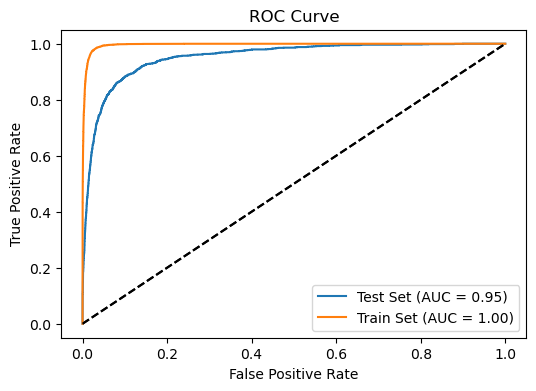

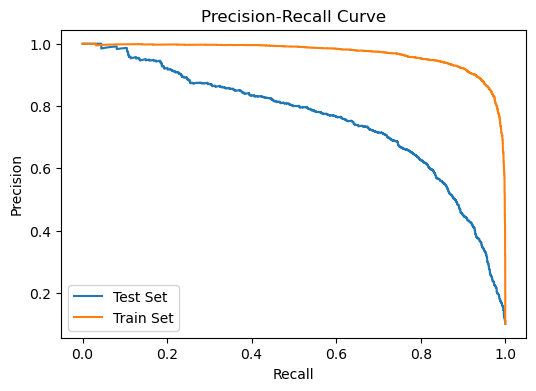

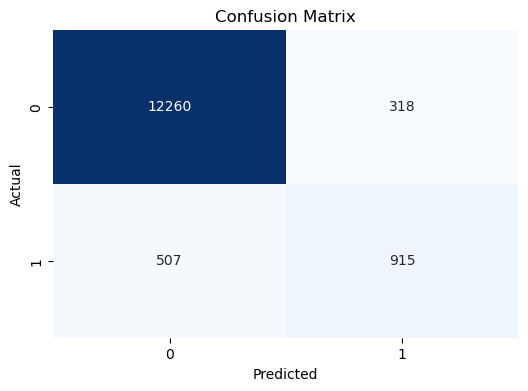

In [273]:
# Create XGBoost model
xgb_model = XGBClassifier(objective='binary:logistic',
                             use_label_encoder=False,
                             eval_metric='error',    # error is 1 - accuracy
                              tree_method='gpu_hist',  # Use GPU-accelerated histogram method
                              )

X_train_transformed = xgb_data_pipeline.transform(X_train) # Use only transform after fitting the pipeline
X_test_transformed = xgb_data_pipeline.transform(X_test) # Transforming the test data using the fitted pipeline

# Train the XGBoost model using transformed data
xgb_model.fit(X_train_transformed, y_train)


# Evaluate the model using transformed data
classification_metrics_and_graphs(xgb_model, X_train_transformed, y_train, X_test_transformed, y_test)

### XGB Model for high value customers only

Let us try creating a model for high value customers alone.

We will determine high value customers using their recharge amount.

In [276]:
recharge_data = X_train['total_rech_amt_6'] + X_train['total_rech_amt_7'] + X_train['total_rech_amt_8']

high_mark = recharge_data.quantile(0.7)

X_train_highvalue = X_train[recharge_data > high_mark]
y_train_highvalue = y_train[recharge_data > high_mark]

X_train_highvalue.shape, y_train_highvalue.shape

((16789, 222), (16789,))


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(16789, 181) (16789,) (14000, 181) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15737
           1       1.00      1.00      1.00      1052

    accuracy                           1.00     16789
   macro avg       1.00      1.00      1.00     16789
weighted avg       1.00      1.00      1.00     16789


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     12578
           1       0.74      0.53      0.62      1422

    accuracy                           0.93     14000
   macro avg       0.85      0.75      0.79     14000
weighted avg       0.93      0.93      0.93     14000

ROC AUC (Train Set): 1.0
ROC AUC (Test Set): 0.9419563974246554


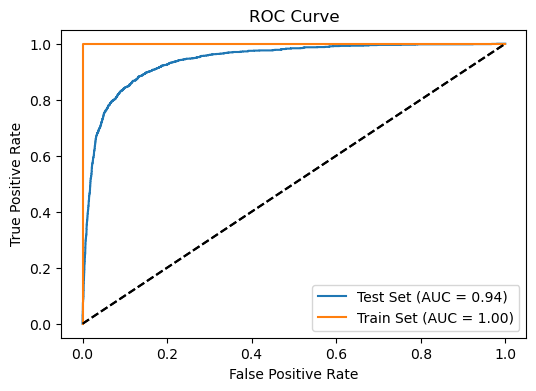

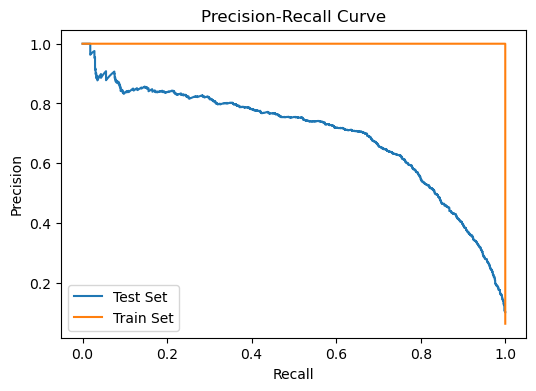

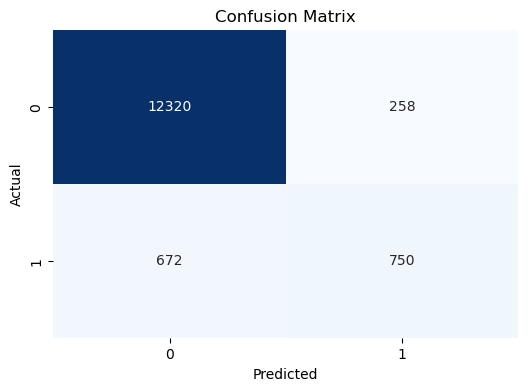

In [278]:
# Create XGBoost model
xgb_model_hv = XGBClassifier(objective='binary:logistic',
                             use_label_encoder=False,
                             eval_metric='error',    # error is 1 - accuracy
                              tree_method='gpu_hist',  # Use GPU-accelerated histogram method
                              )

X_train_transformed = xgb_data_pipeline.transform(X_train_highvalue) # Use only transform after fitting the pipeline
X_test_transformed = xgb_data_pipeline.transform(X_test) # Transforming the test data using the fitted pipeline

# Train the XGBoost model using transformed data
xgb_model_hv.fit(X_train_transformed, y_train_highvalue)


# Evaluate the model using transformed data
classification_metrics_and_graphs(xgb_model_hv, X_train_transformed, y_train_highvalue, X_test_transformed, y_test)

We are getting good accuracy, but the model seems to be overfitting. Let us perform hyperparameter tuning.

### XGB Grid Search

### **Hyperparameter Tuning for XGBoost Model**

The next step involves performing hyperparameter tuning on the XGBoost model. Since this process can be computationally intensive, we will utilize GPU acceleration to improve efficiency.

---

### **Why Use `tree_method='gpu_hist'`?**

The parameter `tree_method='gpu_hist'` in XGBoost enables the use of the GPU to perform histogram-based gradient boosting. This significantly accelerates training for large datasets. It is particularly effective for:

- **Dense Datasets:** Since our dataset is dense, GPU acceleration will provide faster computation compared to CPU-based methods.
- **Faster Training:** GPU acceleration optimizes memory usage and speeds up complex computations, making it ideal for large-scale data.

---

### **Challenges with GridSearchCV and XGBoost**
The standard `GridSearchCV` implementation in scikit-learn does not fully support certain XGBoost parameters like:

- `tree_method='gpu_hist'`
- Parameters like `colsample_bytree` that require careful handling when using GPU acceleration.

Additionally:
- XGBoost's parameter structure differs slightly from traditional scikit-learn estimators.
- `GridSearchCV` may not seamlessly accommodate these nuances without modifications.

---

### **Solution: Custom Grid Search**
To overcome these challenges, we will implement a custom grid search from scratch. This custom implementation allows for:

- **Flexible Tuning:** Enabling us to manually define parameter combinations tailored to XGBoost.
- **Efficient GPU Utilization:** Ensuring smooth integration with GPU-specific settings for faster results.
- **Enhanced Control:** Allowing precise control over the tuning process and improved performance.

---

### **Next Step:** 
Proceeding with the custom grid search to identify the optimal XGBoost model parameters for improved churn prediction performance.


In [282]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400], # Number of trees (boosting rounds). Controls the model's complexity and training time.
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage for each update. Smaller values make training slower but more robust.
    'max_depth': [3, 4, 5, 6],            # Maximum depth of each tree. Higher values increase complexity and risk of overfitting.
    'subsample': [0.7, 0.8, 1],           # Fraction of samples used for training each tree. Reduces overfitting by introducing randomness.
    'colsample_bytree': [0.7, 0.8, 1],    # Fraction of features sampled for building each tree. Helps in reducing overfitting.
    'min_child_weight': [1, 3, 5],        # Minimum sum of instance weights needed for a child node. Higher values prevent overfitting.
}


# total combinations in param_grid_xgb
print("Parm Grid: ")
print(len(param_grid_xgb['n_estimators']) * len(param_grid_xgb['learning_rate']) * len(param_grid_xgb['max_depth'] * len(param_grid_xgb['subsample']) * len(param_grid_xgb['colsample_bytree']) * len(param_grid_xgb['min_child_weight'])))
print("\n")

X_train_transformed = xgb_data_pipeline.transform(X_train) # Transforming the train data using the fitted pipeline
X_test_transformed = xgb_data_pipeline.transform(X_test) # Transforming the test data using the fitted pipeline


# Iterate over the parameter grid
count=0
best_score = -1
best_params = {}
for n_estimators in param_grid_xgb['n_estimators']:
    for learning_rate in param_grid_xgb['learning_rate']:
        for max_depth in param_grid_xgb['max_depth']:
            for subsample in param_grid_xgb['subsample']:
                for colsample_bytree in param_grid_xgb['colsample_bytree']:
                    for min_child_weight in param_grid_xgb['min_child_weight']:

                        count+=1
                        # Create and train the XGBoost model with current hyperparameters
                        xgb_model = XGBClassifier(objective='binary:logistic',
                                                    use_label_encoder=False,
                                                    eval_metric='error',
                                                    n_estimators=n_estimators,
                                                    learning_rate=learning_rate,
                                                    max_depth=max_depth,
                                                    subsample=subsample,
                                                    colsample_bytree=colsample_bytree,
                                                    min_child_weight=min_child_weight,
                                                    tree_method='gpu_hist')

                        xgb_model.fit(X_train_transformed, y_train)

                        # Evaluate the model (replace with your preferred metric)
                        y_pred = xgb_model.predict(X_test_transformed)
                        score = (y_pred == y_test).mean() # Calcualte accuracy
                        print(f"Count: {count}, Score: {score}")
                        if score > best_score:
                            best_score = score
                            best_params = {'n_estimators': n_estimators,
                                          'learning_rate': learning_rate,
                                          'max_depth': max_depth,
                                          'subsample': subsample,
                                          'colsample_bytree': colsample_bytree,
                                          'min_child_weight': min_child_weight
                                          }

print(f"\nBest hyperparameters: {best_params}")
print(f"Best accuracy: {best_score}")

# Train the model with the best hyperparameters
best_xgb_model = XGBClassifier(objective='binary:logistic',
                                   use_label_encoder=False,
                                   eval_metric='error',
                                   **best_params,
                                   tree_method='gpu_hist')

Parm Grid: 
1296


Count: 1, Score: 0.9373571428571429
Count: 2, Score: 0.9375
Count: 3, Score: 0.9375714285714286
Count: 4, Score: 0.9375714285714286
Count: 5, Score: 0.9375714285714286
Count: 6, Score: 0.9375714285714286
Count: 7, Score: 0.9368571428571428
Count: 8, Score: 0.9368571428571428
Count: 9, Score: 0.9368571428571428
Count: 10, Score: 0.9370714285714286
Count: 11, Score: 0.9369285714285714
Count: 12, Score: 0.9369285714285714
Count: 13, Score: 0.9381428571428572
Count: 14, Score: 0.938
Count: 15, Score: 0.938
Count: 16, Score: 0.9368571428571428
Count: 17, Score: 0.9368571428571428
Count: 18, Score: 0.9368571428571428
Count: 19, Score: 0.9362142857142857
Count: 20, Score: 0.9362142857142857
Count: 21, Score: 0.9362142857142857
Count: 22, Score: 0.9362142857142857
Count: 23, Score: 0.9362142857142857
Count: 24, Score: 0.9362142857142857
Count: 25, Score: 0.9374285714285714
Count: 26, Score: 0.9374285714285714
Count: 27, Score: 0.9374285714285714
Count: 28, Score: 0.937428571

**Best hyperparameters:** {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 6, 'subsample': 1, 'colsample_bytree': 0.8, 'min_child_weight': 1}

**Best accuracy:** 0.9456428571428571


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 181) (55999,) (14000, 181) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     50289
           1       0.82      0.75      0.79      5710

    accuracy                           0.96     55999
   macro avg       0.90      0.87      0.88     55999
weighted avg       0.96      0.96      0.96     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     12578
           1       0.75      0.69      0.72      1422

    accuracy                           0.95     14000
   macro avg       0.86      0.83      0.85     14000
weighted avg       0.94      0.95      0.94     14000

ROC AUC (Train Set): 0.9823266475985963
ROC AUC (Test Set): 0.9585439180190716


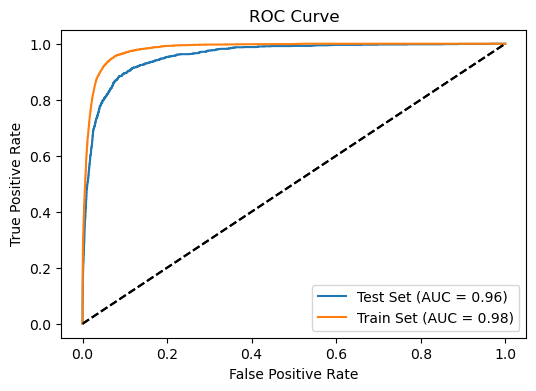

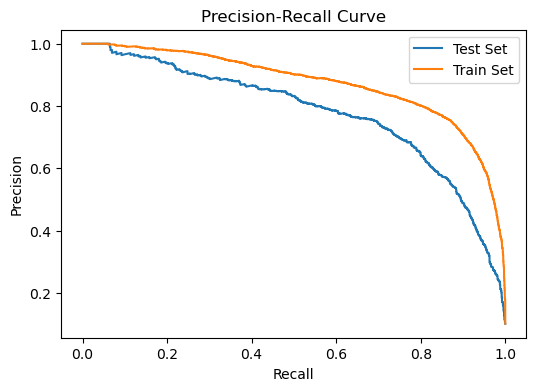

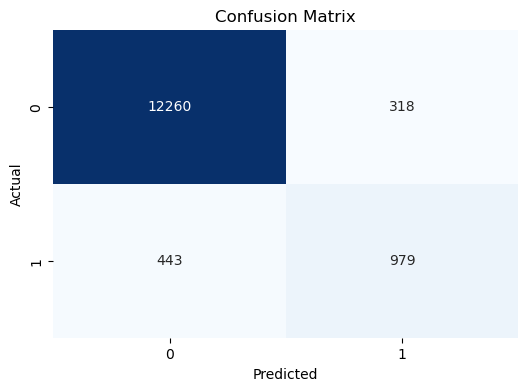

In [286]:
best_xgb_model.fit(transformed_data, y_train)
classification_metrics_and_graphs(best_xgb_model, X_train_transformed, y_train, X_test_transformed, y_test)

## Creating submittion file

***We are selecting the hyperparameter tuned XGB model for the Kaggle submission since this is the model giving us the highest accuracy.***

In [289]:
unseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

In [291]:
unseen['churn_probability'] = best_xgb_model.predict(xgb_data_pipeline.transform(unseen))
output = unseen[['id','churn_probability']]
output

id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  1
3      70002                  0
4      70003                  0
...      ...                ...
29995  99994                  0
29996  99995                  0
29997  99996                  0
29998  99997                  0
29999  99998                  0

[30000 rows x 2 columns]

In [293]:
output.to_csv('submission.csv',index=False)

### Kaggle Leaderboard ranking

https://www.kaggle.com/competitions/telecom-churn-case-study-hackathon-c-69/leaderboard
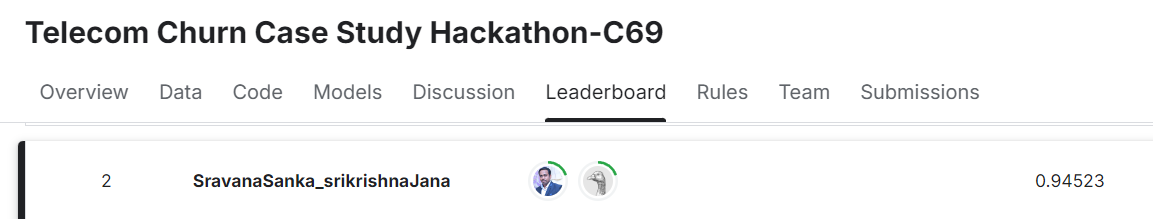
